# Setup

In [1]:
from datetime import datetime, timedelta
import time
import requests
from dotenv import load_dotenv
import os
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

from handlers import DataHandler
from news_api import NewsAPI
from useconomyapi import USEconomyAPI
from seekingalpha import SeekingAlphaNewsAPI
from visualizations import Visualizations
from cryptopanic import CryptoPanicAPI
from cryptonewsapi import CryptoNewsAPI
from coinrankingapi import CryptoDataFetcher
from sentiment import SentimentAnalyzer

hd = DataHandler()
vz = Visualizations()
load_dotenv()

c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


True

# 30 Day

In [2]:
from_date = 30

## Getting Past Month News

This code fetches and processes news articles about cryptocurrency from various sources over the past 30 days. It aggregates, processes, and analyzes news data on specific topics using different APIs and pandas for data manipulation.

- API Integration:

    - NewsAPI: This API fetches news based on user-defined queries like topics and date ranges. The data comes from various news sources and is structured into a pandas DataFrame. It includes error handling for API rate limits and HTTP errors.
    - USEconomyAPI: This API gets news focused on the U.S. economy. It allows queries by categories and time limits, processing the API's JSON response into a DataFrame similar to NewsAPI.
    - SeekingAlphaNewsAPI: This API targets financial and market news from the Seeking Alpha platform. It fetches news based on categories and time frames, converting the data into a DataFrame after cleaning HTML content from descriptions.

- The DataHandler class offers utility functions to manage and manipulate date data and handle duplicates. It normalizes text fields to eliminate case sensitivity and whitespace issues, converts dates to standardized formats, and removes duplicate records to ensure data uniqueness.

- After collecting data, the script merges data from different sources into a single DataFrame. It standardizes date formats, processes duplicates, and prepares the dataset for analysis or reporting. The code is structured to handle data over a 30-day period, using the DataHandler to format and deduplicate each day's data before merging. This ensures that the final dataset is clean and ready for analysis, providing a comprehensive overview of news trends over a specified period.

The script aims to provide a robust tool for fetching, cleaning, and analyzing news data, particularly from the financial sector, to support data-driven decision-making or content creation. This is achieved through sophisticated data handling techniques and integrating multiple data sources into a coherent workflow.

In [2]:
# Create an instance of the NewsAPI
news_api = NewsAPI(api_key=os.getenv('news_api'))
# Fetch news articles about Crypto from a specific date range
df = news_api.get_news(topic='crypto', from_date=hd.get_date_str(from_date), to_date=(hd.get_date_str(0)))
df = hd.standardize_date_format(df, 'date')

# Check if the DataFrame is not empty
if not df.empty:
    # Print the headlines along with the date and description
    print(f"{len(df)} news found")
else:
    print("No articles found for the given topic and date range.")

api = USEconomyAPI(os.getenv('useconomyapi'))
starting_date = hd.convert_to_unix_ms(hd.get_date_dt(from_date))
ending_date = hd.convert_to_unix_ms(hd.get_date_dt(0))
crypto_news_df_2 = api.fetch_news(category='economy', initial=starting_date, final=ending_date )
crypto_news_df_2 = api.format_news_data(crypto_news_df_2)


api_key = os.getenv('seeking_alpha')
seeking_alpha_api = SeekingAlphaNewsAPI(api_key)
category = 'crypto'
crypto_news_df_3 = seeking_alpha_api.fetch_news_by_days(from_date, category)

Found 42 articles for topic: crypto
42 news found
[{'id': '4107840', 'type': 'news', 'attributes': {'publishOn': '2024-05-17T15:18:12-04:00', 'isLockedPro': False, 'commentCount': 24, 'gettyImageUrl': None, 'videoPreviewUrl': None, 'themes': {'us': {'id': 326, 'path': '/', 'slug': 'us', 'title': None, 'sasource': '', 'non_theme': True}, 'large-cap': {'id': 115402, 'path': '/', 'slug': 'large-cap', 'title': None, 'sasource': '', 'non_theme': True}, 'hidden-from-qp': {'id': 578794, 'path': '/', 'slug': 'hidden-from-qp', 'title': None, 'sasource': '', 'non_theme': True}, 'on-the-move': {'id': 614457, 'path': '/market-news/on-the-move', 'slug': 'on-the-move', 'title': 'On the Move', 'sasource': 'theme_breadcrumb', 'non_theme': False}, 'news-metered': {'id': 614465, 'path': '/', 'slug': 'news-metered', 'title': None, 'sasource': '', 'non_theme': True}, 'crypto': {'id': 614790, 'path': '/market-news/crypto', 'slug': 'crypto', 'title': 'Cryptocurrency\xa0', 'sasource': 'theme_breadcrumb', 'no

In [3]:
df.head()

date                                           headline  \
0  2024-05-07 15:53:35  Revolut expands crypto push with UK trading pl...   
1  2024-05-05 23:33:09  Crypto bros eager to buy homes lifted prices a...   
2  2024-04-29 15:40:25  Are crypto partnerships back? Eminem becomes n...   
3  2024-05-01 13:00:00  Ex-Coinbase designer raises $5M for crypto vot...   
4  2024-04-24 13:00:00  Crypto app Strike launches Bitcoin services ac...   

                                         description  
0  The platform will allow U.K. customers to buy ...  
1  Home prices in crypto-wealthy counties grew 43...  
2  Eminem is narrating a new Crypto.com commercia...  
3  Protocol governance has a "reputation of being...  
4  Founder and CEO Jack Mallers said the company ...

In [4]:
#economy news
crypto_news_df_2.head()

date                                           headline  \
0  2024-04-17 22:01:28  Clover Finance (CLV) One Day Trading Volume Hi...   
1  2024-04-17 22:16:02  Global Gateway: EU announces new EU Circular E...   
2  2024-04-17 18:54:43  XIDO FINANCE (XIDO) Self Reported Market Capit...   
3  2024-04-17 23:26:32  Meet the District 3 candidates: ‘Tell us about...   
4  2024-04-17 23:51:08  French finance minister says Europe must defen...   

                                         description  
0  Clover Finance (CLV) One Day Trading Volume Hi...  
1  During the World Circular Economy Forum 2024, ...  
2  XIDO FINANCE (XIDO) Self Reported Market Capit...  
3   Between now and the November election, Missio...  
4  French Minister for Economy, Finance, Industry...

In [6]:
#alpha
crypto_news_df_3.head()

date                                           headline  \
0  2024-05-17 15:18:12  Bitcoin set for 9.7% weekly gain as soft CPI r...   
1  2024-05-17 10:58:26  BlackRock’s Rieder says Fed rate cut would tam...   
2  2024-05-17 09:35:00   4 stocks to watch on Friday: AMAT, HOOD and more   
3  2024-05-17 08:08:41  Coinbase Global raised to Neutral at BofA on c...   
4  2024-05-16 13:33:13  Coinbase stock slides after report of CME plan...   

                                         description  
0  Bitcoin ( BTC-USD ) is set to rise 9.7% on a w...  
1  BlackRock’s head of global fixed income says t...  
2  U.S. stocks on Friday opened mixed , with mark...  
3  Coinbase Global ( NASDAQ: COIN ) stock gained ...  
4  Shares in cryptocurrency exchange Coinbase Glo...

## Process Data

Here we concatenate the news dataset from the various APIs and process the duplicates.

In [ ]:
# for testing purposes Load data
#crypto_news_df = pd.read_csv('data/crypto_30d_news.csv')
#crypto_news_df_2 = pd.read_csv('data/crypto_30d_news_2.csv')
#us_economy_news = pd.read_csv('data/us_economy_30d_news.csv')

In [7]:
# Merge the dataframes
df = pd.concat([df, crypto_news_df_2, crypto_news_df_3])
hd.process_duplicates(df)
df.head()

Duplicate Entries: 0


date                                           headline  \
0  2024-05-07 15:53:35  revolut expands crypto push with uk trading pl...   
1  2024-05-05 23:33:09  crypto bros eager to buy homes lifted prices a...   
2  2024-04-29 15:40:25  are crypto partnerships back? eminem becomes n...   
3  2024-05-01 13:00:00  ex-coinbase designer raises $5m for crypto vot...   
4  2024-04-24 13:00:00  crypto app strike launches bitcoin services ac...   

                                         description  
0  The platform will allow U.K. customers to buy ...  
1  Home prices in crypto-wealthy counties grew 43...  
2  Eminem is narrating a new Crypto.com commercia...  
3  Protocol governance has a "reputation of being...  
4  Founder and CEO Jack Mallers said the company ...

In [9]:
#for testing purposes
df.to_csv(f'data/{hd.get_date_str(0)}_{from_date}d_news.csv', index=False)

## Meme coin

### Get Crypto Information

This code fetches historical price data for meme category cryptocurrencies over the past 30 days. 

The script initializes with the CryptoDataFetcher class, setting up with an API key, meme category tags, and specific parameters like the number of coins to focus on and the data retrieval span, typically set to ‘30d’.

The action begins with setting up API interactions. It configures headers and the base URL necessary for API requests, then seamlessly handles sending GET requests. It’s designed to tackle any hiccups, such as errors from non-200 status codes, by simply outputting the error details.

Digging deeper, the script has functions specifically for data fetching. `get_coin_uuids()` is where it finds unique identifiers (UUIDs) for each coin under the specified tags and limits, linking coin names to their UUIDs in a tidy dictionary. Next, `get_coin_history()` takes over to pull a coin’s price movements using its UUID for the set period, culminating in a list of price data entries.

To piece everything together, `fetch_all_history()` compiles all this data, filtering by tags, limits, and periods, and wraps it up in a neat pandas DataFrame. This DataFrame then gets processed, handling any missing price data and shaping it into a structured format ready for analysis.

Finally, all this historical data is output to a CSV file. This step not only ensures data is available offline but also confirms the operation’s success and the exact save location of the file. The script, designed with robust error management and data processing capabilities, is ideal for anyone keen on tracking trends in meme cryptocurrencies, aiding in financial analysis or market watching endeavors.

In [10]:
time_period = '30d'
category = 'meme'
api_key = os.getenv('coinranking') 

fetcher = CryptoDataFetcher(api_key, default_tags=category, default_limit=50, default_time_period=f"{time_period}")
price_data = fetcher.fetch_all_history()

Fetching historical data for Dogecoin with UUID a91GCGd_u96cF...
Fetching historical data for Shiba Inu with UUID xz24e0BjL...
Fetching historical data for PEPE with UUID 03WI8NQPF...
Fetching historical data for dogwifhat with UUID sZUrmToWF...
Fetching historical data for FLOKI with UUID fmHk13Rqw...
Fetching historical data for Baby Doge Coin with UUID JY1_q2c0g...
Fetching historical data for Bonk with UUID jCd_nuYCH...
Fetching historical data for BOOK OF MEME with UUID JB0Z6eCf-...
Fetching historical data for POPCAT with UUID sLBuDEsp6...
Fetching historical data for cat in a dogs world with UUID -NmA23uWh...
Fetching historical data for Mog Coin with UUID ogeeFxUH0...
Fetching historical data for DEGEN with UUID ve9BsDd44...
Fetching historical data for Dogelon Mars with UUID Ac13iS3os...
Fetching historical data for Myro with UUID jvSn3kD3d...
Fetching historical data for Ponke with UUID lUxx6OnQ2...
Fetching historical data for COQINU with UUID sil6VcmIP...
Fetching historica

In [12]:
price_data

coin   timestamp     price
0       Dogecoin  1716030000  0.155834
1       Dogecoin  1716026400  0.155636
2       Dogecoin  1716022800  0.155316
3       Dogecoin  1716019200  0.154417
4       Dogecoin  1716015600  0.154775
...          ...         ...       ...
35860  CumRocket  1713459600  0.007472
35861  CumRocket  1713456000  0.007658
35862  CumRocket  1713452400  0.007680
35863  CumRocket  1713448800  0.007324
35864  CumRocket  1713445200  0.007293

[35865 rows x 3 columns]

In [ ]:
#for testing purposes
if not price_data.empty:
    fetcher.write_to_csv(price_data, f'data/{hd.get_date_str(0)}_{time_period}_{fetcher.default_limit}{category}_history.csv')
else:
    print("No data fetched.")

### Sentiment

#### Apply Finbert


This code performs sentiment analysis on a DataFrame of text data. The predict_sentiment_batch method processes text in batches, tokenizes the input texts, and uses the model to predict sentiment scores, utilizing GPU if available. 

The core functionality of the script is divided into two main methods: `predict_sentiment_batch()` and `add_sentiments_to_df()`. The `predict_sentiment_batch()` method processes text data in batches, which is crucial for handling large datasets efficiently. It tokenizes the input text and performs inference to generate output logits. These logits are then converted into actual sentiment scores using a softmax layer, which translates these logits into probabilities that represent sentiment scores.

The `add_sentiments_to_df()` method takes these calculated sentiment scores and integrates them into the original DataFrame by appending a new column. This allows the enhanced DataFrame to not only contain the original data but also the sentiment analysis results, facilitating both in-depth analytical reviews and straightforward visualization within the DataFrame structure.

The overall result of running this script is a DataFrame augmented with a new column of sentiment scores ranging from 0 to 1, where higher values indicate more positive sentiment. These scores provide a quantitative measure of the sentiment prevalent in each textual entry in the dataset, which could include financial reports, news articles, or social media blurbs. This enriched data can significantly aid in refining financial models and investment strategies by providing deeper insights into market sentiment directly from textual analysis.

In [ ]:
#for testing purposes
#df = pd.read_csv("data/{hd.get_date(0)}_30d_news.csv")

In [13]:
# Initialize SentimentAnalyzer
analyzer = SentimentAnalyzer()
sentiment_data = analyzer.add_sentiments_to_df(df)
sentiment_data.head()

date                                           headline  \
0  2024-05-07 15:53:35  revolut expands crypto push with uk trading pl...   
1  2024-05-05 23:33:09  crypto bros eager to buy homes lifted prices a...   
2  2024-04-29 15:40:25  are crypto partnerships back? eminem becomes n...   
3  2024-05-01 13:00:00  ex-coinbase designer raises $5m for crypto vot...   
4  2024-04-24 13:00:00  crypto app strike launches bitcoin services ac...   

                                         description  sentiment  
0  The platform will allow U.K. customers to buy ...   0.365839  
1  Home prices in crypto-wealthy counties grew 43...   0.944643  
2  Eminem is narrating a new Crypto.com commercia...   0.040013  
3  Protocol governance has a "reputation of being...   0.035101  
4  Founder and CEO Jack Mallers said the company ...   0.823230

In [14]:
#for testing purposes
df.to_csv(f'data/{hd.get_date_str(0)}_{time_period}_news_with_sentiment.csv', index=False)

### Vizualisations


This code visualizes the relationship between cryptocurrency prices and sentiment data. It uses a Visualizations class to process and plot the data. 

In terms of results, the code generates graphs and some basic statistical analysis. These graphs match up the sentiment data with cryptocurrency price movements over the same period. They use rolling averages to smooth out the sentiment scores, making it easier to see trends without the noise of daily fluctuations. This visualization helps spot whether changes in sentiment align with shifts in price trends.

How it works: There's a `Visualizations` class in the code that manages all the data processing and plotting. This class has several key functions. 

- Normalization of Price : First, it *normalizes* the prices of various cryptocurrencies to a scale from 0 to 1. This step is important because it allows us to *compare* different cryptocurrencies fairly, no matter their usual price ranges. 
- Data Aggregation: The code also groups both sentiment and price data into regular time intervals—like hourly or daily. This setup ensures that each sentiment score directly corresponds to a price point, which is crucial for accurate comparisons.
- Plotting : The plotting function, `plot_normalized_price_and_sentiment`, takes this processed data and creates dual-axis charts that display both price and sentiment over time.

The structure of the code also allows for easy updates. You can tweak model parameters like how much you smooth the sentiment data or how you normalize prices. This flexibility is great because it lets the analysis adapt to different data sets or to look into how different external factors might affect the cryptocurrency market.

#### Average Sentiment per Day and Normalize Price

In [17]:
#for testing purposes
sentiment_data = pd.read_csv(f"data/2024-05-18_30d_news_with_sentiment.csv")
price_data = pd.read_csv('data/2024-05-18_30d_50meme_history.csv')

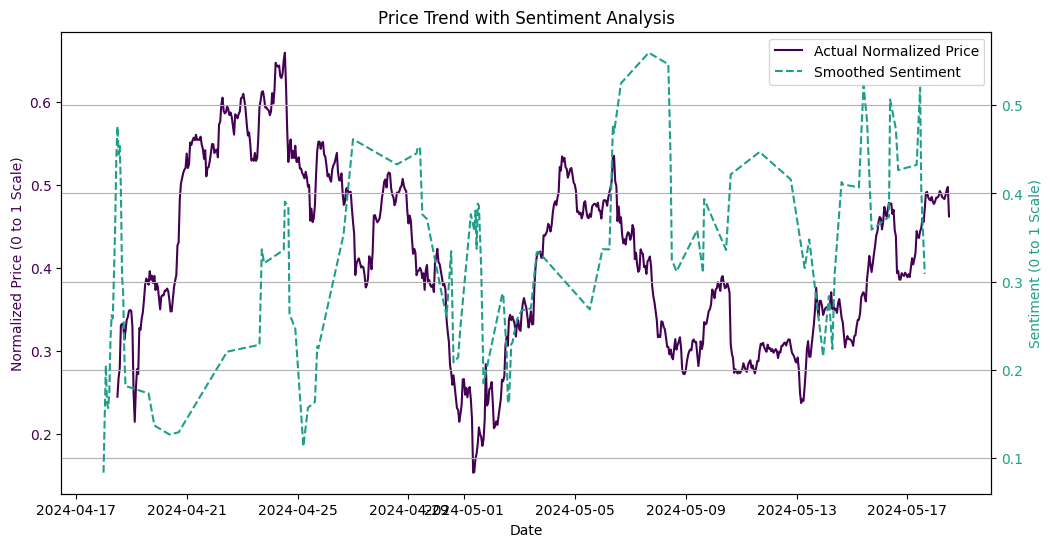

In [18]:
sentiment_data = vz.average_sentiment_per_time(from_date,sentiment_data)
price_data = vz.normalize_and_aggregate_prices(price_data)
plot = vz.plot_normalized_price_and_sentiment(price_data, sentiment_data)

In [7]:
sentiment_data.head()

average sentiment
date                                  
2024-04-17 18:00:00           0.035370
2024-04-17 19:00:00           0.011643
2024-04-17 20:00:00           0.314309
2024-04-17 21:00:00           0.044484
2024-04-17 22:00:00           0.047624

In [8]:
price_data.head()

normalized price
timestamp                            
2024-04-18 12:00:00          0.244365
2024-04-18 13:00:00          0.266701
2024-04-18 14:00:00          0.278269
2024-04-18 15:00:00          0.330507
2024-04-18 16:00:00          0.332212

###  Analysis

Here we can observe that the code aims to correlate daily cryptocurrency price changes with market sentiment. The process begins by resampling the normalized price data to extract the last price of each day, interpreting it as the **closing price**. It then calculates the daily percentage change in price using the formula:

$$
\left( \frac{\text{Current Day Price} - \text{Previous Day Price}}{\text{Previous Day Price}} \right) \times 100
$$


This percentage change is then shifted backwards by one day with the .shift(-1) method, effectively predicting how today's sentiment will affect tomorrow's price change, which is critical for analyzing the predictive power of sentiment on price movements.

In parallel, the sentiment data, which may be recorded multiple times per day, is averaged to a daily granularity. Both datasets (price changes and average daily sentiment) are then merged based on their date indices, creating a combined DataFrame. This DataFrame includes columns for `normalized prices`, the next day's `price change`, and the` average daily sentiment`, which allows for direct comparison and correlation analysis between sentiment and subsequent price movements.

Finally, the combined data is cleansed of any rows containing `NaN` values, which might result from non-overlapping dates between the two datasets or the shifting operation. This cleaning ensures that the analysis is based on complete and accurate data, facilitating more reliable insights into how daily sentiment potentially influences future price changes in the cryptocurrency market.

In [19]:
# Get the closing price for each day (last price of the day)
price_data_daily = price_data['normalized price'].resample('D').last()

# Calculate the daily price change percentage
price_data_daily = pd.DataFrame(price_data_daily)  # Ensure it's a DataFrame for the next operations
price_data_daily['Price Change'] = price_data_daily['normalized price'].pct_change() * 100

# Shift the price change to align with the day's sentiment to measure its influence on the next day's price change
price_data_daily['Price Change'] = price_data_daily['Price Change'].shift(-1)

# Since sentiment is often recorded multiple times a day, we'll average it for daily granularity
sentiment_data_daily = pd.DataFrame(sentiment_data['average sentiment'].resample('D').mean())

# Merge the two datasets on the date index
combined_data = pd.concat([price_data_daily, sentiment_data_daily], axis=1)
combined_data.columns = ['Normalized Price', 'Next Day Price Change', 'average sentiment']
combined_data.dropna(inplace=True)  # Drop rows with NaN values that might result from resampling, shifting, or non-overlapping dates

#### Lag Analysis

Here we can observe that the code performs a comprehensive analysis of the relationship between market sentiment and cryptocurrency price changes using various time lags to determine the optimal predictive lag period. The core of the analysis involves shifting the sentiment data backward and forward by different time periods (ranging from one day to one week) to explore how previous and subsequent sentiments correlate with price changes. This shifting helps to test whether the market's reaction to sentiment is immediate or delayed.

We experiment with different lags between sentiment data and price data. Often, market reactions to news or events are not immediate. Analyzing the effect of sentiment over different time lags (e.g., 1 day, 2 days, 1 week) might reveal stronger correlations.

- Sentiment scores are shifted backward to align with future price changes, hypothesizing that current sentiment affects future prices. Conversely, sentiment data is also shifted forward to assess if previous price changes can predict future sentiment shifts, capturing the market's reactionary nature.
- Correlation and Regression Analysis: For each lag configuration, the correlation between lagged sentiment and subsequent price changes is calculated. Linear regression models are then used to quantify this relationship, providing metrics such as the R-squared value (which measures the proportion of variance in the dependent variable predictable from the independent variable) and root mean squared error (RMSE), indicating the model’s accuracy.
- Visualization and Output for Web: The analysis includes plotting these relationships and correlations, optionally generating web-optimized visualizations (SVG format). These plots highlight how sentiment at different lags correlates with price changes, visually representing the data to identify trends or anomalies more effectively.
- Predictive Analysis: The code also ventures into predictive analytics by using the derived models to forecast future price changes based on recent sentiment data, shifted by the analyzed lags. These predictions are then aggregated to provide a comprehensive outlook on expected price movements.


##### Correlation and Regression Techniques

- Correlation Calculation: For each lag, the correlation between the lagged sentiment and price changes is computed to quantify how closely the two variables move together. This step identifies potential lags where sentiment might have a stronger predictive power on price movements.

- Regression Modeling: Depending on the chosen model type (linear or random forest), a regression model is fit to the data. Linear models provide a direct, understandable relationship between sentiment and price changes, whereas random forest models can capture more complex, non-linear interactions.

##### Correlation 

Correlation Computation
Data Alignment and Preparation: For each specified lag, sentiment data is adjusted accordingly—either shifted forward or backward in time. This shifting is crucial to match the sentiment data to the corresponding future or past price data, depending on whether the analysis hypothesizes that sentiment influences future prices or is influenced by past prices.
Drop NA: Once the data is aligned by lagging, any rows containing NA values are removed. This step ensures that the correlation computation is conducted on complete data sets, thereby maintaining the integrity and reliability of the statistical analysis.
Execution of Correlation Analysis
Pearson Correlation Coefficient: The code calculates the Pearson correlation coefficient for each lag setting between the lagged sentiment scores and the corresponding price changes. This coefficient measures the linear correlation between the datasets, ranging from -1 to +1, where 1 is total positive linear correlation, 0 is no linear correlation, and -1 is total negative linear correlation.
Iterative Lag Analysis
Multiple Lags: The analysis iterates over a range of lags, both positive and negative, to identify the lag that demonstrates the strongest correlation. This iterative process is essential to determine the optimal lag that might provide the best predictive power for subsequent modeling.
Correlation Values Storage: For each lag, the calculated correlation coefficient is stored along with the lag value. This collection of data allows for easy comparison across different lags to identify which lag yields the highest correlation and is potentially the most informative for predicting price changes.
Visualization of Correlation
Plotting Correlation Results: The correlation coefficients for different lags are typically visualized using bar charts or line plots. This visualization helps to quickly identify how the correlation changes with different lags, visually depicting which lags might be worth further detailed analysis through regression modeling.

##### Linear Model


- Linear Regression: Uses ordinary least squares (OLS) from statsmodels to fit the model, providing an R-squared value that indicates the proportion of variance in price changes explained by the sentiment.

###### Setup and Configuration

Model Foundation: The code utilizes statsmodels.api (imported as sm), a Python library favored for its comprehensive statistical models and tests. This library provides robust tools for linear regression, enabling detailed analysis and interpretation of relationships in data.

Regression Model Building
Data Preparation: For each lag tested, the sentiment data is shifted appropriately (forward or backward in time), and any resulting missing values are dropped to maintain data integrity. This preparation ensures that the regression analysis is performed on complete and relevant data points only.

Model Fitting:
Independent Variable (X): The sentiment scores, adjusted by the specified lag, serve as the independent variable. To accommodate the requirements of the OLS model from statsmodels, a constant is added to the array of independent variables using sm.add_constant(). This step is crucial as it allows the model to include an intercept in the regression equation.
Dependent Variable (Y): The price changes, corresponding to the same dates as the lagged sentiment scores, are used as the dependent variable. This setup directly assesses how changes in sentiment at a given time might influence 
subsequent price movements.

Execution of Regression Analysis
Model Execution: The OLS regression model is executed using the fit() method. This method computes the least squares fit to the data, providing a model that minimizes the sum of the squared differences between observed and predicted values, which is the standard objective in regression analysis.

Metrics Computation:
R-squared: This statistic represents the proportion of the variance in the dependent variable that is predictable from the independent variable. A higher R-squared value indicates a better fit of the model to the data.
Root Mean Squared Error (RMSE): Calculated as the square root of the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. RMSE is a measure of the accuracy of the model in predicting the dependent variable.

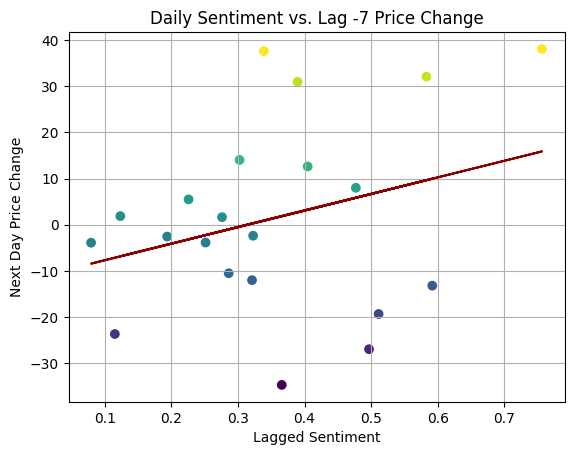

Correlation with -7 Day(s) lag: 0.3
Linear Model R-squared: 0.09
Linear Model RMSE: 19.34

Average Price Change on High Sentiment Days: -749 %
Average Price Change on Low Sentiment Days: 944 %


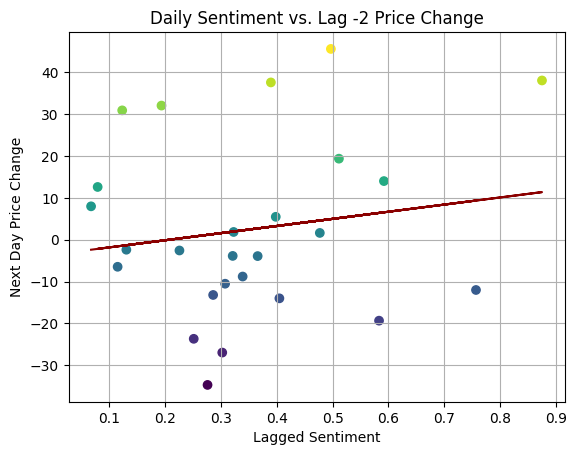

Correlation with -2 Day(s) lag: 0.16
Linear Model R-squared: 0.03
Linear Model RMSE: 20.54

Average Price Change on High Sentiment Days: -425 %
Average Price Change on Low Sentiment Days: 923 %


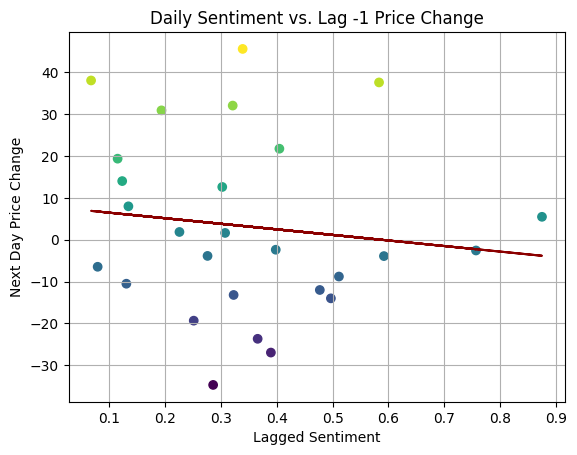

Correlation with -1 Day(s) lag: -0.13
Linear Model R-squared: 0.02
Linear Model RMSE: 20.58

Average Price Change on High Sentiment Days: -166 %
Average Price Change on Low Sentiment Days: 771 %


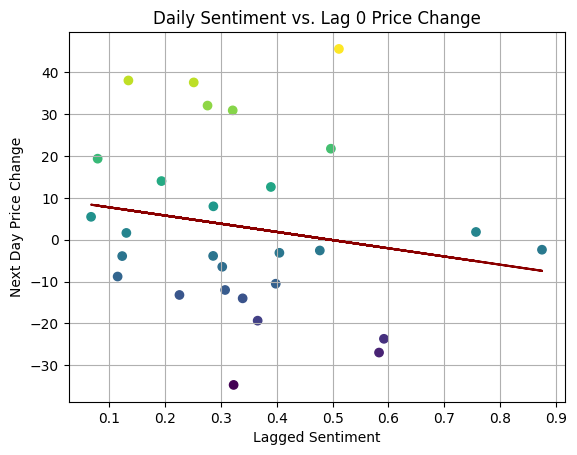

Correlation with 0 Day(s) lag: -0.19
Linear Model R-squared: 0.03
Linear Model RMSE: 20.05

Average Price Change on High Sentiment Days: -176 %
Average Price Change on Low Sentiment Days: 771 %


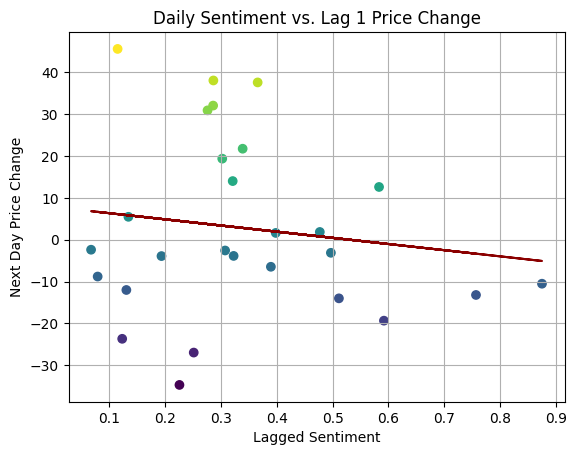

Correlation with 1 Day(s) lag: -0.14
Linear Model R-squared: 0.02
Linear Model RMSE: 20.55

Average Price Change on High Sentiment Days: -428 %
Average Price Change on Low Sentiment Days: 935 %


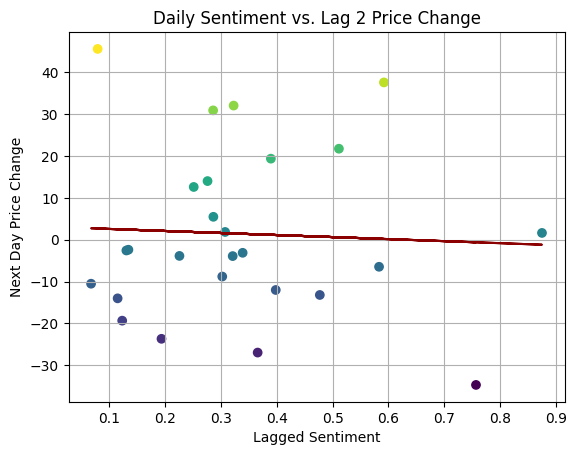

Correlation with 2 Day(s) lag: -0.05
Linear Model R-squared: 0.0
Linear Model RMSE: 19.92

Average Price Change on High Sentiment Days: -428 %
Average Price Change on Low Sentiment Days: 714 %


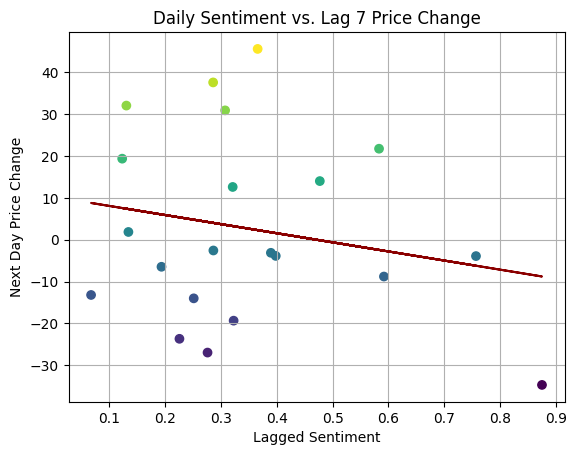

Correlation with 7 Day(s) lag: -0.2
Linear Model R-squared: 0.04
Linear Model RMSE: 21.32

Average Price Change on High Sentiment Days: -79 %
Average Price Change on Low Sentiment Days: 573 %


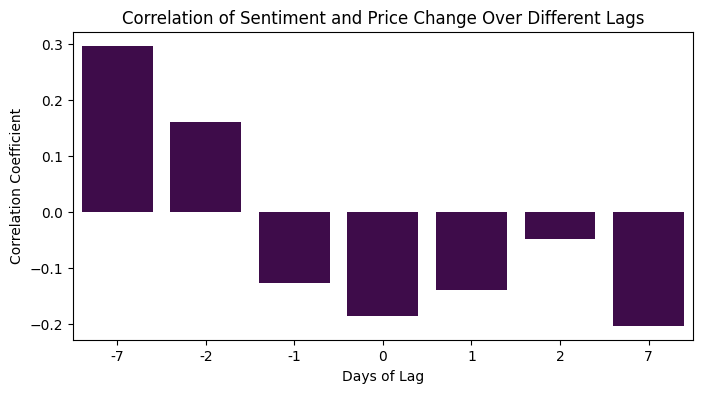

In [24]:
# Perform Analysis
model_type = 'linear'  # or 'rf'
future_predictions_by_lag = vz.analysis(combined_data, from_date, model_type=model_type, for_web=False, predict_days=5)

###### Predictions

Future Predictions: Utilizing the derived regression models, future price changes are predicted based on the most recent sentiment data, adjusted for the calculated optimal lags. This predictive capability is crucial for practical applications, allowing stakeholders to make informed decisions based on expected market movements.

Future Predictions: Using the fitted model, predictions for future price changes are made based on new or upcoming sentiment data, which is also appropriately lagged. These predictions are essential for assessing the potential real-world applicability of the model.
Validation: The robustness and accuracy of the model are further validated by computing RMSE on these predictions, providing a clear metric to gauge the predictive performance of the model.

In [21]:
# Collect all predictions from each lag
all_predictions = []

# Analyze every prediction of every lag and collect them
for idx, future_predictions in enumerate(future_predictions_by_lag):
    if not isinstance(future_predictions, (list, np.ndarray)):
        future_predictions = [future_predictions]

    # Filter out NaN values
    future_predictions = [pred for pred in future_predictions if not np.isnan(pred)]
    all_predictions.extend(future_predictions)

    avg_prediction = round(np.mean(future_predictions), 2) if future_predictions else 'N/A'
    print(f"Average Prediction for lag {idx}: {avg_prediction}")

# Filter out NaN values from all_predictions
all_predictions = [pred for pred in all_predictions if not np.isnan(pred)]

# Calculate the overall average prediction
overall_avg_prediction = round(np.mean(all_predictions), 2) if all_predictions else 'N/A'
print(f"Overall Average Prediction across all lags: {overall_avg_prediction}")

Average Prediction for lag 0: N/A
Average Prediction for lag 1: 3.51
Average Prediction for lag 2: 1.97
Average Prediction for lag 3: 2.39
Average Prediction for lag 4: 2.43
Average Prediction for lag 5: 1.5
Average Prediction for lag 6: N/A
Overall Average Prediction across all lags: 2.36


##### Random Forest Model

After observing suboptimal results from the previous linear regression model, we decided to employ a random forest model to leverage its strengths in capturing complex, non-linear relationships between sentiment and cryptocurrency price changes. The choice of n_estimators=1000 was made to ensure a robust and stable model by averaging the results of a large number of decision trees, which helps to reduce overfitting and improve predictive accuracy. The specific value of 1000 strikes a balance between achieving these benefits and managing computational efficiency. We set random_state=42 to ensure reproducibility of our results, facilitating consistent evaluation and debugging. No other hyperparameters were tuned at this stage to maintain simplicity and focus on the primary adjustments. Further tuning can be explored if the model's performance needs additional improvements after initial evaluation.

The Random Forest model provides a more complex and potentially more accurate approach than linear regression, especially in cases where relationships between variables may not be linear.

Model Setup and Configuration
Random Forest Regressor: The Random Forest model is implemented using the RandomForestRegressor from the scikit-learn library. This ensemble learning method constructs a multitude of decision trees at training time and outputs the average prediction of the individual trees, reducing overfitting and random noise from the individual components.
Data Preparation for Random Forest
Feature and Target Variables:
Features (X_rf): The lagged sentiment scores, after being adjusted for each specified lag and ensuring all NA values are dropped, serve as the input features. These features are prepared similarly to those in the linear regression analysis but tailored to the requirements of the Random Forest model.
Target (y_rf): The corresponding price changes are used as the target variable. The setup allows the model to learn complex patterns between sentiment (as features) and subsequent price movements (as targets).
Model Execution
Training the Model: The RandomForestRegressor is initialized with parameters such as the number of trees (n_estimators=1000) and a set random state for reproducibility (random_state=42). The model is then trained using the .fit() method on the prepared features and target, learning to predict price changes based on sentiment scores.
Performance Metrics and Validation
Model Performance Metrics:
R-squared (Coefficient of Determination): Measures the proportion of variance in the dependent variable that is predictable from the independent variable in the context of a random forest, indicating the overall fit of the model.
Root Mean Squared Error (RMSE): Provides a measure of the accuracy with which the model can predict the target variable. It is calculated as the square root of the average squared differences between predicted and actual values.

c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\visualizations.py:176: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future_sentiment = combined_data['average sentiment'].tail(predict_days).shift(lag).fillna(method='ffill')
c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


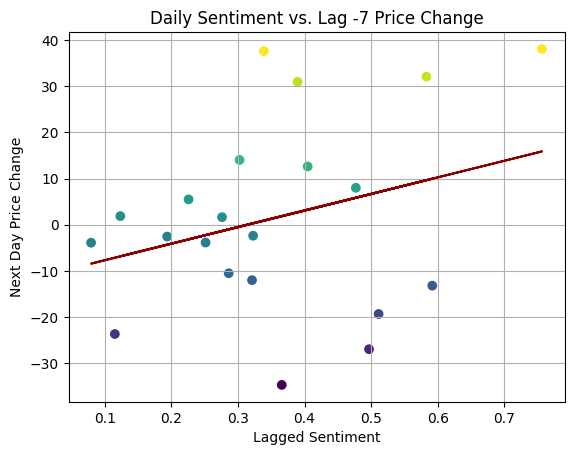

Correlation with -7 Day(s) lag: 0.3
Rf Model R-squared: 0.76
Rf Model RMSE: 9.85

Average Price Change on High Sentiment Days: -749 %
Average Price Change on Low Sentiment Days: 944 %


c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\visualizations.py:176: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future_sentiment = combined_data['average sentiment'].tail(predict_days).shift(lag).fillna(method='ffill')
c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


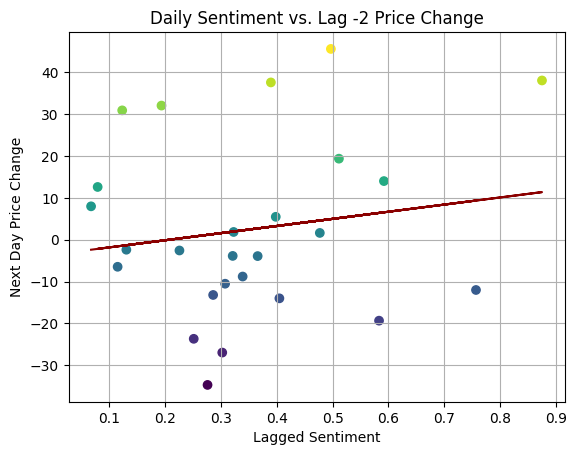

Correlation with -2 Day(s) lag: 0.16
Rf Model R-squared: 0.82
Rf Model RMSE: 8.81

Average Price Change on High Sentiment Days: -425 %
Average Price Change on Low Sentiment Days: 923 %


c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\visualizations.py:176: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future_sentiment = combined_data['average sentiment'].tail(predict_days).shift(lag).fillna(method='ffill')
c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


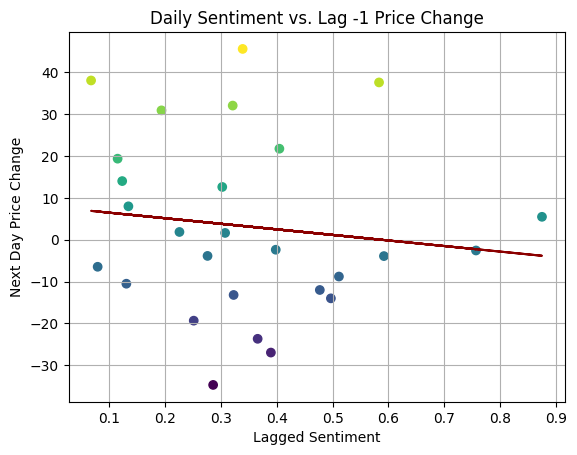

Correlation with -1 Day(s) lag: -0.13
Rf Model R-squared: 0.8
Rf Model RMSE: 9.29

Average Price Change on High Sentiment Days: -166 %
Average Price Change on Low Sentiment Days: 771 %


c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\visualizations.py:176: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future_sentiment = combined_data['average sentiment'].tail(predict_days).shift(lag).fillna(method='ffill')
c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


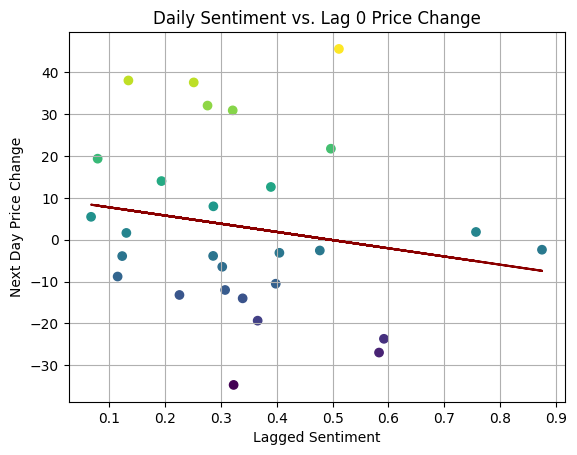

Correlation with 0 Day(s) lag: -0.19
Rf Model R-squared: 0.81
Rf Model RMSE: 8.84

Average Price Change on High Sentiment Days: -176 %
Average Price Change on Low Sentiment Days: 771 %


c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\visualizations.py:176: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future_sentiment = combined_data['average sentiment'].tail(predict_days).shift(lag).fillna(method='ffill')
c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


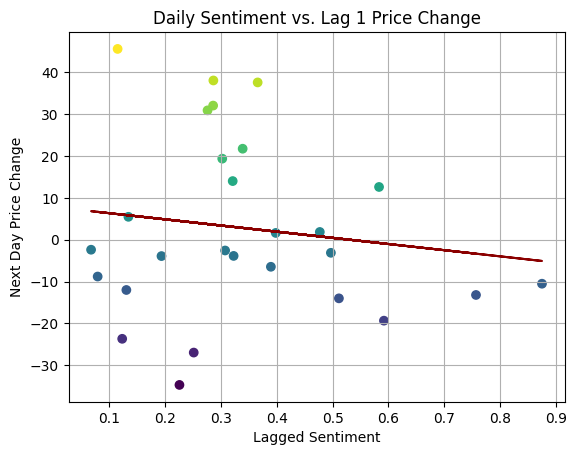

Correlation with 1 Day(s) lag: -0.14
Rf Model R-squared: 0.86
Rf Model RMSE: 7.84

Average Price Change on High Sentiment Days: -428 %
Average Price Change on Low Sentiment Days: 935 %


c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\visualizations.py:176: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future_sentiment = combined_data['average sentiment'].tail(predict_days).shift(lag).fillna(method='ffill')
c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


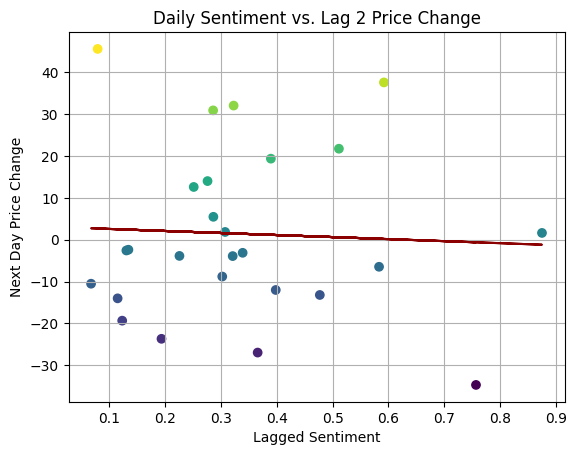

Correlation with 2 Day(s) lag: -0.05
Rf Model R-squared: 0.78
Rf Model RMSE: 9.46

Average Price Change on High Sentiment Days: -428 %
Average Price Change on Low Sentiment Days: 714 %


c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\visualizations.py:176: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future_sentiment = combined_data['average sentiment'].tail(predict_days).shift(lag).fillna(method='ffill')
c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


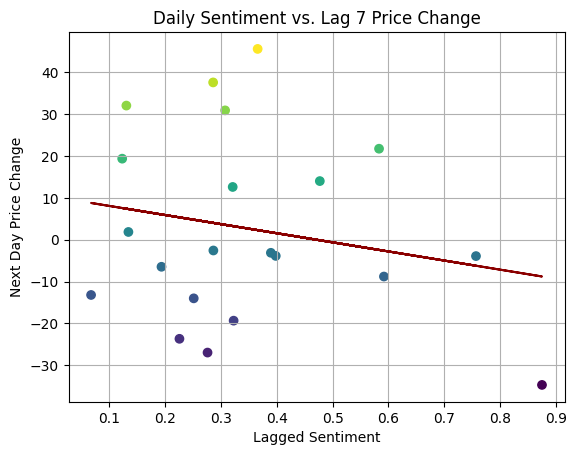

Correlation with 7 Day(s) lag: -0.2
Rf Model R-squared: 0.8
Rf Model RMSE: 9.74

Average Price Change on High Sentiment Days: -79 %
Average Price Change on Low Sentiment Days: 573 %


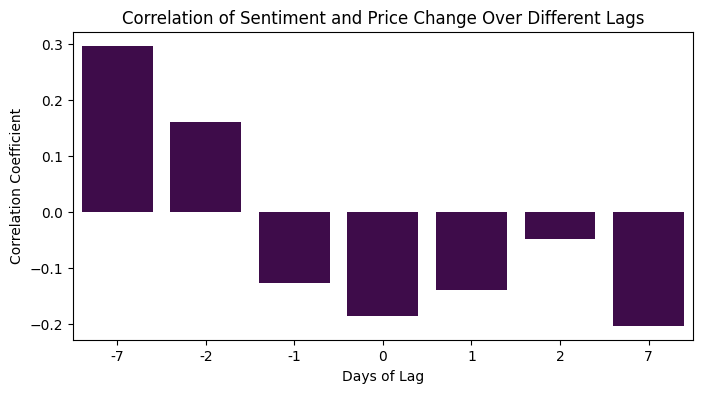

In [22]:
# Perform Analysis
model_type = 'rf'
future_predictions_by_lag = vz.analysis(combined_data, from_date, model_type=model_type, for_web=False, predict_days=5)

###### Predictions

As for the linear model, Predictive Insights
Future Predictions: Utilizing the trained Random Forest model, predictions for future price changes are made based on new sentiment data. The data is processed to match the format of the training set, ensuring that predictions are based on appropriately lagged sentiment scores.
Handling Missing Data: Any missing sentiment data in the prediction phase is handled using forward filling (fillna(method='ffill')), ensuring that the model has complete data points to make predictions.

In [23]:
# Collect all predictions from each lag
all_predictions = []

# Analyze every prediction of every lag and collect them
for idx, future_predictions in enumerate(future_predictions_by_lag):
    if not isinstance(future_predictions, (list, np.ndarray)):
        future_predictions = [future_predictions]

    # Filter out NaN values
    future_predictions = [pred for pred in future_predictions if not np.isnan(pred)]
    all_predictions.extend(future_predictions)

    avg_prediction = round(np.mean(future_predictions), 2) if future_predictions else 'N/A'
    print(f"Average Prediction for lag {idx}: {avg_prediction}")

# Filter out NaN values from all_predictions
all_predictions = [pred for pred in all_predictions if not np.isnan(pred)]

# Calculate the overall average prediction
overall_avg_prediction = round(np.mean(all_predictions), 2) if all_predictions else 'N/A'
print(f"Overall Average Prediction across all lags: {overall_avg_prediction}")

Average Prediction for lag 0: -1.18
Average Prediction for lag 1: 2.98
Average Prediction for lag 2: 6.0
Average Prediction for lag 3: 6.51
Average Prediction for lag 4: 5.93
Average Prediction for lag 5: 0.53
Average Prediction for lag 6: 6.57
Overall Average Prediction across all lags: 3.91


## Defi

In [26]:
category = 'defi'
time_period = '30d'
fetcher = CryptoDataFetcher(api_key, default_tags=category, default_limit=50, default_time_period=f"{time_period}")
price_data = fetcher.fetch_all_history()

Fetching historical data for Wrapped Ether with UUID Mtfb0obXVh59u...
Fetching historical data for Chainlink with UUID VLqpJwogdhHNb...
Fetching historical data for Uniswap with UUID _H5FVG9iW...
Fetching historical data for Fetch.AI with UUID AWma-WzFHmKVQ...
Fetching historical data for Dai with UUID MoTuySvg7...
Fetching historical data for PancakeSwap with UUID ncYFcP709...
Fetching historical data for The Graph with UUID qhd1biQ7M...
Fetching historical data for Maker with UUID qFakph2rpuMOL...
Fetching historical data for Injective Protocol with UUID PkY9BmsyW...
Fetching historical data for THORChain with UUID ybmU-kKU...
Fetching historical data for Bitget Token with UUID q7gMmMdLb...
Fetching historical data for EnergySwap with UUID SbWqqTui-...
Fetching historical data for Aave with UUID ixgUfzmLR...
Fetching historical data for Pendle with UUID SzY719EJf...
Fetching historical data for ENA with UUID hscG8ouPP...
Fetching historical data for Wormhole with UUID Fahjz3RoJ...
Fe

In [27]:
#for testing purposes
if not price_data.empty:
    fetcher.write_to_csv(price_data, f'data/{hd.get_date_str(0)}_{time_period}_{fetcher.default_limit}{category}_history.csv')
else:
    print("No data fetched.")

Data has been written to data/2024-05-18_30d_50defi_history.csv


### Vizualisation

In [39]:
#for testing purposes
sentiment_data = pd.read_csv(f"data/2024-05-18_30d_news_with_sentiment.csv")
price_data = pd.read_csv('data/2024-05-18_30d_50defi_history.csv')

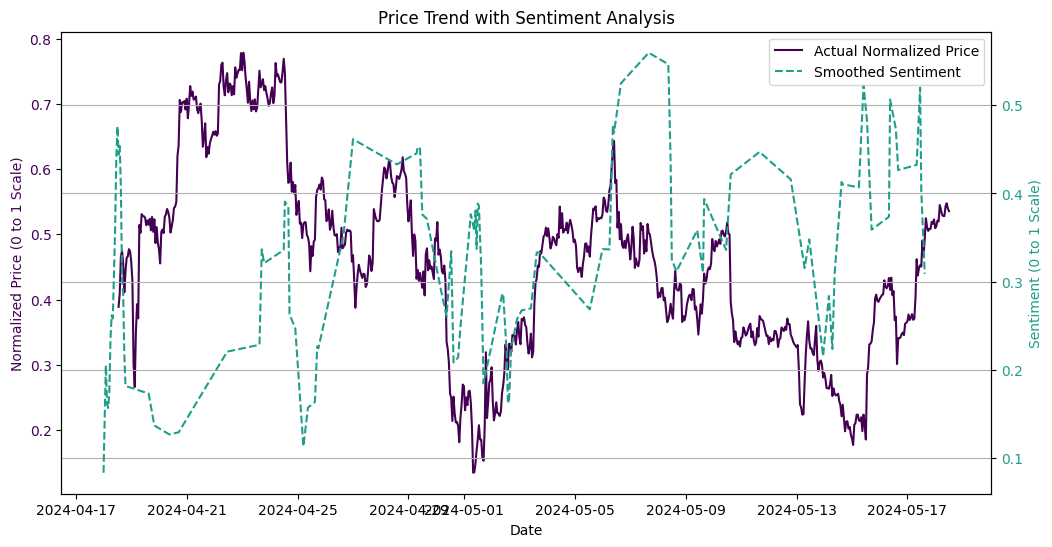

In [40]:
sentiment_data = vz.average_sentiment_per_time(from_date,sentiment_data)
price_data = vz.normalize_and_aggregate_prices(price_data)
plot = vz.plot_normalized_price_and_sentiment(price_data, sentiment_data)

### Analysis

In [41]:
# Get the closing price for each day (last price of the day)
price_data_daily = price_data['normalized price'].resample('D').last()

# Calculate the daily price change percentage
price_data_daily = pd.DataFrame(price_data_daily)  # Ensure it's a DataFrame for the next operations
price_data_daily['Price Change'] = price_data_daily['normalized price'].pct_change() * 100

# Shift the price change to align with the day's sentiment to measure its influence on the next day's price change
price_data_daily['Price Change'] = price_data_daily['Price Change'].shift(-1)

# Since sentiment is often recorded multiple times a day, we'll average it for daily granularity
sentiment_data_daily = pd.DataFrame(sentiment_data['average sentiment'].resample('D').mean())

# Merge the two datasets on the date index
combined_data = pd.concat([price_data_daily, sentiment_data_daily], axis=1)
combined_data.columns = ['Normalized Price', 'Next Day Price Change', 'average sentiment']
combined_data.dropna(inplace=True)  # Drop rows with NaN values that might result from resampling, shifting, or non-overlapping dates

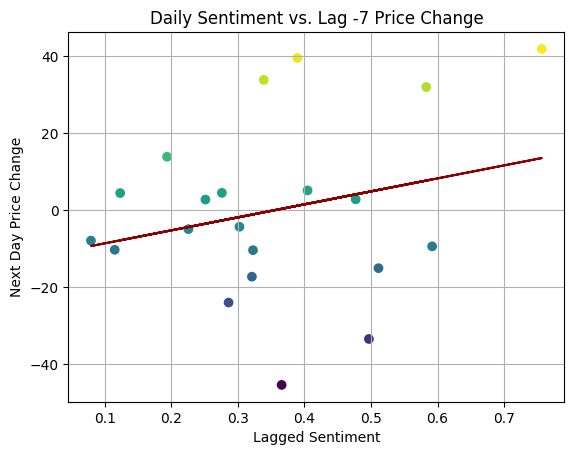

Correlation with -7 Day(s) lag: 0.25
Linear Model R-squared: 0.06
Linear Model RMSE: 21.6

Average Price Change on High Sentiment Days: -756 %
Average Price Change on Low Sentiment Days: 674 %


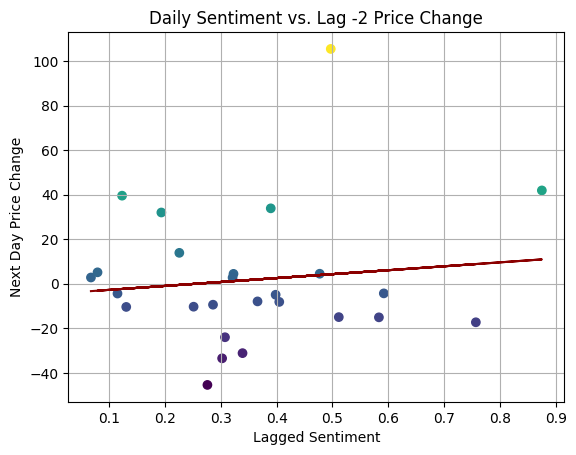

Correlation with -2 Day(s) lag: 0.12
Linear Model R-squared: 0.01
Linear Model RMSE: 29.41

Average Price Change on High Sentiment Days: 34 %
Average Price Change on Low Sentiment Days: 315 %


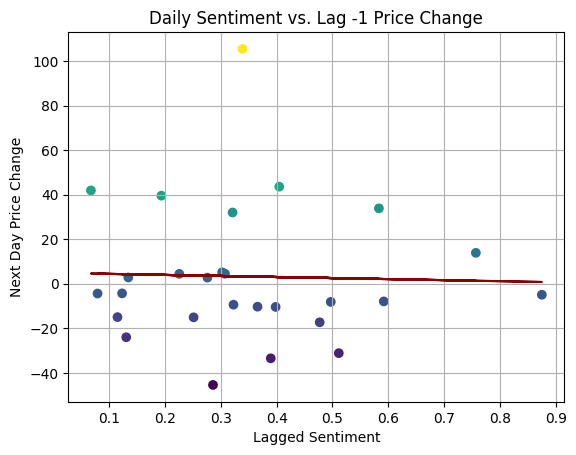

Correlation with -1 Day(s) lag: -0.03
Linear Model R-squared: 0.0
Linear Model RMSE: 30.1

Average Price Change on High Sentiment Days: 503 %
Average Price Change on Low Sentiment Days: 169 %


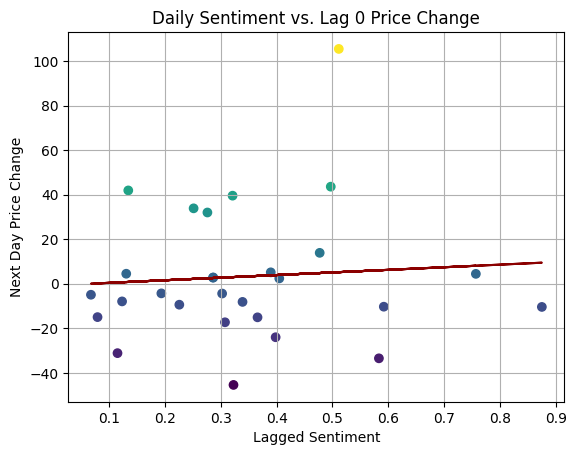

Correlation with 0 Day(s) lag: 0.08
Linear Model R-squared: 0.01
Linear Model RMSE: 29.49

Average Price Change on High Sentiment Days: 484 %
Average Price Change on Low Sentiment Days: 169 %


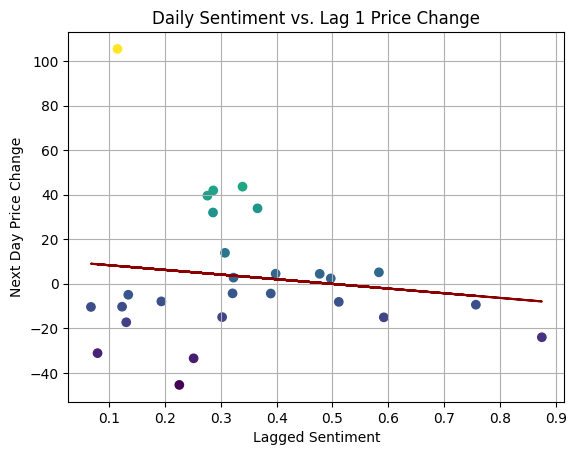

Correlation with 1 Day(s) lag: -0.14
Linear Model R-squared: 0.02
Linear Model RMSE: 29.83

Average Price Change on High Sentiment Days: 217 %
Average Price Change on Low Sentiment Days: 431 %


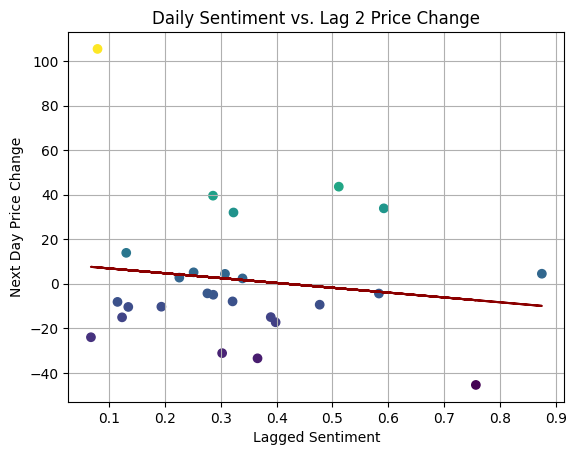

Correlation with 2 Day(s) lag: -0.14
Linear Model R-squared: 0.02
Linear Model RMSE: 29.39

Average Price Change on High Sentiment Days: 217 %
Average Price Change on Low Sentiment Days: 142 %


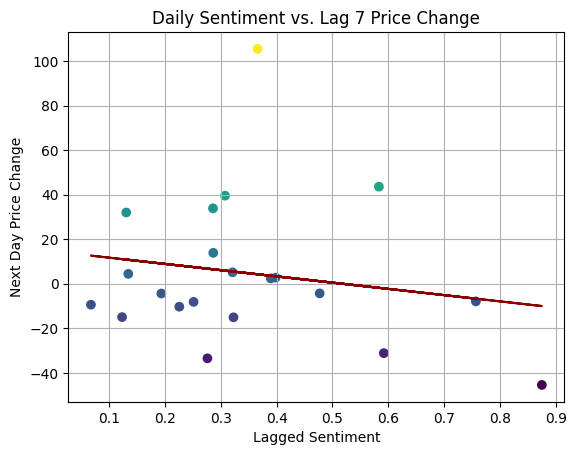

Correlation with 7 Day(s) lag: -0.18
Linear Model R-squared: 0.03
Linear Model RMSE: 31.51

Average Price Change on High Sentiment Days: 1080 %
Average Price Change on Low Sentiment Days: -85 %


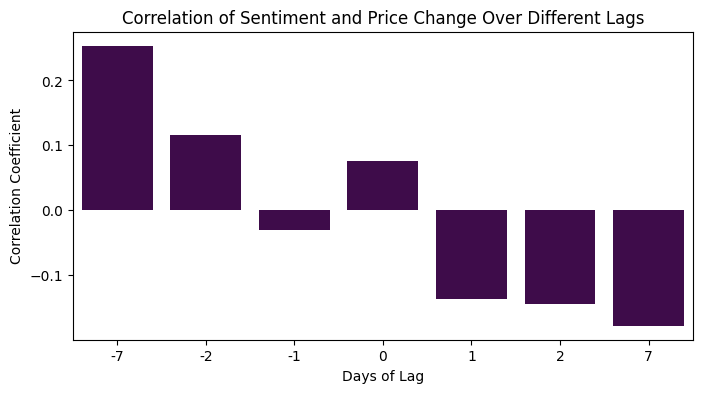

In [42]:
# Perform Analysis
model_type = 'linear'  # or 'rf'
future_predictions_by_lag = vz.analysis(combined_data, from_date, model_type=model_type, for_web=False, predict_days=5)

c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\visualizations.py:176: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future_sentiment = combined_data['average sentiment'].tail(predict_days).shift(lag).fillna(method='ffill')
c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


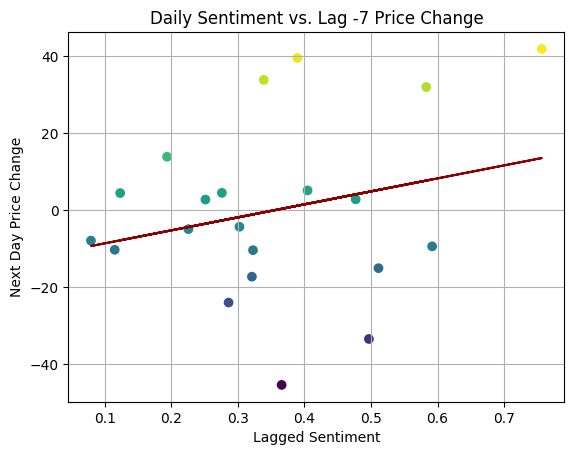

Correlation with -7 Day(s) lag: 0.25
Rf Model R-squared: 0.76
Rf Model RMSE: 11.01

Average Price Change on High Sentiment Days: -756 %
Average Price Change on Low Sentiment Days: 674 %


c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\visualizations.py:176: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future_sentiment = combined_data['average sentiment'].tail(predict_days).shift(lag).fillna(method='ffill')
c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


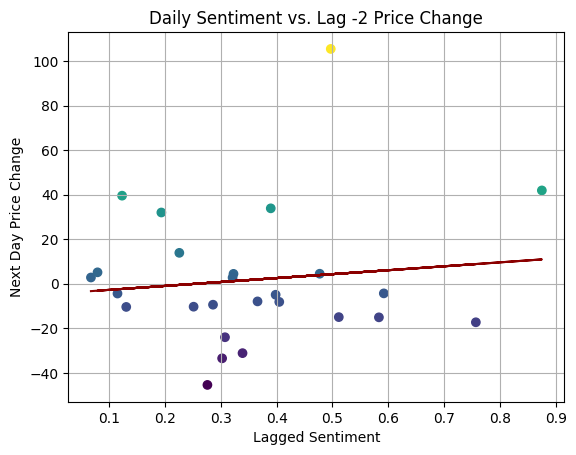

Correlation with -2 Day(s) lag: 0.12
Rf Model R-squared: 0.77
Rf Model RMSE: 14.34

Average Price Change on High Sentiment Days: 34 %
Average Price Change on Low Sentiment Days: 315 %


c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\visualizations.py:176: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future_sentiment = combined_data['average sentiment'].tail(predict_days).shift(lag).fillna(method='ffill')
c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


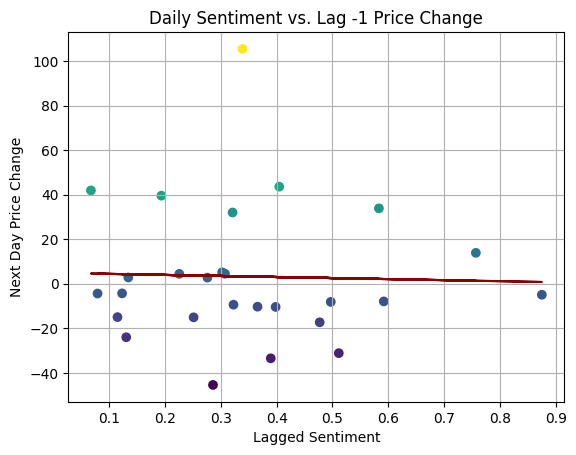

Correlation with -1 Day(s) lag: -0.03
Rf Model R-squared: 0.81
Rf Model RMSE: 12.97

Average Price Change on High Sentiment Days: 503 %
Average Price Change on Low Sentiment Days: 169 %


c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\visualizations.py:176: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future_sentiment = combined_data['average sentiment'].tail(predict_days).shift(lag).fillna(method='ffill')
c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


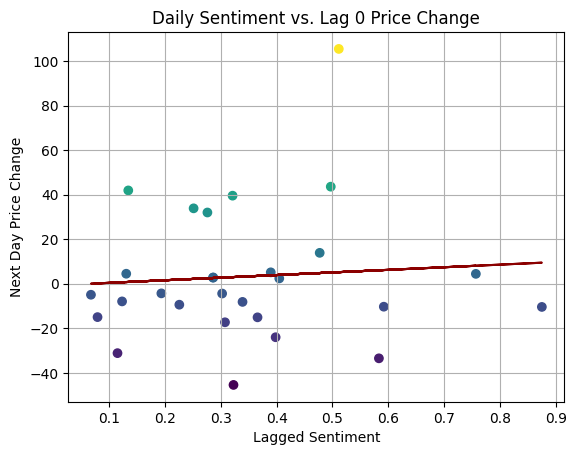

Correlation with 0 Day(s) lag: 0.08
Rf Model R-squared: 0.84
Rf Model RMSE: 11.9

Average Price Change on High Sentiment Days: 484 %
Average Price Change on Low Sentiment Days: 169 %


c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\visualizations.py:176: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future_sentiment = combined_data['average sentiment'].tail(predict_days).shift(lag).fillna(method='ffill')
c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


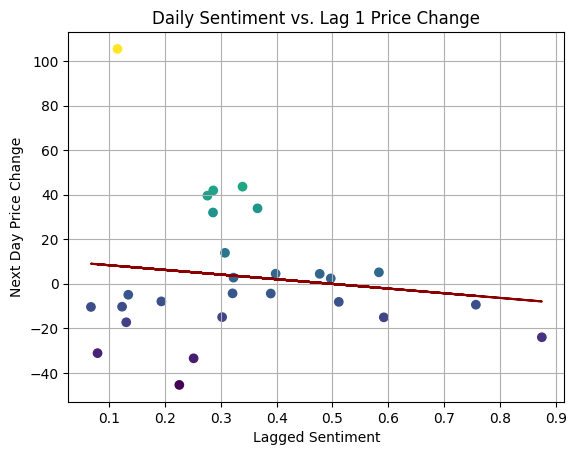

Correlation with 1 Day(s) lag: -0.14
Rf Model R-squared: 0.86
Rf Model RMSE: 11.34

Average Price Change on High Sentiment Days: 217 %
Average Price Change on Low Sentiment Days: 431 %


c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\visualizations.py:176: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future_sentiment = combined_data['average sentiment'].tail(predict_days).shift(lag).fillna(method='ffill')
c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


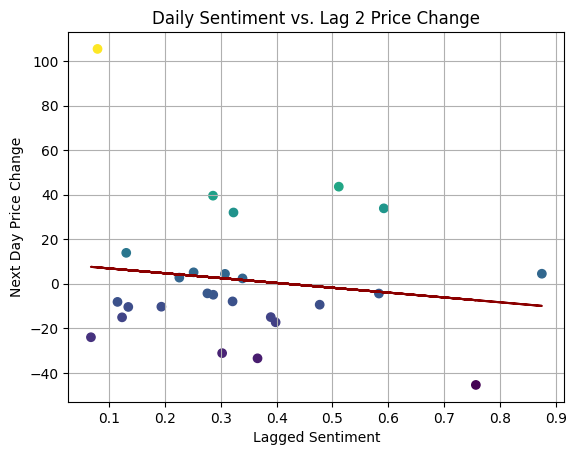

Correlation with 2 Day(s) lag: -0.14
Rf Model R-squared: 0.76
Rf Model RMSE: 14.46

Average Price Change on High Sentiment Days: 217 %
Average Price Change on Low Sentiment Days: 142 %


c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\visualizations.py:176: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future_sentiment = combined_data['average sentiment'].tail(predict_days).shift(lag).fillna(method='ffill')
c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


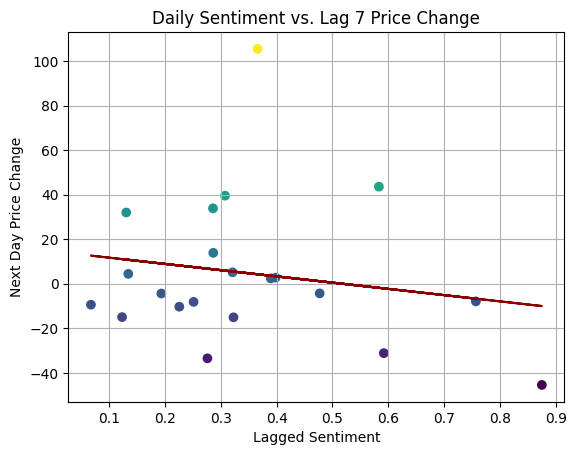

Correlation with 7 Day(s) lag: -0.18
Rf Model R-squared: 0.82
Rf Model RMSE: 13.7

Average Price Change on High Sentiment Days: 1080 %
Average Price Change on Low Sentiment Days: -85 %


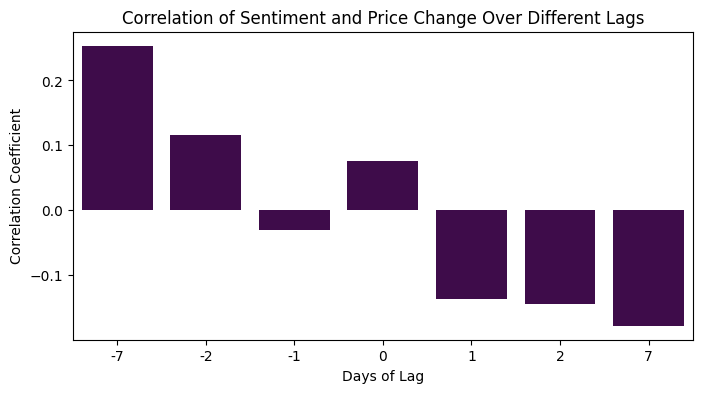

In [43]:
# Perform Analysis
model_type = 'rf'  # or 'rf'
future_predictions_by_lag = vz.analysis(combined_data, from_date, model_type=model_type, for_web=False, predict_days=5)

## Layer 1

Fetching historical data for Bitcoin with UUID Qwsogvtv82FCd...
Fetching historical data for Ethereum with UUID razxDUgYGNAdQ...
Fetching historical data for BNB with UUID WcwrkfNI4FUAe...
Fetching historical data for Solana with UUID zNZHO_Sjf...
Fetching historical data for XRP with UUID -l8Mn2pVlRs-p...
Fetching historical data for Toncoin with UUID 67YlI0K1b...
Fetching historical data for Dogecoin with UUID a91GCGd_u96cF...
Fetching historical data for Cardano with UUID qzawljRxB5bYu...
Fetching historical data for Avalanche with UUID dvUj0CzDZ...
Fetching historical data for TRON with UUID qUhEFk1I61atv...
Fetching historical data for Polkadot with UUID 25W7FG7om...
Fetching historical data for Litecoin with UUID D7B1x_ks7WhV5...
Fetching historical data for Internet Computer (DFINITY) with UUID aMNLwaUbY...
Fetching historical data for Fetch.AI with UUID AWma-WzFHmKVQ...
Fetching historical data for NEAR Protocol with UUID DCrsaMv68...
Fetching historical data for Ethereum Class

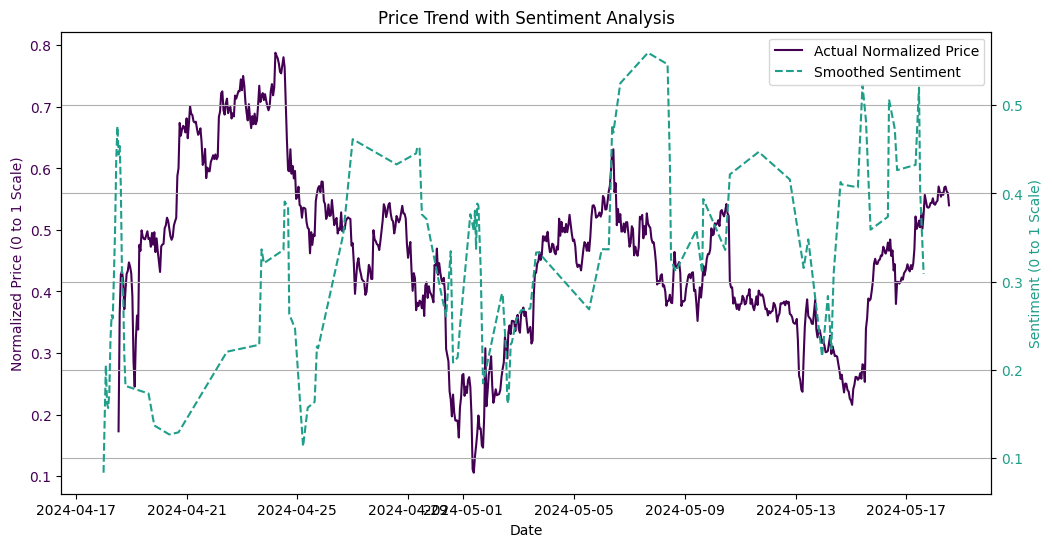

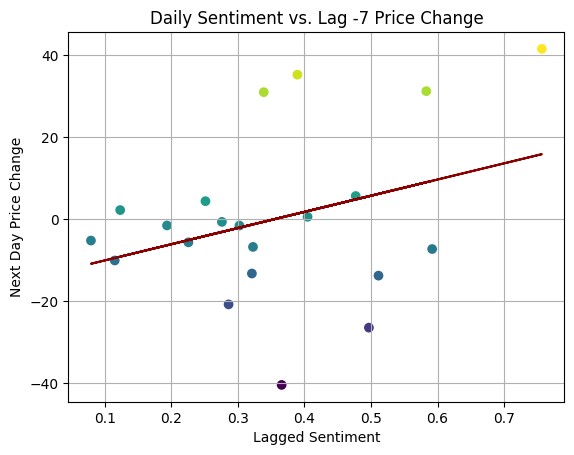

Correlation with -7 Day(s) lag: 0.33
Linear Model R-squared: 0.11
Linear Model RMSE: 18.8

Average Price Change on High Sentiment Days: -815 %
Average Price Change on Low Sentiment Days: 729 %


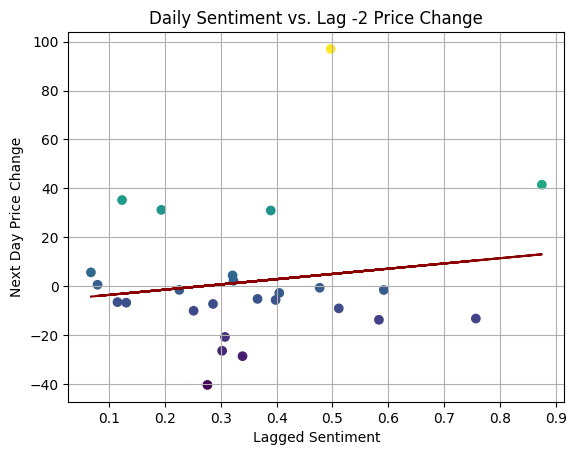

Correlation with -2 Day(s) lag: 0.16
Linear Model R-squared: 0.02
Linear Model RMSE: 26.42

Average Price Change on High Sentiment Days: -4 %
Average Price Change on Low Sentiment Days: 379 %


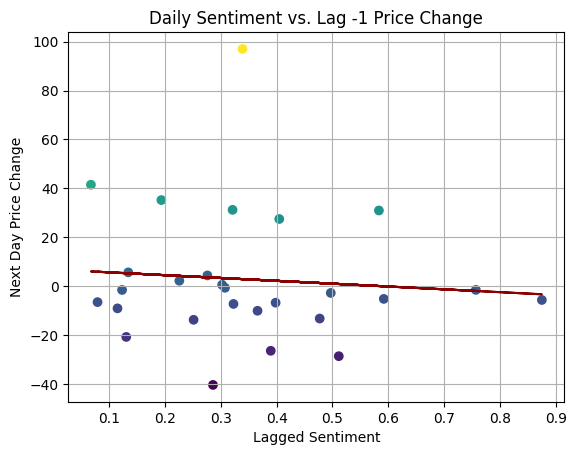

Correlation with -1 Day(s) lag: -0.09
Linear Model R-squared: 0.01
Linear Model RMSE: 26.59

Average Price Change on High Sentiment Days: 309 %
Average Price Change on Low Sentiment Days: 258 %


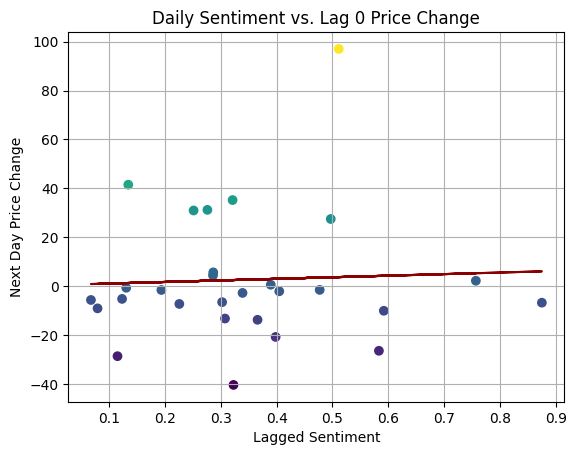

Correlation with 0 Day(s) lag: 0.05
Linear Model R-squared: 0.0
Linear Model RMSE: 26.2

Average Price Change on High Sentiment Days: 272 %
Average Price Change on Low Sentiment Days: 258 %


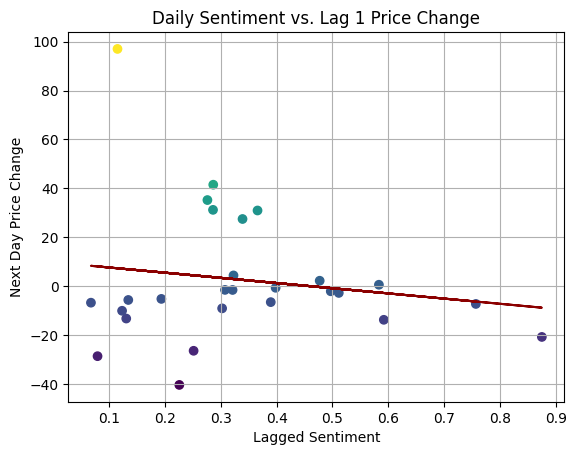

Correlation with 1 Day(s) lag: -0.16
Linear Model R-squared: 0.02
Linear Model RMSE: 26.37

Average Price Change on High Sentiment Days: 23 %
Average Price Change on Low Sentiment Days: 469 %


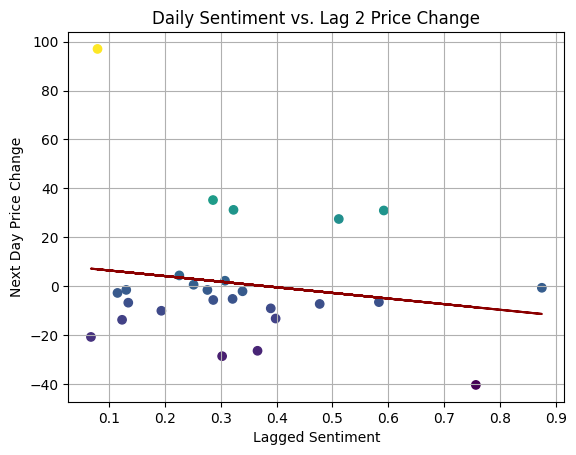

Correlation with 2 Day(s) lag: -0.17
Linear Model R-squared: 0.03
Linear Model RMSE: 25.67

Average Price Change on High Sentiment Days: 23 %
Average Price Change on Low Sentiment Days: 186 %


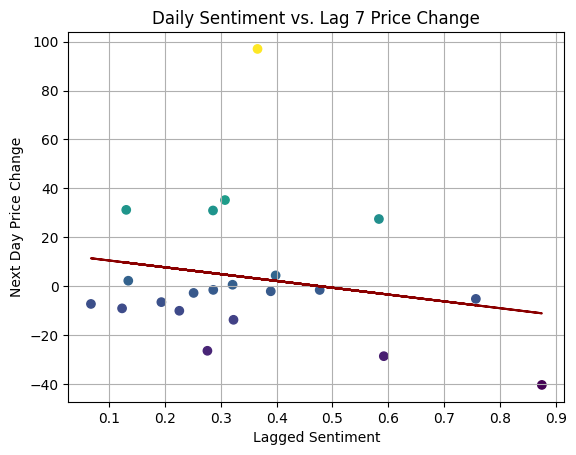

Correlation with 7 Day(s) lag: -0.2
Linear Model R-squared: 0.04
Linear Model RMSE: 27.68

Average Price Change on High Sentiment Days: 708 %
Average Price Change on Low Sentiment Days: 30 %


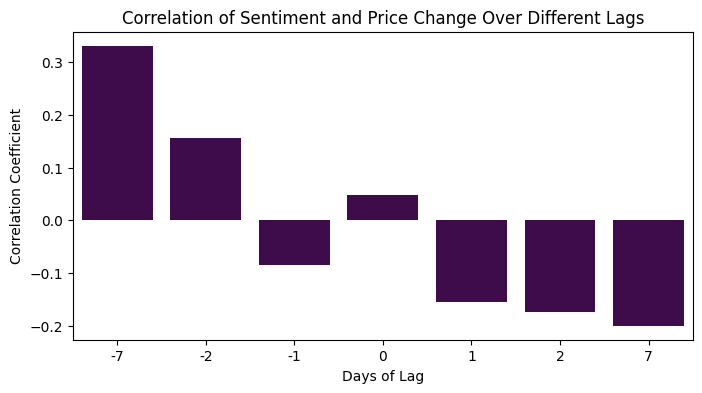

In [44]:
category = 'layer-1'
time_period = '30d'
fetcher = CryptoDataFetcher(api_key, default_tags=category, default_limit=50, default_time_period=f"{time_period}")
price_data = fetcher.fetch_all_history()

#for testing purposes
if not price_data.empty:
    fetcher.write_to_csv(price_data, f'data/{hd.get_date_str(0)}_{time_period}_{fetcher.default_limit}{category}_history.csv')
else:
    print("No data fetched.")

#for testing purposes
sentiment_data = pd.read_csv(f"data/2024-05-18_30d_news_with_sentiment.csv")
price_data = pd.read_csv('data/2024-05-18_30d_50layer-1_history.csv')

sentiment_data = vz.average_sentiment_per_time(from_date,sentiment_data)
price_data = vz.normalize_and_aggregate_prices(price_data)
plot = vz.plot_normalized_price_and_sentiment(price_data, sentiment_data)

# Get the closing price for each day (last price of the day)
price_data_daily = price_data['normalized price'].resample('D').last()

# Calculate the daily price change percentage
price_data_daily = pd.DataFrame(price_data_daily)  # Ensure it's a DataFrame for the next operations
price_data_daily['Price Change'] = price_data_daily['normalized price'].pct_change() * 100

# Shift the price change to align with the day's sentiment to measure its influence on the next day's price change
price_data_daily['Price Change'] = price_data_daily['Price Change'].shift(-1)

# Since sentiment is often recorded multiple times a day, we'll average it for daily granularity
sentiment_data_daily = pd.DataFrame(sentiment_data['average sentiment'].resample('D').mean())

# Merge the two datasets on the date index
combined_data = pd.concat([price_data_daily, sentiment_data_daily], axis=1)
combined_data.columns = ['Normalized Price', 'Next Day Price Change', 'average sentiment']
combined_data.dropna(inplace=True)  # Drop rows with NaN values that might result from resampling, shifting, or non-overlapping dates

# Perform Analysis
model_type = 'linear'  # or 'rf'
future_predictions_by_lag = vz.analysis(combined_data, from_date, model_type=model_type, for_web=False, predict_days=5)


In [ ]:
# Perform Analysis
model_type = 'rf'  # or 'rf'
future_predictions_by_lag = vz.analysis(combined_data, from_date, model_type=model_type, for_web=False, predict_days=5)

## BTC and ETH

Fetching historical data for Bitcoin with UUID Qwsogvtv82FCd...
Fetching historical data for Ethereum with UUID razxDUgYGNAdQ...
Data has been written to data/2024-05-18_30d_2layer-1_history.csv


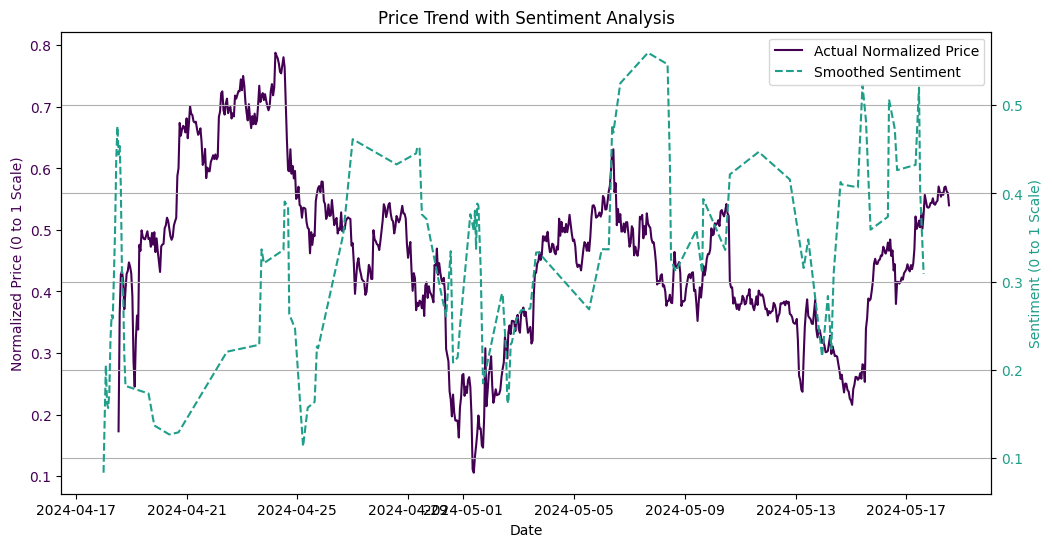

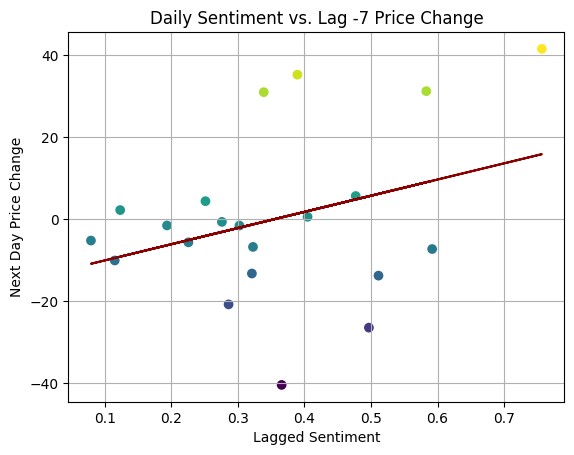

Correlation with -7 Day(s) lag: 0.33
Linear Model R-squared: 0.11
Linear Model RMSE: 18.8

Average Price Change on High Sentiment Days: -815 %
Average Price Change on Low Sentiment Days: 729 %


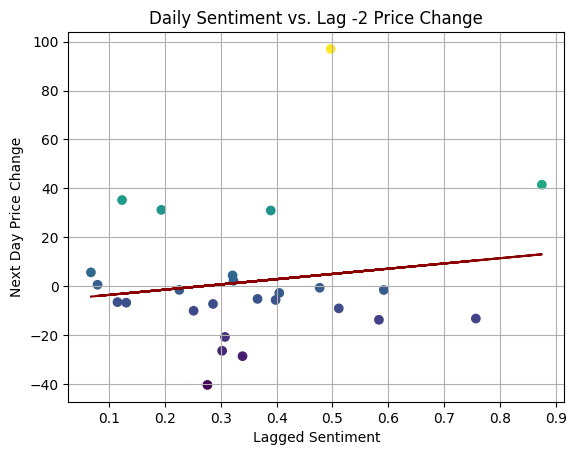

Correlation with -2 Day(s) lag: 0.16
Linear Model R-squared: 0.02
Linear Model RMSE: 26.42

Average Price Change on High Sentiment Days: -4 %
Average Price Change on Low Sentiment Days: 379 %


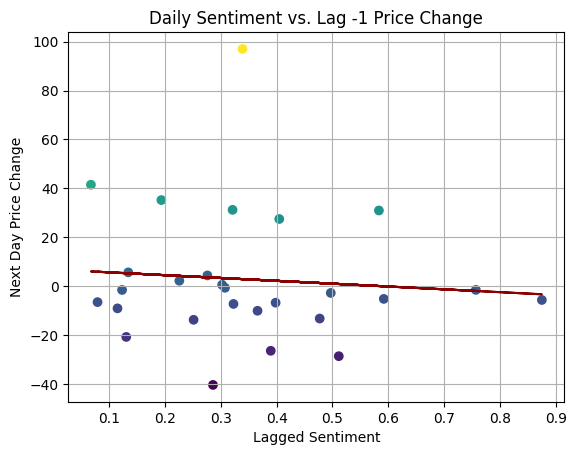

Correlation with -1 Day(s) lag: -0.09
Linear Model R-squared: 0.01
Linear Model RMSE: 26.59

Average Price Change on High Sentiment Days: 309 %
Average Price Change on Low Sentiment Days: 258 %


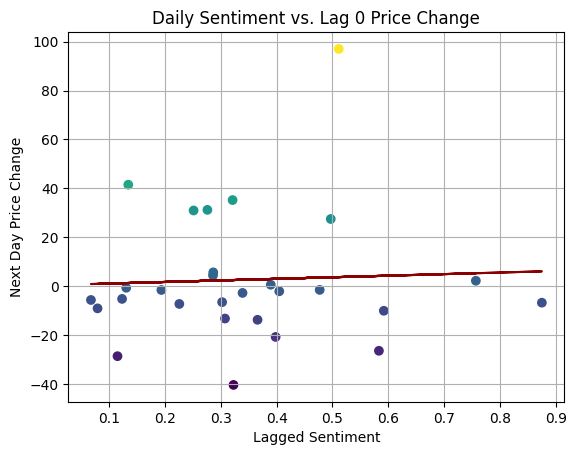

Correlation with 0 Day(s) lag: 0.05
Linear Model R-squared: 0.0
Linear Model RMSE: 26.2

Average Price Change on High Sentiment Days: 272 %
Average Price Change on Low Sentiment Days: 258 %


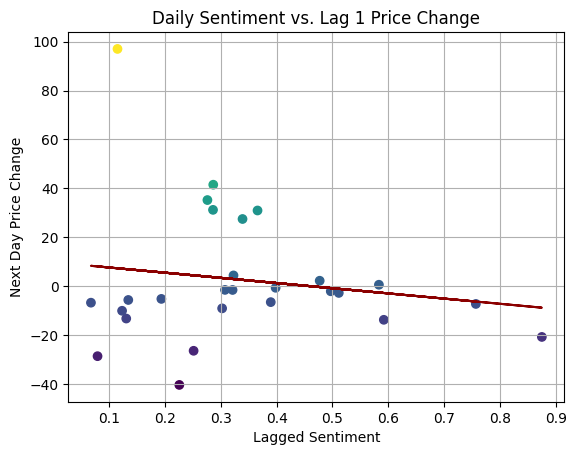

Correlation with 1 Day(s) lag: -0.16
Linear Model R-squared: 0.02
Linear Model RMSE: 26.37

Average Price Change on High Sentiment Days: 23 %
Average Price Change on Low Sentiment Days: 469 %


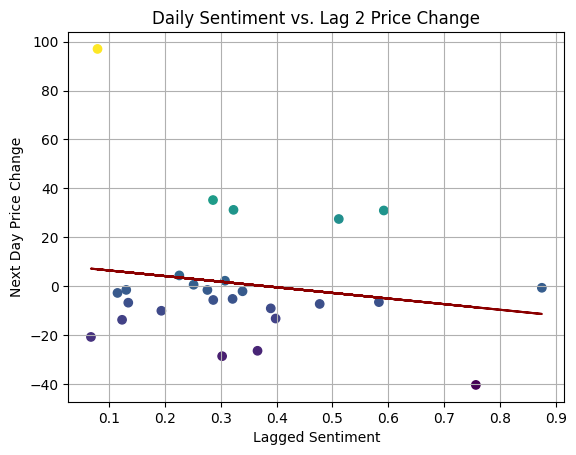

Correlation with 2 Day(s) lag: -0.17
Linear Model R-squared: 0.03
Linear Model RMSE: 25.67

Average Price Change on High Sentiment Days: 23 %
Average Price Change on Low Sentiment Days: 186 %


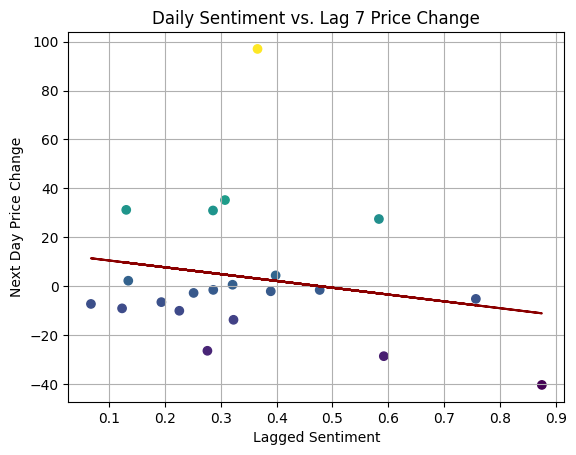

Correlation with 7 Day(s) lag: -0.2
Linear Model R-squared: 0.04
Linear Model RMSE: 27.68

Average Price Change on High Sentiment Days: 708 %
Average Price Change on Low Sentiment Days: 30 %


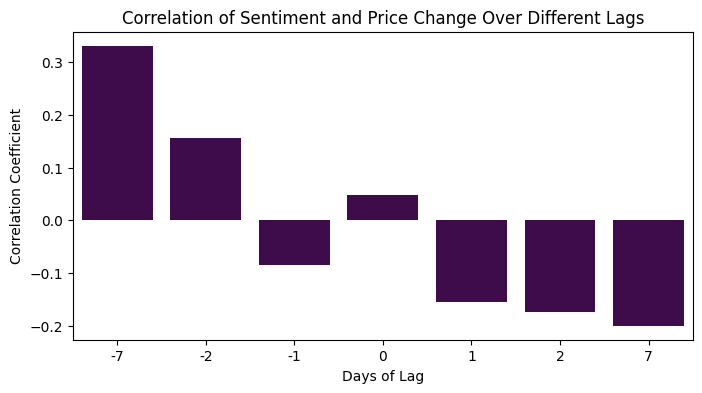

In [45]:
category = 'layer-1'
time_period = '30d'
fetcher = CryptoDataFetcher(api_key, default_tags=category, default_limit=2, default_time_period=f"{time_period}")
price_data = fetcher.fetch_all_history()

#for testing purposes
if not price_data.empty:
    fetcher.write_to_csv(price_data, f'data/{hd.get_date_str(0)}_{time_period}_{fetcher.default_limit}{category}_history.csv')
else:
    print("No data fetched.")

#for testing purposes
sentiment_data = pd.read_csv(f"data/2024-05-18_30d_news_with_sentiment.csv")
price_data = pd.read_csv('data/2024-05-18_30d_50layer-1_history.csv')

sentiment_data = vz.average_sentiment_per_time(from_date,sentiment_data)
price_data = vz.normalize_and_aggregate_prices(price_data)
plot = vz.plot_normalized_price_and_sentiment(price_data, sentiment_data)

# Get the closing price for each day (last price of the day)
price_data_daily = price_data['normalized price'].resample('D').last()

# Calculate the daily price change percentage
price_data_daily = pd.DataFrame(price_data_daily)  # Ensure it's a DataFrame for the next operations
price_data_daily['Price Change'] = price_data_daily['normalized price'].pct_change() * 100

# Shift the price change to align with the day's sentiment to measure its influence on the next day's price change
price_data_daily['Price Change'] = price_data_daily['Price Change'].shift(-1)

# Since sentiment is often recorded multiple times a day, we'll average it for daily granularity
sentiment_data_daily = pd.DataFrame(sentiment_data['average sentiment'].resample('D').mean())

# Merge the two datasets on the date index
combined_data = pd.concat([price_data_daily, sentiment_data_daily], axis=1)
combined_data.columns = ['Normalized Price', 'Next Day Price Change', 'average sentiment']
combined_data.dropna(inplace=True)  # Drop rows with NaN values that might result from resampling, shifting, or non-overlapping dates

# Perform Analysis
model_type = 'linear'  # or 'rf'
future_predictions_by_lag = vz.analysis(combined_data, from_date, model_type=model_type, for_web=False, predict_days=5)


c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\visualizations.py:176: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future_sentiment = combined_data['average sentiment'].tail(predict_days).shift(lag).fillna(method='ffill')
c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


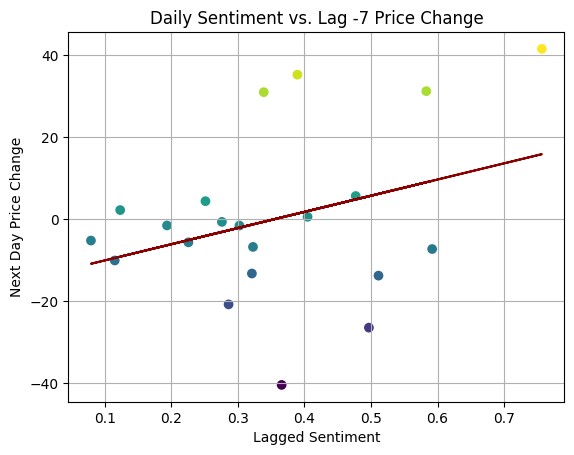

Correlation with -7 Day(s) lag: 0.33
Rf Model R-squared: 0.76
Rf Model RMSE: 9.81

Average Price Change on High Sentiment Days: -815 %
Average Price Change on Low Sentiment Days: 729 %


c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\visualizations.py:176: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future_sentiment = combined_data['average sentiment'].tail(predict_days).shift(lag).fillna(method='ffill')
c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


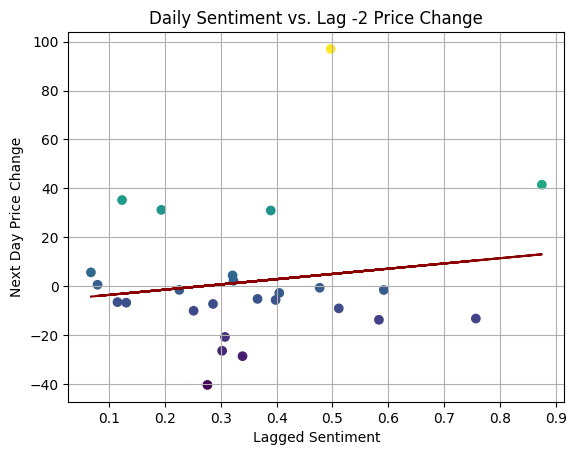

Correlation with -2 Day(s) lag: 0.16
Rf Model R-squared: 0.76
Rf Model RMSE: 13.07

Average Price Change on High Sentiment Days: -4 %
Average Price Change on Low Sentiment Days: 379 %


c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\visualizations.py:176: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future_sentiment = combined_data['average sentiment'].tail(predict_days).shift(lag).fillna(method='ffill')
c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


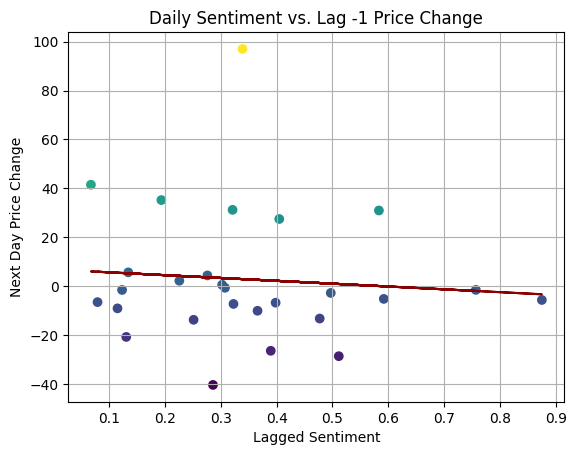

Correlation with -1 Day(s) lag: -0.09
Rf Model R-squared: 0.81
Rf Model RMSE: 11.51

Average Price Change on High Sentiment Days: 309 %
Average Price Change on Low Sentiment Days: 258 %


c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\visualizations.py:176: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future_sentiment = combined_data['average sentiment'].tail(predict_days).shift(lag).fillna(method='ffill')
c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


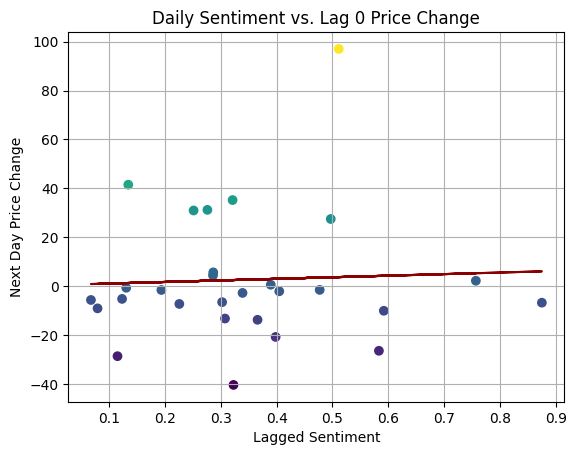

Correlation with 0 Day(s) lag: 0.05
Rf Model R-squared: 0.81
Rf Model RMSE: 11.3

Average Price Change on High Sentiment Days: 272 %
Average Price Change on Low Sentiment Days: 258 %


c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\visualizations.py:176: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future_sentiment = combined_data['average sentiment'].tail(predict_days).shift(lag).fillna(method='ffill')
c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


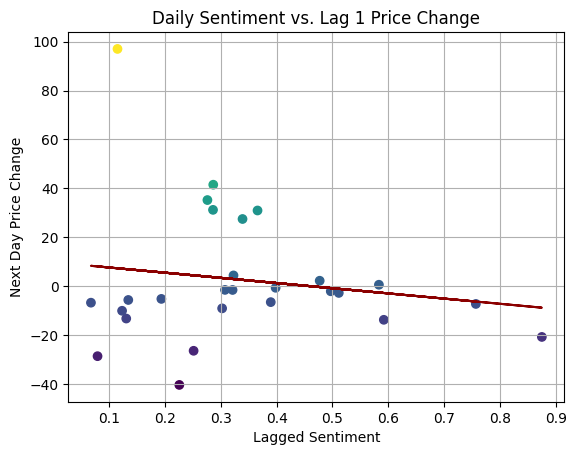

Correlation with 1 Day(s) lag: -0.16
Rf Model R-squared: 0.87
Rf Model RMSE: 9.79

Average Price Change on High Sentiment Days: 23 %
Average Price Change on Low Sentiment Days: 469 %


c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\visualizations.py:176: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future_sentiment = combined_data['average sentiment'].tail(predict_days).shift(lag).fillna(method='ffill')
c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


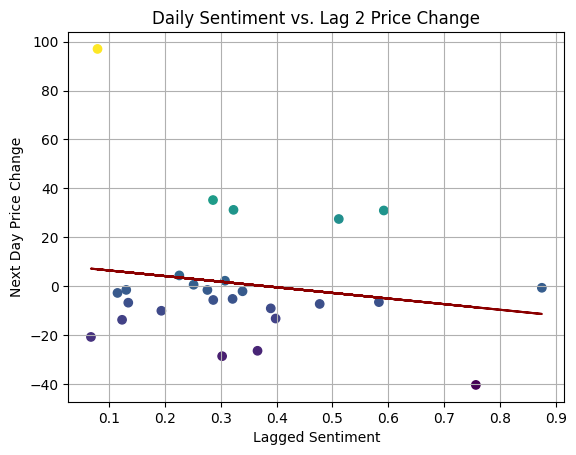

Correlation with 2 Day(s) lag: -0.17
Rf Model R-squared: 0.77
Rf Model RMSE: 12.59

Average Price Change on High Sentiment Days: 23 %
Average Price Change on Low Sentiment Days: 186 %


c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\visualizations.py:176: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future_sentiment = combined_data['average sentiment'].tail(predict_days).shift(lag).fillna(method='ffill')
c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


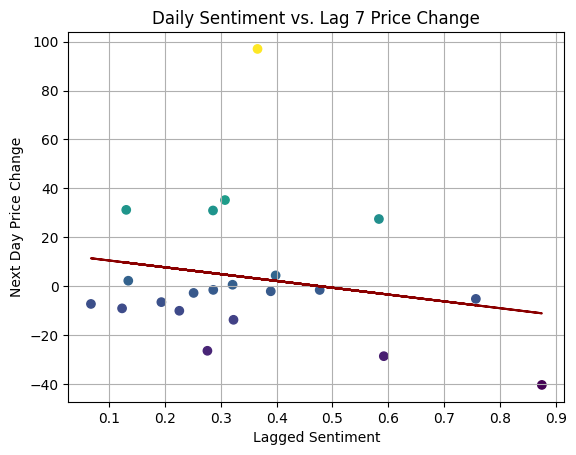

Correlation with 7 Day(s) lag: -0.2
Rf Model R-squared: 0.81
Rf Model RMSE: 12.28

Average Price Change on High Sentiment Days: 708 %
Average Price Change on Low Sentiment Days: 30 %


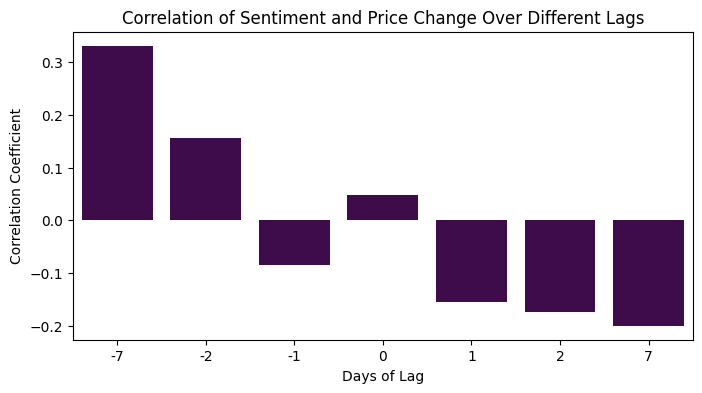

In [46]:
# Perform Analysis
model_type = 'rf'  # or 'rf'
future_predictions_by_lag = vz.analysis(combined_data, from_date, model_type=model_type, for_web=False, predict_days=5)

## Gaming

Fetching historical data for Flow with UUID QQ0NCmjVq...
Fetching historical data for BEAM with UUID cYYMfXF4u...
Fetching historical data for The Sandbox with UUID pxtKbG5rg...
Fetching historical data for Decentraland with UUID tEf7-dnwV3BXS...
Fetching historical data for Echelon Prime with UUID M-D5dCUfp...
Fetching historical data for Illuvium with UUID WvoRtQhzN...
Fetching historical data for Axie Infinity with UUID gpRKmM16k...
Fetching historical data for Gala  with UUID zfVt1uA3P...
Fetching historical data for Guild of Guardians with UUID x6pIFu9Oo...
Fetching historical data for XAI with UUID SPypnJP-O...
Fetching historical data for Mobox with UUID -tRNv2erP...
Fetching historical data for Ultra with UUID bjb5p_MJm...
Fetching historical data for PORTAL with UUID OC2XUdr2U...
Fetching historical data for Zentry with UUID qybMFc__MX...
Skipping entry with None price: {'price': None, 'timestamp': 1714615200}
Skipping entry with None price: {'price': None, 'timestamp': 171461

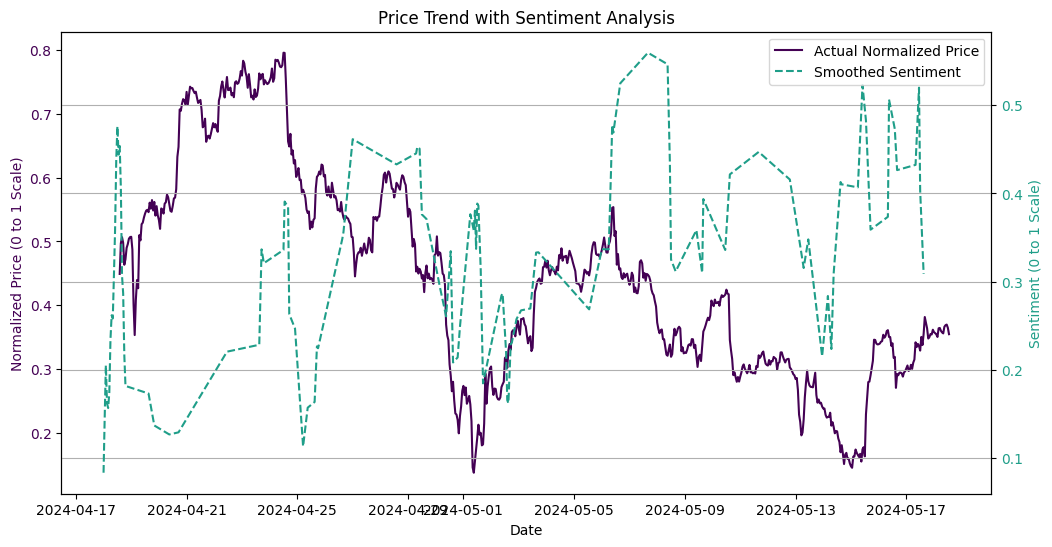

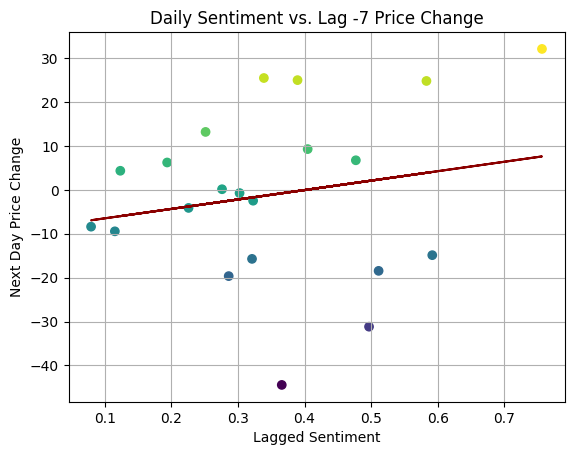

Correlation with -7 Day(s) lag: 0.19
Linear Model R-squared: 0.04
Linear Model RMSE: 18.67

Average Price Change on High Sentiment Days: -807 %
Average Price Change on Low Sentiment Days: 534 %


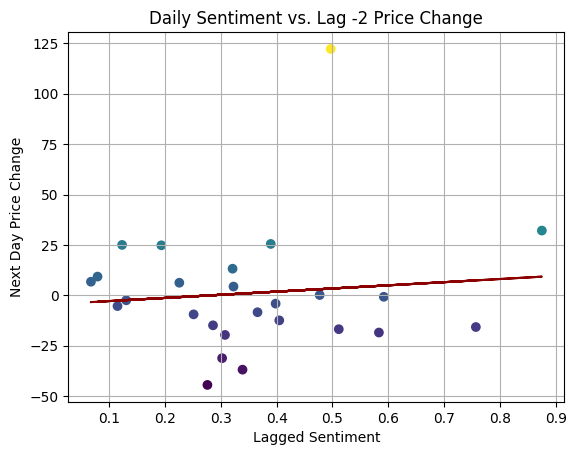

Correlation with -2 Day(s) lag: 0.1
Linear Model R-squared: 0.01
Linear Model RMSE: 30.45

Average Price Change on High Sentiment Days: 103 %
Average Price Change on Low Sentiment Days: 119 %


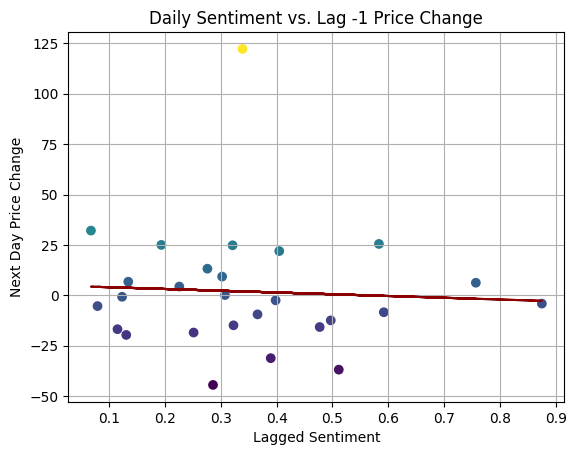

Correlation with -1 Day(s) lag: -0.06
Linear Model R-squared: 0.0
Linear Model RMSE: 30.24

Average Price Change on High Sentiment Days: 393 %
Average Price Change on Low Sentiment Days: -2 %


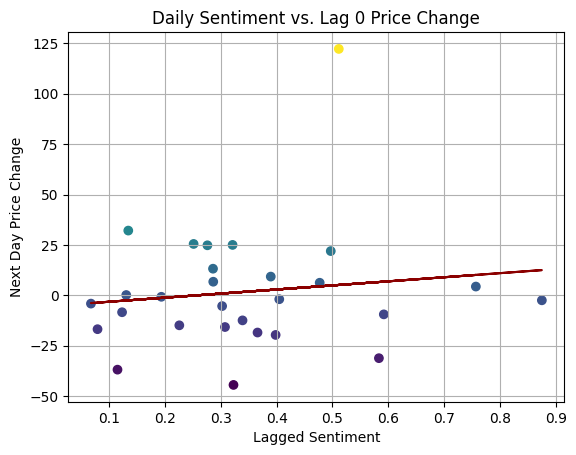

Correlation with 0 Day(s) lag: 0.13
Linear Model R-squared: 0.02
Linear Model RMSE: 29.49

Average Price Change on High Sentiment Days: 351 %
Average Price Change on Low Sentiment Days: -2 %


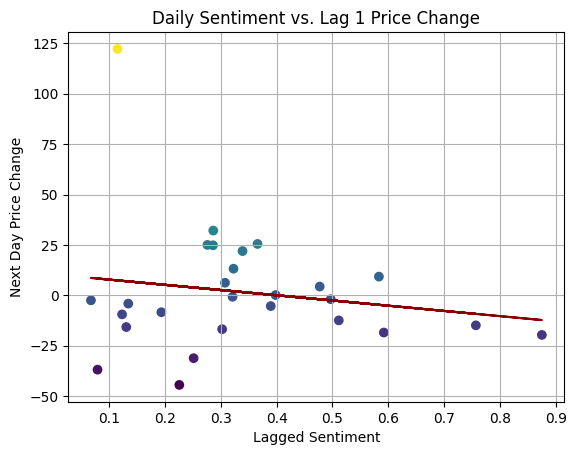

Correlation with 1 Day(s) lag: -0.17
Linear Model R-squared: 0.03
Linear Model RMSE: 29.85

Average Price Change on High Sentiment Days: 185 %
Average Price Change on Low Sentiment Days: 128 %


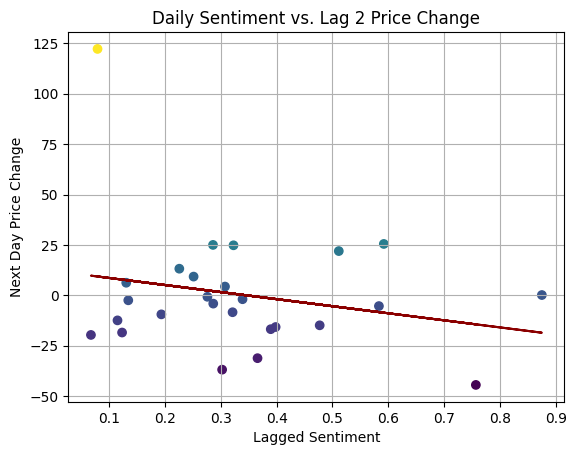

Correlation with 2 Day(s) lag: -0.23
Linear Model R-squared: 0.05
Linear Model RMSE: 29.44

Average Price Change on High Sentiment Days: 185 %
Average Price Change on Low Sentiment Days: -109 %


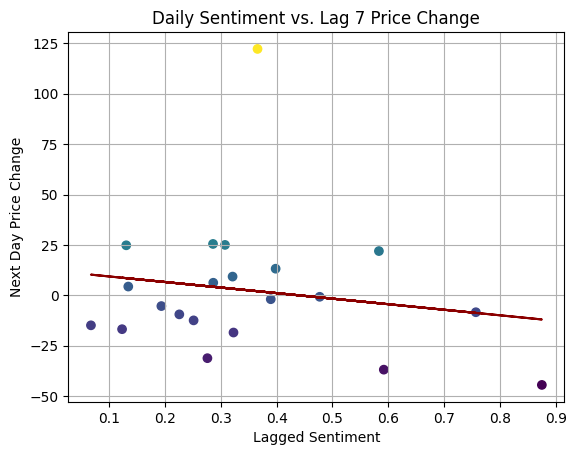

Correlation with 7 Day(s) lag: -0.17
Linear Model R-squared: 0.03
Linear Model RMSE: 32.62

Average Price Change on High Sentiment Days: 907 %
Average Price Change on Low Sentiment Days: -354 %


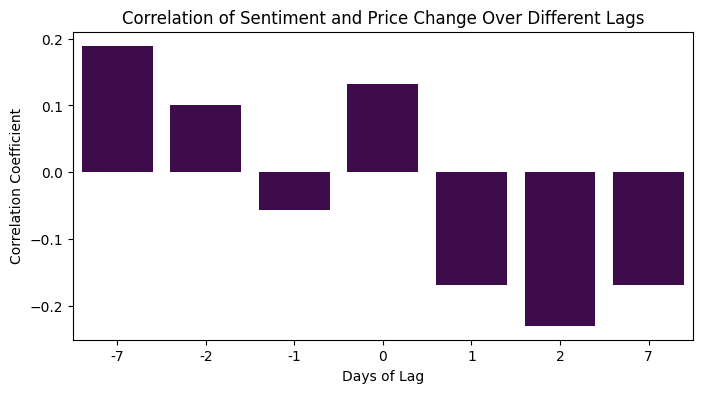

In [47]:
category = 'gaming'
time_period = '30d'
fetcher = CryptoDataFetcher(api_key, default_tags=category, default_limit=50, default_time_period=f"{time_period}")
price_data = fetcher.fetch_all_history()

#for testing purposes
if not price_data.empty:
    fetcher.write_to_csv(price_data, f'data/{hd.get_date_str(0)}_{time_period}_{fetcher.default_limit}{category}_history.csv')
else:
    print("No data fetched.")

#for testing purposes
sentiment_data = pd.read_csv(f"data/2024-05-18_30d_news_with_sentiment.csv")
price_data = pd.read_csv('data/2024-05-18_30d_50gaming_history.csv')

sentiment_data = vz.average_sentiment_per_time(from_date,sentiment_data)
price_data = vz.normalize_and_aggregate_prices(price_data)
plot = vz.plot_normalized_price_and_sentiment(price_data, sentiment_data)

# Get the closing price for each day (last price of the day)
price_data_daily = price_data['normalized price'].resample('D').last()

# Calculate the daily price change percentage
price_data_daily = pd.DataFrame(price_data_daily)  # Ensure it's a DataFrame for the next operations
price_data_daily['Price Change'] = price_data_daily['normalized price'].pct_change() * 100

# Shift the price change to align with the day's sentiment to measure its influence on the next day's price change
price_data_daily['Price Change'] = price_data_daily['Price Change'].shift(-1)

# Since sentiment is often recorded multiple times a day, we'll average it for daily granularity
sentiment_data_daily = pd.DataFrame(sentiment_data['average sentiment'].resample('D').mean())

# Merge the two datasets on the date index
combined_data = pd.concat([price_data_daily, sentiment_data_daily], axis=1)
combined_data.columns = ['Normalized Price', 'Next Day Price Change', 'average sentiment']
combined_data.dropna(inplace=True)  # Drop rows with NaN values that might result from resampling, shifting, or non-overlapping dates

# Perform Analysis
model_type = 'linear'  # or 'rf'
future_predictions_by_lag = vz.analysis(combined_data, from_date, model_type=model_type, for_web=False, predict_days=5)


## Meme 2024-04-05

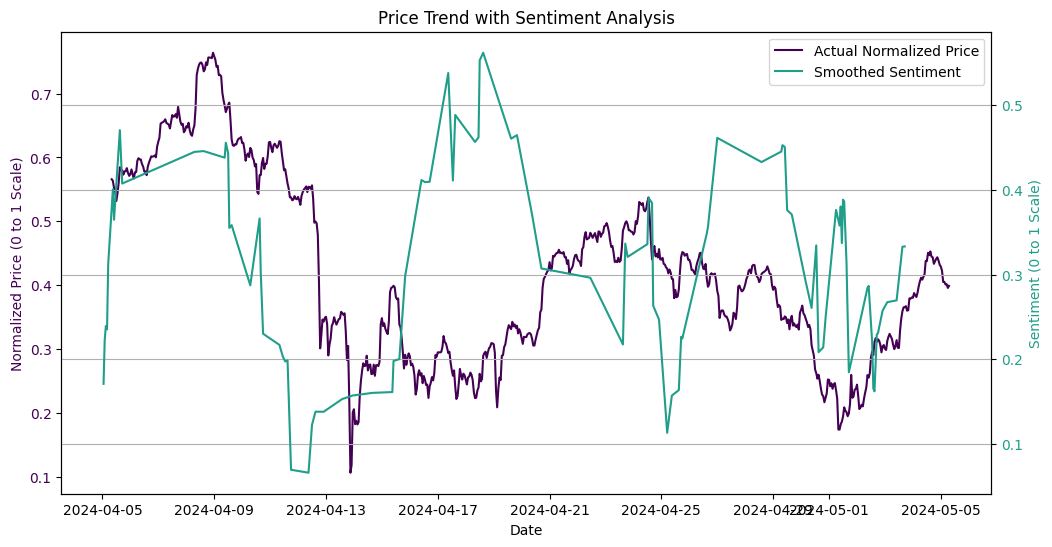

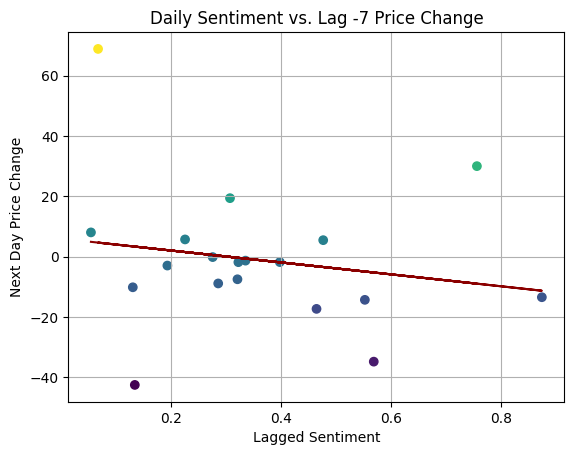

Correlation with -7 Day(s) lag: -0.18
Linear Model R-squared: 0.03
Linear Model RMSE: 22.63

Average Price Change on High Sentiment Days: -111 %
Average Price Change on Low Sentiment Days: -94 %


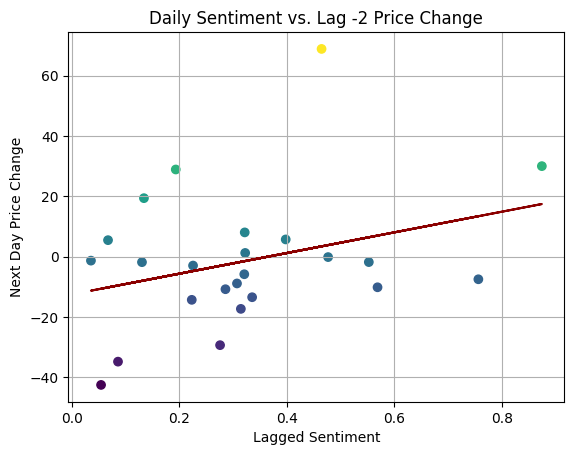

Correlation with -2 Day(s) lag: 0.32
Linear Model R-squared: 0.1
Linear Model RMSE: 21.07

Average Price Change on High Sentiment Days: -328 %
Average Price Change on Low Sentiment Days: 35 %


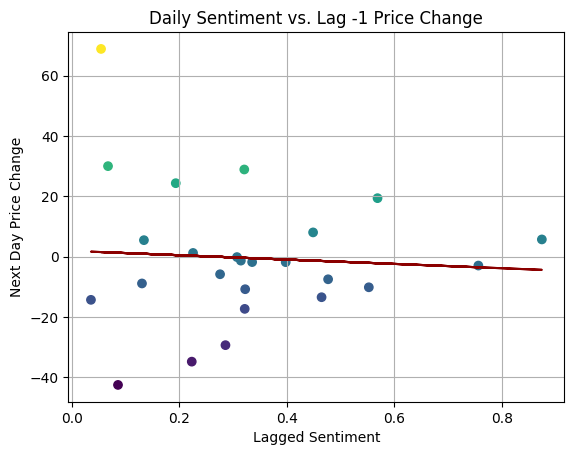

Correlation with -1 Day(s) lag: -0.07
Linear Model R-squared: 0.0
Linear Model RMSE: 22.33

Average Price Change on High Sentiment Days: -328 %
Average Price Change on Low Sentiment Days: 220 %


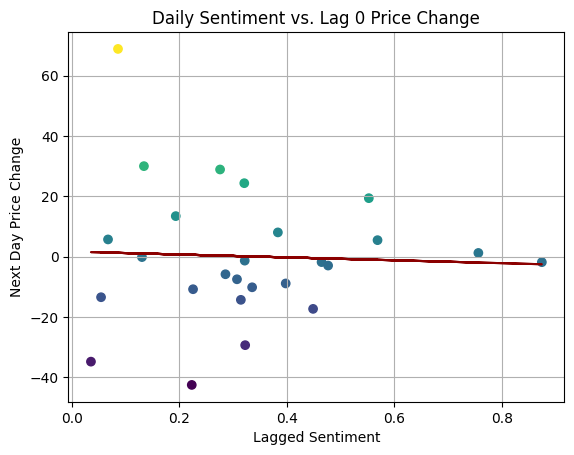

Correlation with 0 Day(s) lag: -0.04
Linear Model R-squared: 0.0
Linear Model RMSE: 22.08

Average Price Change on High Sentiment Days: -115 %
Average Price Change on Low Sentiment Days: 136 %


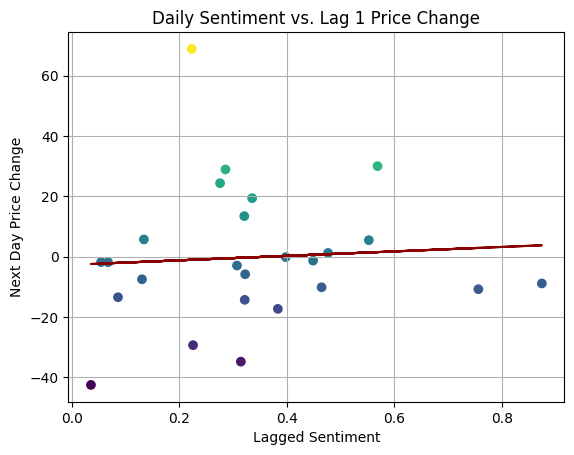

Correlation with 1 Day(s) lag: 0.07
Linear Model R-squared: 0.0
Linear Model RMSE: 22.43

Average Price Change on High Sentiment Days: -192 %
Average Price Change on Low Sentiment Days: 136 %


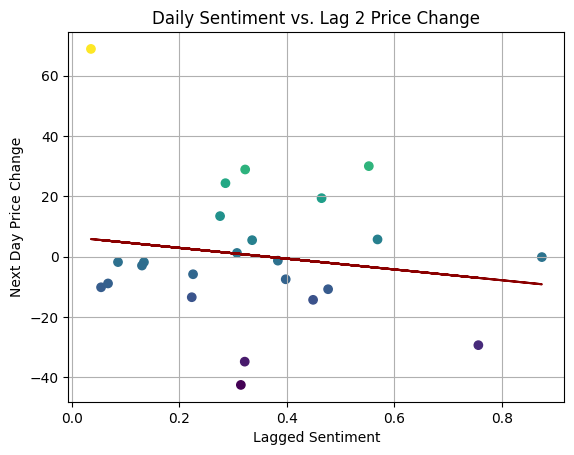

Correlation with 2 Day(s) lag: -0.16
Linear Model R-squared: 0.03
Linear Model RMSE: 22.36

Average Price Change on High Sentiment Days: -167 %
Average Price Change on Low Sentiment Days: 266 %


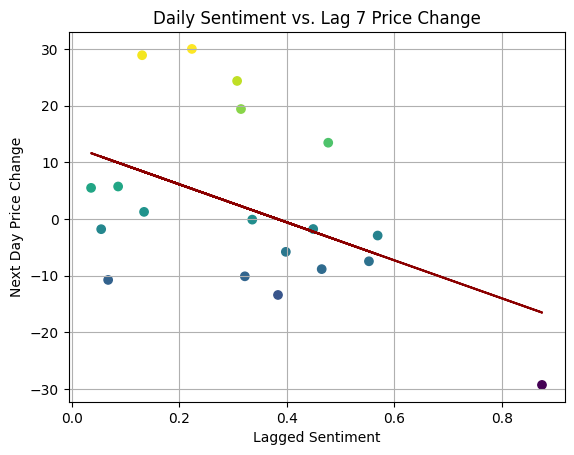

Correlation with 7 Day(s) lag: -0.47
Linear Model R-squared: 0.22
Linear Model RMSE: 13.32

Average Price Change on High Sentiment Days: -320 %
Average Price Change on Low Sentiment Days: 647 %


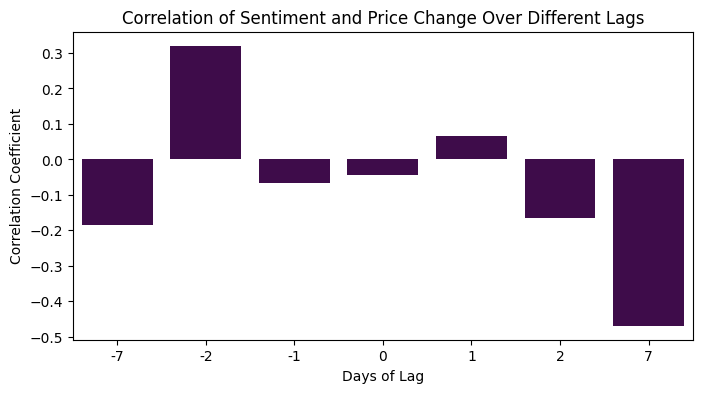

Average Prediction for lag 0: N/A
Average Prediction for lag 1: -3.47
Average Prediction for lag 2: -0.01
Average Prediction for lag 3: 0.34
Average Prediction for lag 4: -0.46
Average Prediction for lag 5: 1.22
Average Prediction for lag 6: N/A
Overall Average Prediction across all lags: -0.48


c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\visualizations.py:176: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future_sentiment = combined_data['average sentiment'].tail(predict_days).shift(lag).fillna(method='ffill')
c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


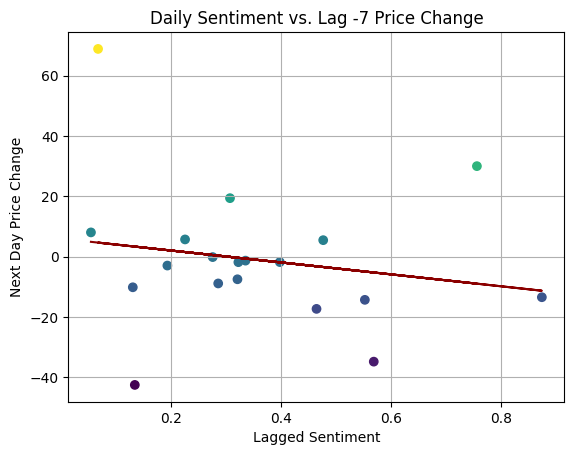

Correlation with -7 Day(s) lag: -0.18
Rf Model R-squared: 0.84
Rf Model RMSE: 9.26

Average Price Change on High Sentiment Days: -111 %
Average Price Change on Low Sentiment Days: -94 %


c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\visualizations.py:176: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future_sentiment = combined_data['average sentiment'].tail(predict_days).shift(lag).fillna(method='ffill')
c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


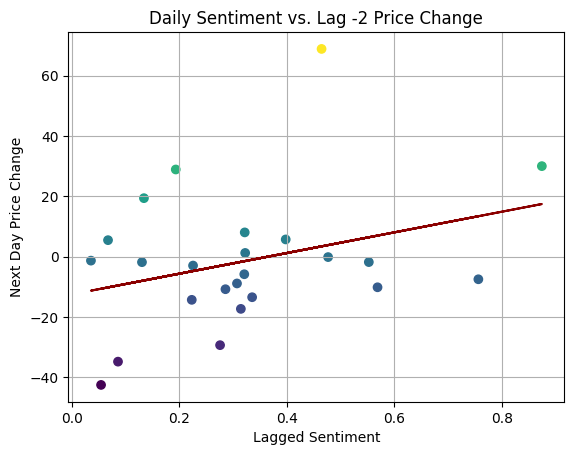

Correlation with -2 Day(s) lag: 0.32
Rf Model R-squared: 0.81
Rf Model RMSE: 9.65

Average Price Change on High Sentiment Days: -328 %
Average Price Change on Low Sentiment Days: 35 %


c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\visualizations.py:176: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future_sentiment = combined_data['average sentiment'].tail(predict_days).shift(lag).fillna(method='ffill')
c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


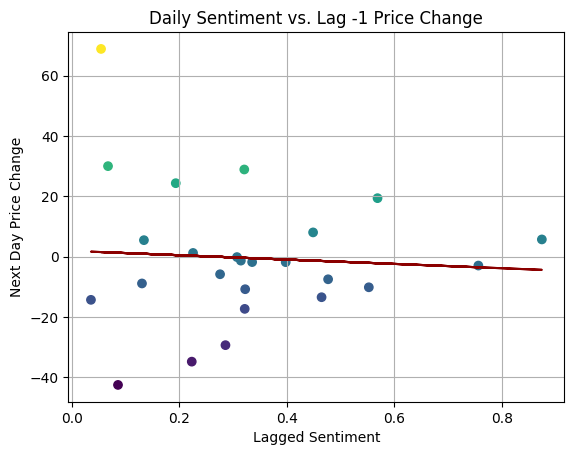

Correlation with -1 Day(s) lag: -0.07
Rf Model R-squared: 0.76
Rf Model RMSE: 10.93

Average Price Change on High Sentiment Days: -328 %
Average Price Change on Low Sentiment Days: 220 %


c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\visualizations.py:176: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future_sentiment = combined_data['average sentiment'].tail(predict_days).shift(lag).fillna(method='ffill')
c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


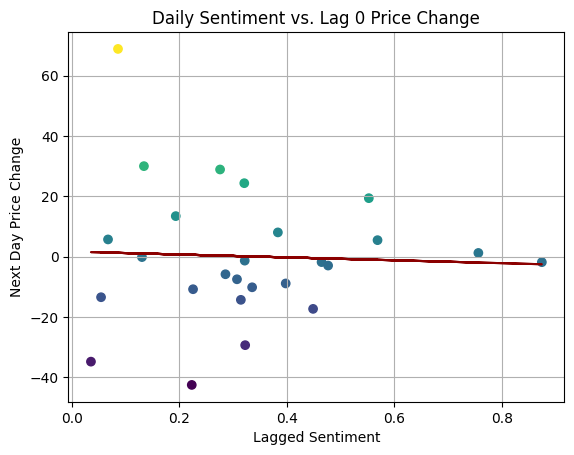

Correlation with 0 Day(s) lag: -0.04
Rf Model R-squared: 0.83
Rf Model RMSE: 9.15

Average Price Change on High Sentiment Days: -115 %
Average Price Change on Low Sentiment Days: 136 %


c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\visualizations.py:176: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future_sentiment = combined_data['average sentiment'].tail(predict_days).shift(lag).fillna(method='ffill')
c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


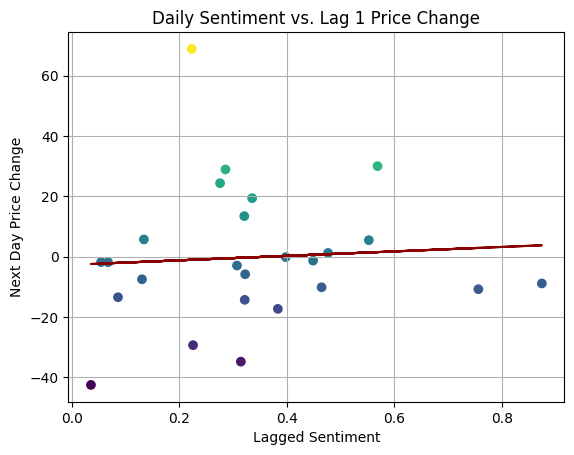

Correlation with 1 Day(s) lag: 0.07
Rf Model R-squared: 0.78
Rf Model RMSE: 10.46

Average Price Change on High Sentiment Days: -192 %
Average Price Change on Low Sentiment Days: 136 %


c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\visualizations.py:176: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future_sentiment = combined_data['average sentiment'].tail(predict_days).shift(lag).fillna(method='ffill')
c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


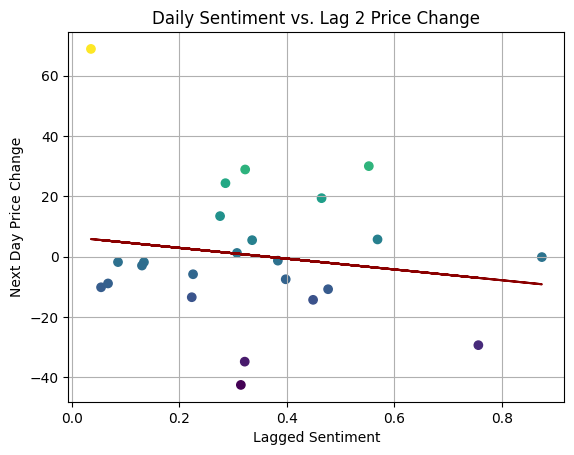

Correlation with 2 Day(s) lag: -0.16
Rf Model R-squared: 0.81
Rf Model RMSE: 9.94

Average Price Change on High Sentiment Days: -167 %
Average Price Change on Low Sentiment Days: 266 %


c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\visualizations.py:176: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future_sentiment = combined_data['average sentiment'].tail(predict_days).shift(lag).fillna(method='ffill')
c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


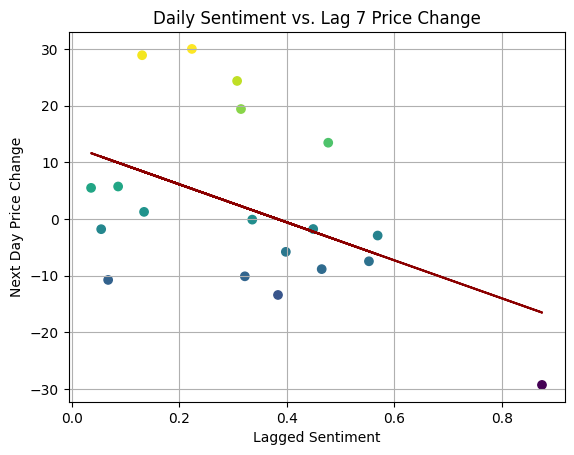

Correlation with 7 Day(s) lag: -0.47
Rf Model R-squared: 0.88
Rf Model RMSE: 5.31

Average Price Change on High Sentiment Days: -320 %
Average Price Change on Low Sentiment Days: 647 %


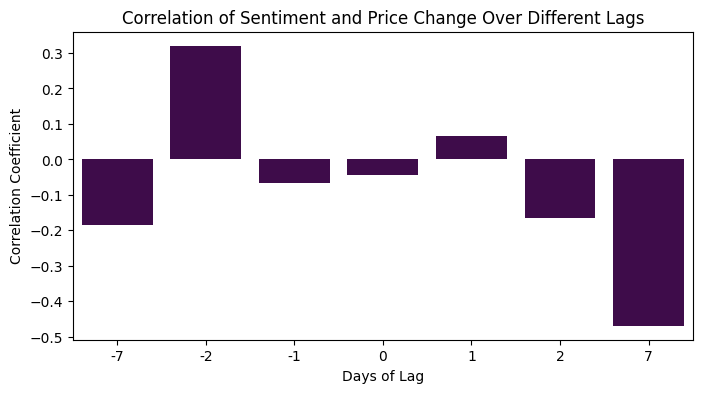

Average Prediction for lag 0: -2.4
Average Prediction for lag 1: 4.52
Average Prediction for lag 2: -0.58
Average Prediction for lag 3: 2.33
Average Prediction for lag 4: 8.18
Average Prediction for lag 5: 6.51
Average Prediction for lag 6: 1.83
Overall Average Prediction across all lags: 2.91


In [3]:
#for testing purposes
sentiment_data = pd.read_csv(f"data/2024-04-05_30d_news_with_sentiment.csv")
price_data = pd.read_csv('data/2024-04-05_30d_50meme_history.csv')

sentiment_data = vz.average_sentiment_per_time(from_date,sentiment_data)
price_data = vz.normalize_and_aggregate_prices(price_data)
plot = vz.plot_normalized_price_and_sentiment(price_data, sentiment_data)

# Get the closing price for each day (last price of the day)
price_data_daily = price_data['normalized price'].resample('D').last()

# Calculate the daily price change percentage
price_data_daily = pd.DataFrame(price_data_daily)  # Ensure it's a DataFrame for the next operations
price_data_daily['Price Change'] = price_data_daily['normalized price'].pct_change() * 100

# Shift the price change to align with the day's sentiment to measure its influence on the next day's price change
price_data_daily['Price Change'] = price_data_daily['Price Change'].shift(-1)

# Since sentiment is often recorded multiple times a day, we'll average it for daily granularity
sentiment_data_daily = pd.DataFrame(sentiment_data['average sentiment'].resample('D').mean())

# Merge the two datasets on the date index
combined_data = pd.concat([price_data_daily, sentiment_data_daily], axis=1)
combined_data.columns = ['Normalized Price', 'Next Day Price Change', 'average sentiment']
combined_data.dropna(inplace=True)  # Drop rows with NaN values that might result from resampling, shifting, or non-overlapping dates

# Perform Analysis
model_type = 'linear'  # or 'rf'
future_predictions_by_lag = vz.analysis(combined_data, from_date, model_type=model_type, for_web=False, predict_days=5)

# Collect all predictions from each lag
all_predictions = []

# Analyze every prediction of every lag and collect them
for idx, future_predictions in enumerate(future_predictions_by_lag):
    if not isinstance(future_predictions, (list, np.ndarray)):
        future_predictions = [future_predictions]

    # Filter out NaN values
    future_predictions = [pred for pred in future_predictions if not np.isnan(pred)]
    all_predictions.extend(future_predictions)

    avg_prediction = round(np.mean(future_predictions), 2) if future_predictions else 'N/A'
    print(f"Average Prediction for lag {idx}: {avg_prediction}")

# Filter out NaN values from all_predictions
all_predictions = [pred for pred in all_predictions if not np.isnan(pred)]

# Calculate the overall average prediction
overall_avg_prediction = round(np.mean(all_predictions), 2) if all_predictions else 'N/A'
print(f"Overall Average Prediction across all lags: {overall_avg_prediction}")

# Perform Analysis
model_type = 'rf'  # or 'rf'
future_predictions_by_lag = vz.analysis(combined_data, from_date, model_type=model_type, for_web=False, predict_days=5)

# Collect all predictions from each lag
all_predictions = []

# Analyze every prediction of every lag and collect them
for idx, future_predictions in enumerate(future_predictions_by_lag):
    if not isinstance(future_predictions, (list, np.ndarray)):
        future_predictions = [future_predictions]

    # Filter out NaN values
    future_predictions = [pred for pred in future_predictions if not np.isnan(pred)]
    all_predictions.extend(future_predictions)

    avg_prediction = round(np.mean(future_predictions), 2) if future_predictions else 'N/A'
    print(f"Average Prediction for lag {idx}: {avg_prediction}")

# Filter out NaN values from all_predictions
all_predictions = [pred for pred in all_predictions if not np.isnan(pred)]

# Calculate the overall average prediction
overall_avg_prediction = round(np.mean(all_predictions), 2) if all_predictions else 'N/A'
print(f"Overall Average Prediction across all lags: {overall_avg_prediction}")


# 1 day

In [2]:
from_date = 1

This code fetches daily news articles about cryptocurrency from multiple sources and processes the data to remove duplicates. It initializes the CryptoPanicAPI with an authentication token and fetches "hot" public news posts. The fetched data is formatted into a DataFrame. Next, it uses CryptoNewsAPI to gather news from specific sources like Coindesk and Cointelegraph, formatting and appending the data to a list. If the list is not empty, the data is concatenated into a single DataFrame. The code then fetches and formats additional news from USEconomyAPI and SeekingAlphaNewsAPI for the same date range. All gathered data is merged into a single DataFrame, and duplicates are processed to ensure uniqueness. The final DataFrame contains a comprehensive set of cryptocurrency news for the day, ready for further use or analysis.

In [2]:
auth_token = os.getenv('cryptopanic')  # Example token
crypto_panic_api = CryptoPanicAPI(auth_token)
filters = {
    'public': 'true',
    'filter': 'hot',
    'currencies': None
}
df = crypto_panic_api.format_news_data(crypto_panic_api.fetch_news(filters))

api_key = os.getenv('cryptonewsapi')
crypto_news_api = CryptoNewsAPI(api_key)
sources = ['coindesk', 'cointelegraph', 'bitcoinist', 'decrypt', 'bsc', 'theguardian']
all_news = []  # List to store data from each source
for source in sources:
    news_data = crypto_news_api.fetch_news(source) 
    if news_data:  # Ensure there is data before formatting
        formatted_data = crypto_news_api.format_news_data(news_data)
        if not formatted_data.empty:
            all_news.append(formatted_data)  # Append the formatted DataFrame to the list
# Concatenate all dataframes if all_news is not empty
if all_news:
    df_daily_news_2 = pd.concat(all_news)
    df = pd.concat([df,df_daily_news_2])

api = USEconomyAPI(os.getenv('useconomyapi'))
starting_date = hd.convert_to_unix_ms(hd.get_date_dt(from_date))
ending_date = hd.convert_to_unix_ms(hd.get_date_dt(0))
crypto_news_df_2 = api.fetch_news(category='economy', initial=starting_date, final=ending_date )
crypto_news_df_2 = api.format_news_data(crypto_news_df_2)

api_key = os.getenv('seeking_alpha')
seeking_alpha_api = SeekingAlphaNewsAPI(api_key)
crypto_news_df_3 = seeking_alpha_api.fetch_news_by_days(from_date, 'crypto')

Request sent to: https://cryptocurrency-news2.p.rapidapi.com/v1/coindesk
Received data: {'data': [{'url': 'https://www.coindesk.com/markets/2024/05/17/steven-cohens-point72-also-an-owner-of-bitcoin-via-spot-etfs/?utm_medium=referral&utm_source=rss&utm_campaign=headlines', 'title': "Steven Cohen's Point72 Also an Owner of Bitcoin Via Spot ETFs", 'description': 'Point72, the $34 billion hedge fund of billionaire and owner of the New York Mets, Steven Cohen, held $77.5 million of the Fidelity Wise Origin Bitcoin Fund (FBTC) as of the close of the first quarter, according to a filing.', 'thumbnail': 'https://www.coindesk.com/resizer/7eTMDkvsGzBM3tXRmpkK-ugFXrw=/800x600/cloudfront-us-east-1.images.arcpublishing.com/coindesk/P76V4C7KQZE2VEG3SQZCIQMIW4.jpg', 'createdAt': 'Fri, 17 May 2024 19:59:21 +0000'}, {'url': 'https://www.coindesk.com/opinion/2024/05/17/does-the-sab-121-vote-mean-anything-for-future-crypto-legislation/?utm_medium=referral&utm_source=rss&utm_campaign=headlines', 'title': 

In [3]:
# Merge the dataframes
df = pd.concat([df, crypto_news_df_2, crypto_news_df_3])
hd.process_duplicates(df)
df.head()

Duplicate Entries: 0


date                                           headline  \
0  2024-05-17 16:21:30   kraken may delist usdt in eu to comply with mica   
1  2024-05-17 02:21:00  $10,000 ethereum (eth) by year-end? analyst ma...   
2  2024-05-17 00:13:22  bitcoin price prediction: btc above $65k amid ...   
3  2024-05-16 22:15:00  solana trader turns $1,470 into $200,000 in fi...   
4  2024-05-16 20:27:00  xrp whales banking on massive bull run with bi...   

                                         description  
0   Kraken may delist USDT in EU to comply with MiCA  
1  $10,000 Ethereum (ETH) by Year-End? Analyst Ma...  
2  Bitcoin Price Prediction: BTC Above $65K Amid ...  
3  Solana Trader Turns $1,470 into $200,000 in Fi...  
4  XRP Whales Banking On Massive Bull Run With Bi...

In [4]:
# Initialize SentimentAnalyzer
analyzer = SentimentAnalyzer()
sentiment_data = analyzer.add_sentiments_to_df(df)
sentiment_data.head()

date                                           headline  \
0  2024-05-17 16:21:30   kraken may delist usdt in eu to comply with mica   
1  2024-05-17 02:21:00  $10,000 ethereum (eth) by year-end? analyst ma...   
2  2024-05-17 00:13:22  bitcoin price prediction: btc above $65k amid ...   
3  2024-05-16 22:15:00  solana trader turns $1,470 into $200,000 in fi...   
4  2024-05-16 20:27:00  xrp whales banking on massive bull run with bi...   

                                         description  sentiment  
0   Kraken may delist USDT in EU to comply with MiCA   0.026924  
1  $10,000 Ethereum (ETH) by Year-End? Analyst Ma...   0.169131  
2  Bitcoin Price Prediction: BTC Above $65K Amid ...   0.082457  
3  Solana Trader Turns $1,470 into $200,000 in Fi...   0.043199  
4  XRP Whales Banking On Massive Bull Run With Bi...   0.325375

In [6]:
#for testing purposes
time_period = '24h'
df.to_csv(f'data/{hd.get_date_str(0)}_{time_period}_news_with_sentiment.csv', index=False)

## BTC et ETH

In [ ]:
category = 'layer-1'
time_period = '24h'
api_key = os.getenv('coinranking') 
fetcher = CryptoDataFetcher(api_key, default_tags=category, default_limit=2, default_time_period=f"{time_period}")
price_data = fetcher.fetch_all_history()

#for testing purposes
if not price_data.empty:
    fetcher.write_to_csv(price_data, f'data/{hd.get_date_str(0)}_{time_period}_{fetcher.default_limit}{category}_history.csv')
else:
    print("No data fetched.")

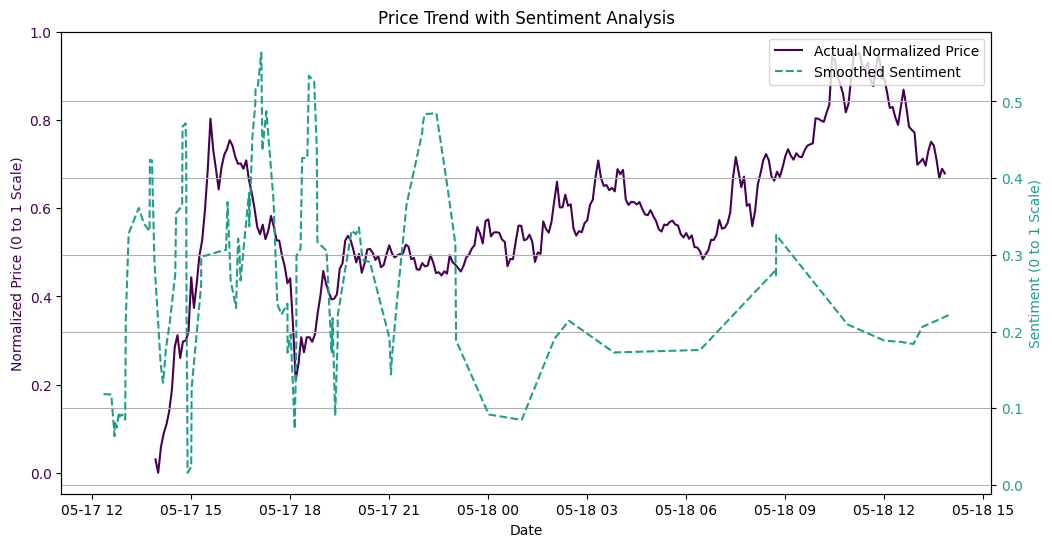

In [20]:
#for testing purposes
sentiment_data = pd.read_csv(f"data/2024-05-18_24h_news_with_sentiment.csv")
price_data = pd.read_csv('data/2024-05-18_24h_2layer-1_history.csv')

sentiment_data = vz.average_sentiment_per_time(from_date,sentiment_data)
price_data = vz.normalize_and_aggregate_prices(price_data)
plot = vz.plot_normalized_price_and_sentiment(price_data, sentiment_data)

In [ ]:
# Calculate percentage price change directly from normalized prices
# Adding a small number to avoid division by zero
price_data['price_change'] = price_data['normalized price'].pct_change().fillna(0) * 100
price_data['price_change'] = price_data['price_change'].replace([np.inf, -np.inf], np.nan).fillna(0)

# Resample price data to 5-minute intervals, forward filling the last known prices and changes
price_data_resampled = price_data.resample('5min').last().ffill()
# Round sentiment data timestamps to the nearest 5 minutes
sentiment_data.index = sentiment_data.index.round('5min')

# Merge using merge_asof to align sentiment data with the nearest price data
combined_data = pd.merge_asof(sentiment_data.sort_index(), price_data_resampled.reset_index(), 
                              left_index=True, right_on='timestamp', direction='forward')

# Since we need the next period's price change, shift the 'price_change' column by -1
combined_data['Next 5min Price Change'] = combined_data['price_change'].shift(-1)

# Rename columns to match function expectations
combined_data.rename(columns={'Average Sentiment': 'Average Sentiment'}, inplace=True)

# Drop the 'timestamp' and original 'price_change' columns if not needed
combined_data.drop(columns=['timestamp', 'price_change'], inplace=True)

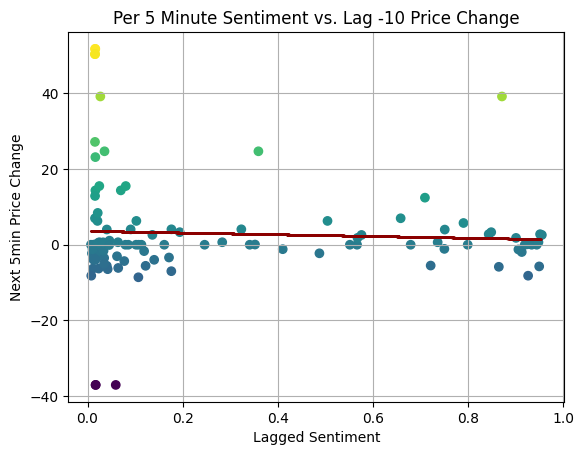

Correlation with -10 5min(s) lag: -0.05
Linear Model R-squared: 0.0
Linear Model RMSE: 14.13

Average Price Change on High Sentiment 5mins: 240 %
Average Price Change on Low Sentiment 5mins: 338 %


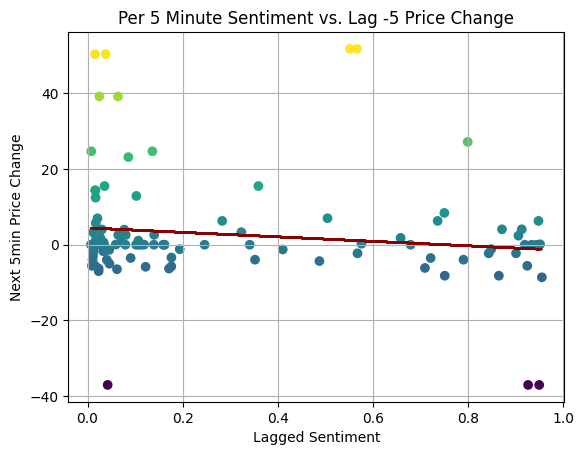

Correlation with -5 5min(s) lag: -0.14
Linear Model R-squared: 0.02
Linear Model RMSE: 13.7

Average Price Change on High Sentiment 5mins: 242 %
Average Price Change on Low Sentiment 5mins: 323 %


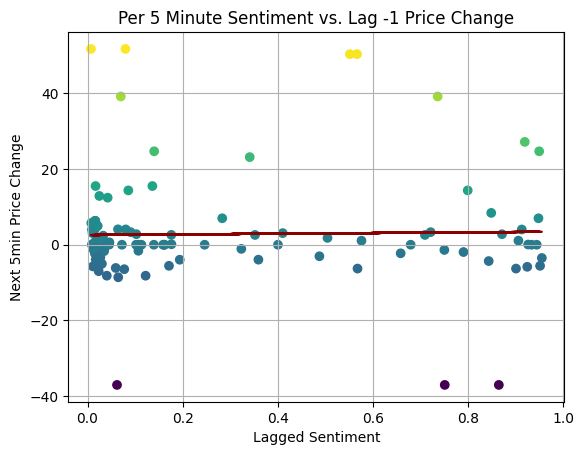

Correlation with -1 5min(s) lag: 0.02
Linear Model R-squared: 0.0
Linear Model RMSE: 13.67

Average Price Change on High Sentiment 5mins: 243 %
Average Price Change on Low Sentiment 5mins: 316 %


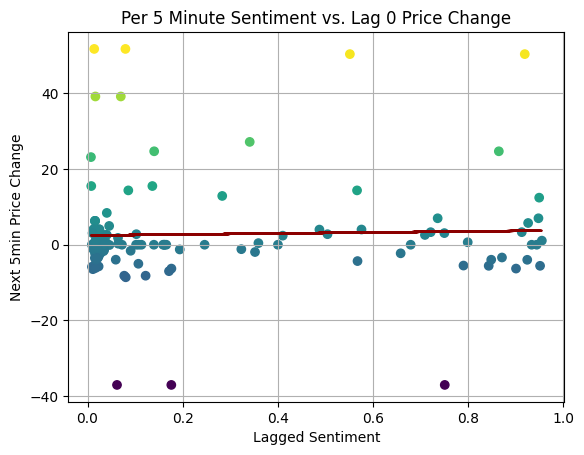

Correlation with 0 5min(s) lag: 0.03
Linear Model R-squared: 0.0
Linear Model RMSE: 13.66

Average Price Change on High Sentiment 5mins: 243 %
Average Price Change on Low Sentiment 5mins: 316 %


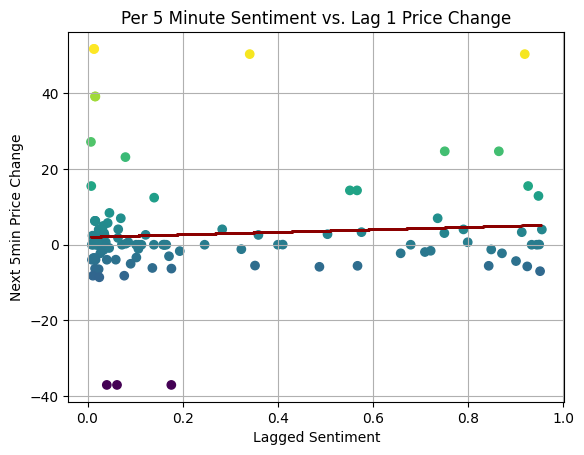

Correlation with 1 5min(s) lag: 0.08
Linear Model R-squared: 0.01
Linear Model RMSE: 13.68

Average Price Change on High Sentiment 5mins: 248 %
Average Price Change on Low Sentiment 5mins: 316 %


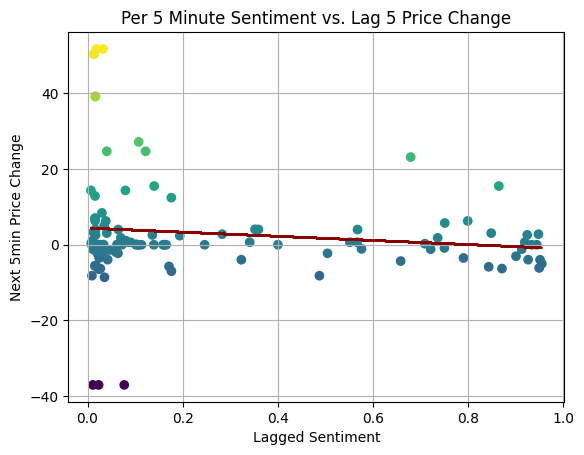

Correlation with 5 5min(s) lag: -0.13
Linear Model R-squared: 0.02
Linear Model RMSE: 13.84

Average Price Change on High Sentiment 5mins: 272 %
Average Price Change on Low Sentiment 5mins: 312 %


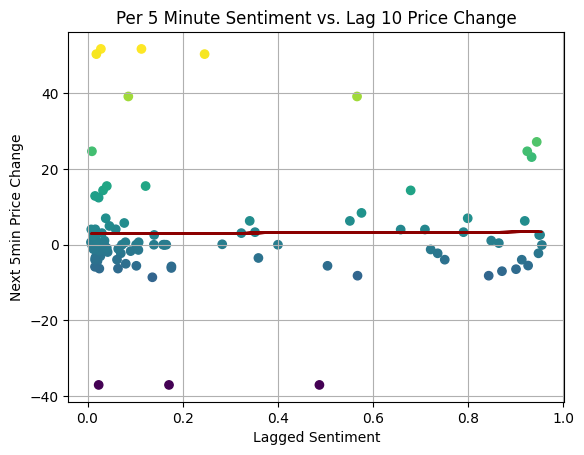

Correlation with 10 5min(s) lag: 0.01
Linear Model R-squared: 0.0
Linear Model RMSE: 14.27

Average Price Change on High Sentiment 5mins: 266 %
Average Price Change on Low Sentiment 5mins: 346 %


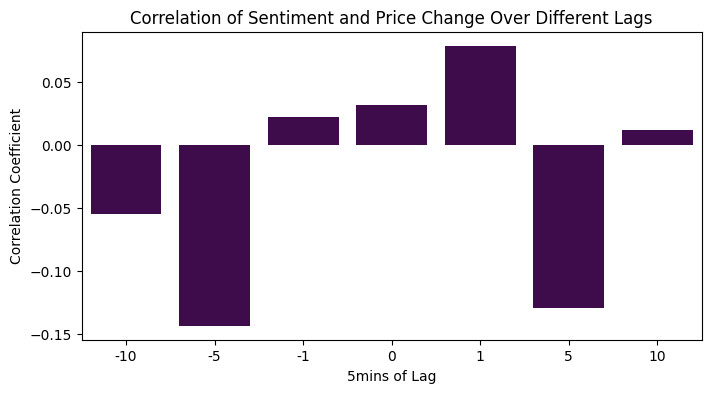

Average Prediction for lag 0: N/A
Average Prediction for lag 1: N/A
Average Prediction for lag 2: 2.79
Average Prediction for lag 3: 2.74
Average Prediction for lag 4: 2.76
Average Prediction for lag 5: N/A
Average Prediction for lag 6: N/A
Overall Average Prediction across all lags: 2.77


c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\visualizations.py:176: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future_sentiment = combined_data['average sentiment'].tail(predict_days).shift(lag).fillna(method='ffill')
c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


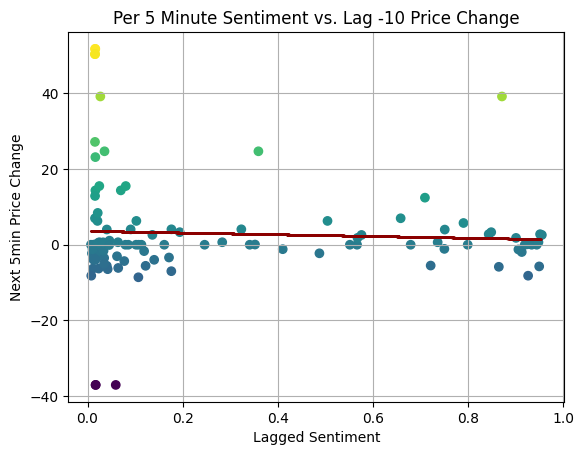

Correlation with -10 5min(s) lag: -0.05
Rf Model R-squared: 0.89
Rf Model RMSE: 4.8

Average Price Change on High Sentiment 5mins: 240 %
Average Price Change on Low Sentiment 5mins: 338 %


c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\visualizations.py:176: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future_sentiment = combined_data['average sentiment'].tail(predict_days).shift(lag).fillna(method='ffill')
c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


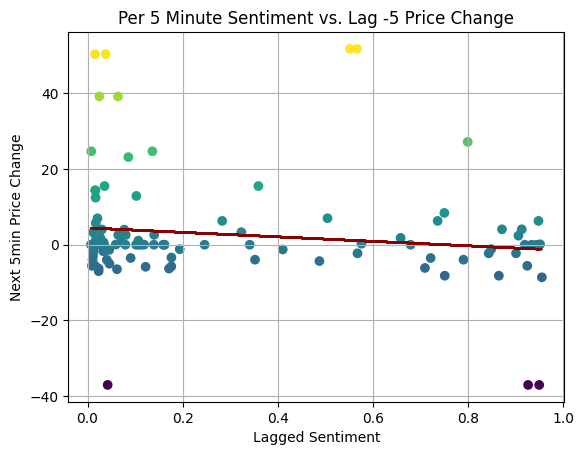

Correlation with -5 5min(s) lag: -0.14
Rf Model R-squared: 0.81
Rf Model RMSE: 5.98

Average Price Change on High Sentiment 5mins: 242 %
Average Price Change on Low Sentiment 5mins: 323 %


c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\visualizations.py:176: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future_sentiment = combined_data['average sentiment'].tail(predict_days).shift(lag).fillna(method='ffill')
c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


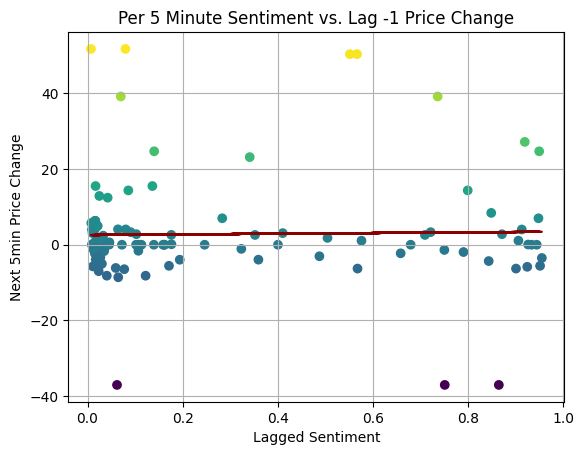

Correlation with -1 5min(s) lag: 0.02
Rf Model R-squared: 0.8
Rf Model RMSE: 6.06

Average Price Change on High Sentiment 5mins: 243 %
Average Price Change on Low Sentiment 5mins: 316 %


c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\visualizations.py:176: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future_sentiment = combined_data['average sentiment'].tail(predict_days).shift(lag).fillna(method='ffill')
c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


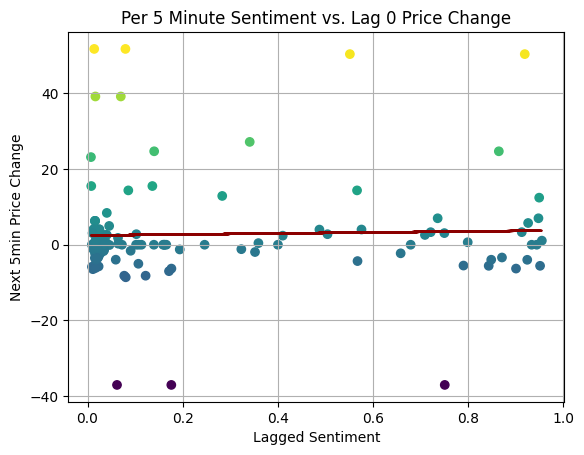

Correlation with 0 5min(s) lag: 0.03
Rf Model R-squared: 0.79
Rf Model RMSE: 6.2

Average Price Change on High Sentiment 5mins: 243 %
Average Price Change on Low Sentiment 5mins: 316 %


c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\visualizations.py:176: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future_sentiment = combined_data['average sentiment'].tail(predict_days).shift(lag).fillna(method='ffill')
c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


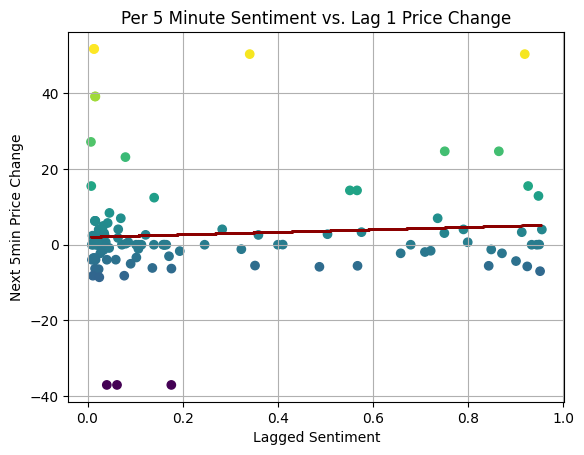

Correlation with 1 5min(s) lag: 0.08
Rf Model R-squared: 0.84
Rf Model RMSE: 5.52

Average Price Change on High Sentiment 5mins: 248 %
Average Price Change on Low Sentiment 5mins: 316 %


c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\visualizations.py:176: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future_sentiment = combined_data['average sentiment'].tail(predict_days).shift(lag).fillna(method='ffill')
c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


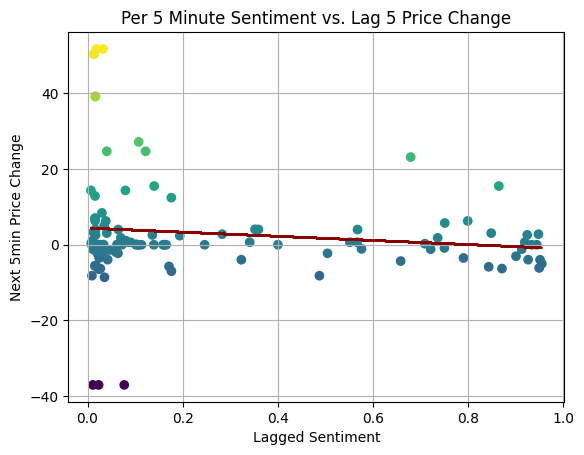

Correlation with 5 5min(s) lag: -0.13
Rf Model R-squared: 0.86
Rf Model RMSE: 5.3

Average Price Change on High Sentiment 5mins: 272 %
Average Price Change on Low Sentiment 5mins: 312 %


c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\visualizations.py:176: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future_sentiment = combined_data['average sentiment'].tail(predict_days).shift(lag).fillna(method='ffill')
c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


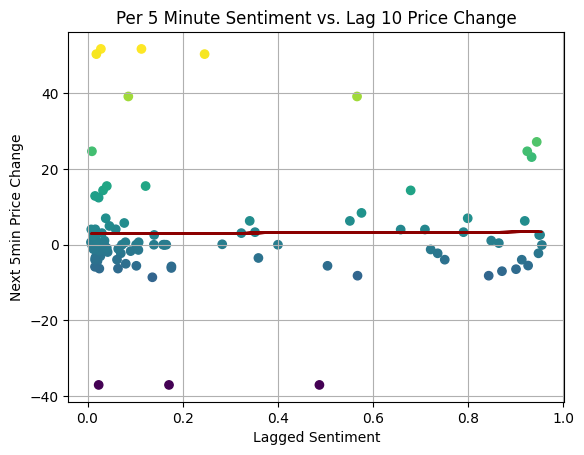

Correlation with 10 5min(s) lag: 0.01
Rf Model R-squared: 0.8
Rf Model RMSE: 6.34

Average Price Change on High Sentiment 5mins: 266 %
Average Price Change on Low Sentiment 5mins: 346 %


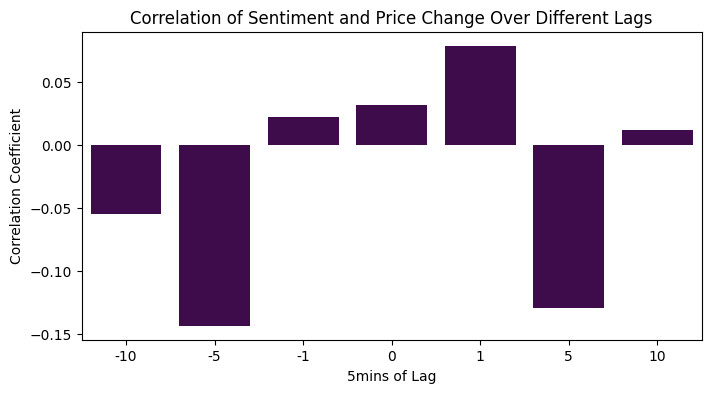

Average Prediction for lag 0: 0.66
Average Prediction for lag 1: 0.83
Average Prediction for lag 2: -1.3
Average Prediction for lag 3: 1.58
Average Prediction for lag 4: 6.13
Average Prediction for lag 5: 0.49
Average Prediction for lag 6: 0.13
Overall Average Prediction across all lags: 1.22


In [24]:
# Perform Analysis
model_type = 'linear'  # or 'rf'
future_predictions_by_lag = vz.analysis(combined_data, from_date, model_type=model_type, for_web=False, predict_days=5)

# Collect all predictions from each lag
all_predictions = []

# Analyze every prediction of every lag and collect them
for idx, future_predictions in enumerate(future_predictions_by_lag):
    if not isinstance(future_predictions, (list, np.ndarray)):
        future_predictions = [future_predictions]

    # Filter out NaN values
    future_predictions = [pred for pred in future_predictions if not np.isnan(pred)]
    all_predictions.extend(future_predictions)

    avg_prediction = round(np.mean(future_predictions), 2) if future_predictions else 'N/A'
    print(f"Average Prediction for lag {idx}: {avg_prediction}")

# Filter out NaN values from all_predictions
all_predictions = [pred for pred in all_predictions if not np.isnan(pred)]

# Calculate the overall average prediction
overall_avg_prediction = round(np.mean(all_predictions), 2) if all_predictions else 'N/A'
print(f"Overall Average Prediction across all lags: {overall_avg_prediction}")

# Perform Analysis
model_type = 'rf'  # or 'rf'
future_predictions_by_lag = vz.analysis(combined_data, from_date, model_type=model_type, for_web=False, predict_days=5)

# Collect all predictions from each lag
all_predictions = []

# Analyze every prediction of every lag and collect them
for idx, future_predictions in enumerate(future_predictions_by_lag):
    if not isinstance(future_predictions, (list, np.ndarray)):
        future_predictions = [future_predictions]

    # Filter out NaN values
    future_predictions = [pred for pred in future_predictions if not np.isnan(pred)]
    all_predictions.extend(future_predictions)

    avg_prediction = round(np.mean(future_predictions), 2) if future_predictions else 'N/A'
    print(f"Average Prediction for lag {idx}: {avg_prediction}")

# Filter out NaN values from all_predictions
all_predictions = [pred for pred in all_predictions if not np.isnan(pred)]

# Calculate the overall average prediction
overall_avg_prediction = round(np.mean(all_predictions), 2) if all_predictions else 'N/A'
print(f"Overall Average Prediction across all lags: {overall_avg_prediction}")


## Layer 1

In [ ]:
category = 'layer-1'
time_period = '24h'
fetcher = CryptoDataFetcher(api_key, default_tags=category, default_limit=2, default_time_period=f"{time_period}")
price_data = fetcher.fetch_all_history()

#for testing purposes
if not price_data.empty:
    fetcher.write_to_csv(price_data, f'data/{hd.get_date_str(0)}_{time_period}_{fetcher.default_limit}{category}_history.csv')
else:
    print("No data fetched.")


sentiment_data = vz.average_sentiment_per_time(from_date,sentiment_data)
price_data = vz.normalize_and_aggregate_prices(price_data)
plot = vz.plot_normalized_price_and_sentiment(price_data, sentiment_data)

# Calculate percentage price change directly from normalized prices
price_data['price_change'] = price_data['normalized price'].pct_change() * 100
price_data['price_change'] = price_data['price_change'].replace([np.inf, -np.inf], np.nan).fillna(0)

# Resample price data to 5-minute intervals, forward filling the last known prices and changes
price_data_resampled = price_data.resample('5min').last().ffill()

# Round sentiment data timestamps to the nearest 5 minutes
sentiment_data.index = sentiment_data.index.round('5min')

# Merge using merge_asof to align sentiment data with the nearest price data
combined_data = pd.merge_asof(sentiment_data.sort_index(), price_data_resampled.reset_index(), 
                              left_index=True, right_on='timestamp', direction='forward')

# Since we need the next period's price change, shift the 'price_change' column by -1
combined_data['Next 5min Price Change'] = combined_data['price_change'].shift(-1)

# Rename columns to match function expectations
combined_data.rename(columns={'Average Sentiment': 'Average Sentiment'}, inplace=True)

# Drop the 'timestamp' and original 'price_change' columns if not needed
combined_data.drop(columns=['timestamp', 'price_change'], inplace=True)

# Perform Analysis
model_type = 'linear'  # or 'rf'
future_predictions_by_lag = vz.analysis(combined_data, from_date, model_type=model_type, for_web=False, predict_days=5)

# Collect all predictions from each lag
all_predictions = []

# Analyze every prediction of every lag and collect them
for idx, future_predictions in enumerate(future_predictions_by_lag):
    if not isinstance(future_predictions, (list, np.ndarray)):
        future_predictions = [future_predictions]

    # Filter out NaN values
    future_predictions = [pred for pred in future_predictions if not np.isnan(pred)]
    all_predictions.extend(future_predictions)

    avg_prediction = round(np.mean(future_predictions), 2) if future_predictions else 'N/A'
    print(f"Average Prediction for lag {idx}: {avg_prediction}")

# Filter out NaN values from all_predictions
all_predictions = [pred for pred in all_predictions if not np.isnan(pred)]

# Calculate the overall average prediction
overall_avg_prediction = round(np.mean(all_predictions), 2) if all_predictions else 'N/A'
print(f"Overall Average Prediction across all lags: {overall_avg_prediction}")

# Perform Analysis
model_type = 'rf'  # or 'rf'
future_predictions_by_lag = vz.analysis(combined_data, from_date, model_type=model_type, for_web=False, predict_days=5)

# Collect all predictions from each lag
all_predictions = []

# Analyze every prediction of every lag and collect them
for idx, future_predictions in enumerate(future_predictions_by_lag):
    if not isinstance(future_predictions, (list, np.ndarray)):
        future_predictions = [future_predictions]

    # Filter out NaN values
    future_predictions = [pred for pred in future_predictions if not np.isnan(pred)]
    all_predictions.extend(future_predictions)

    avg_prediction = round(np.mean(future_predictions), 2) if future_predictions else 'N/A'
    print(f"Average Prediction for lag {idx}: {avg_prediction}")

# Filter out NaN values from all_predictions
all_predictions = [pred for pred in all_predictions if not np.isnan(pred)]

# Calculate the overall average prediction
overall_avg_prediction = round(np.mean(all_predictions), 2) if all_predictions else 'N/A'
print(f"Overall Average Prediction across all lags: {overall_avg_prediction}")

## Meme 

Fetching historical data for Dogecoin with UUID a91GCGd_u96cF...
Fetching historical data for Shiba Inu with UUID xz24e0BjL...
Fetching historical data for PEPE with UUID 03WI8NQPF...
Fetching historical data for dogwifhat with UUID sZUrmToWF...
Fetching historical data for FLOKI with UUID fmHk13Rqw...
Fetching historical data for Baby Doge Coin with UUID JY1_q2c0g...
Fetching historical data for Bonk with UUID jCd_nuYCH...
Fetching historical data for BOOK OF MEME with UUID JB0Z6eCf-...
Fetching historical data for POPCAT with UUID sLBuDEsp6...
Fetching historical data for cat in a dogs world with UUID -NmA23uWh...
Fetching historical data for jeo boden with UUID MUx6Xtayl...
Fetching historical data for Mog Coin with UUID ogeeFxUH0...
Fetching historical data for DEGEN with UUID ve9BsDd44...
Fetching historical data for Dogelon Mars with UUID Ac13iS3os...
Fetching historical data for Myro with UUID jvSn3kD3d...
Fetching historical data for Ponke with UUID lUxx6OnQ2...
Fetching histor

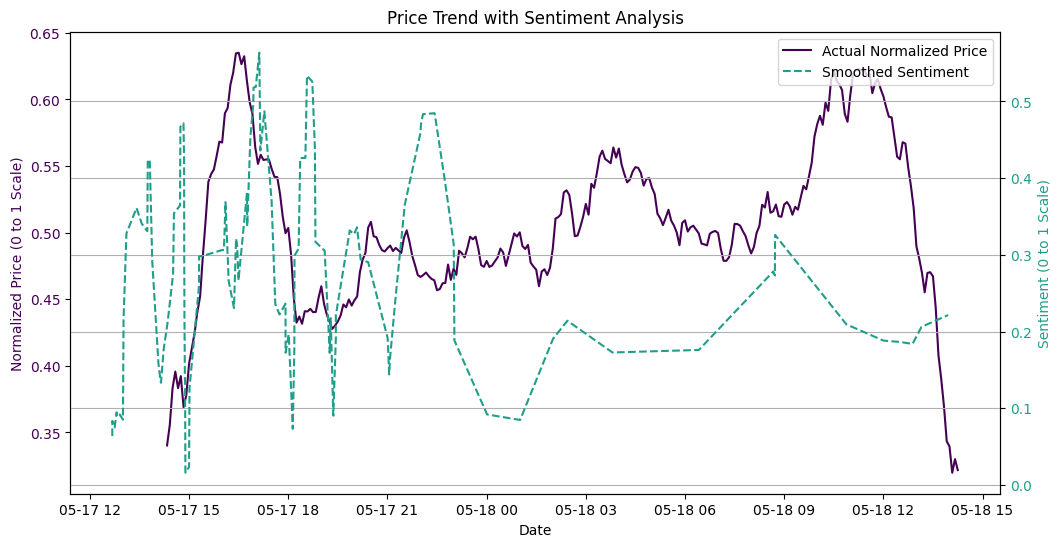

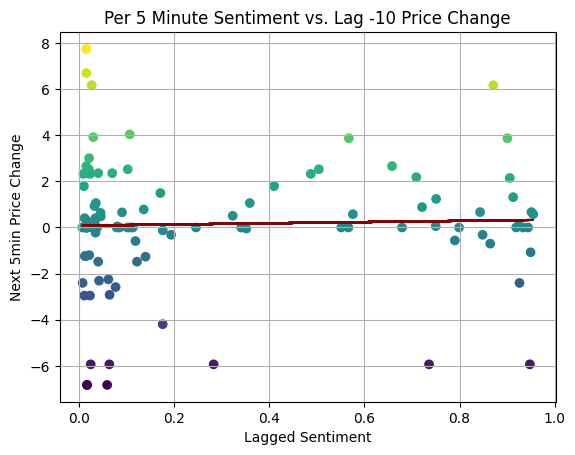

Correlation with -10 5min(s) lag: 0.03
Linear Model R-squared: 0.0
Linear Model RMSE: 2.76

Average Price Change on High Sentiment 5mins: 22 %
Average Price Change on Low Sentiment 5mins: 9 %


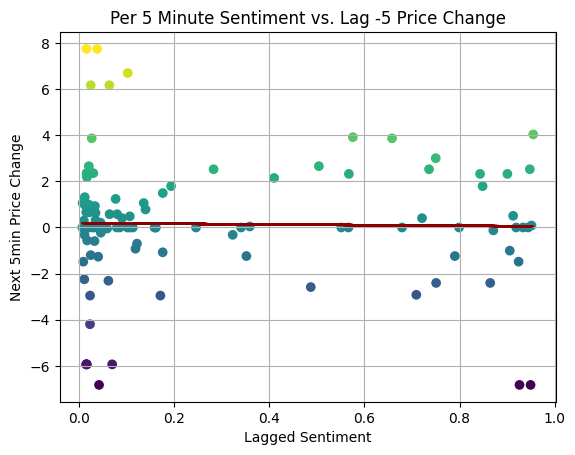

Correlation with -5 5min(s) lag: -0.02
Linear Model R-squared: 0.0
Linear Model RMSE: 2.7

Average Price Change on High Sentiment 5mins: 21 %
Average Price Change on Low Sentiment 5mins: 9 %


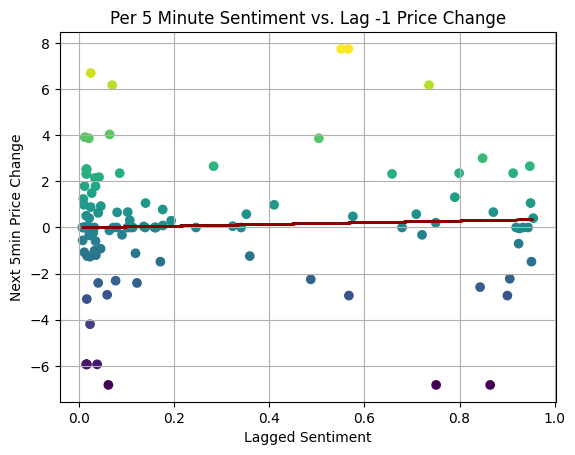

Correlation with -1 5min(s) lag: 0.05
Linear Model R-squared: 0.0
Linear Model RMSE: 2.68

Average Price Change on High Sentiment 5mins: 25 %
Average Price Change on Low Sentiment 5mins: -8 %


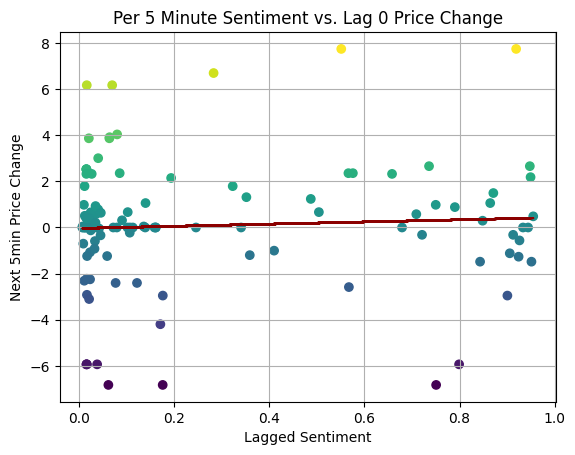

Correlation with 0 5min(s) lag: 0.06
Linear Model R-squared: 0.0
Linear Model RMSE: 2.68

Average Price Change on High Sentiment 5mins: 25 %
Average Price Change on Low Sentiment 5mins: -8 %


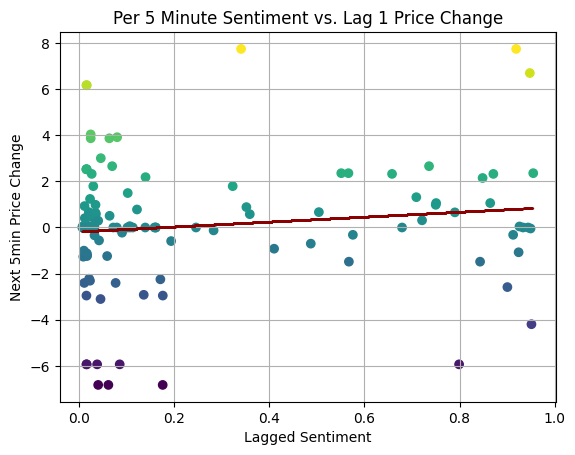

Correlation with 1 5min(s) lag: 0.13
Linear Model R-squared: 0.02
Linear Model RMSE: 2.67

Average Price Change on High Sentiment 5mins: 25 %
Average Price Change on Low Sentiment 5mins: -8 %


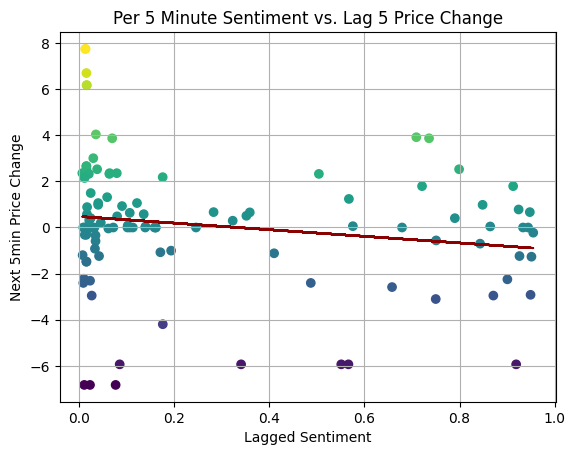

Correlation with 5 5min(s) lag: -0.17
Linear Model R-squared: 0.03
Linear Model RMSE: 2.7

Average Price Change on High Sentiment 5mins: 19 %
Average Price Change on Low Sentiment 5mins: -1 %


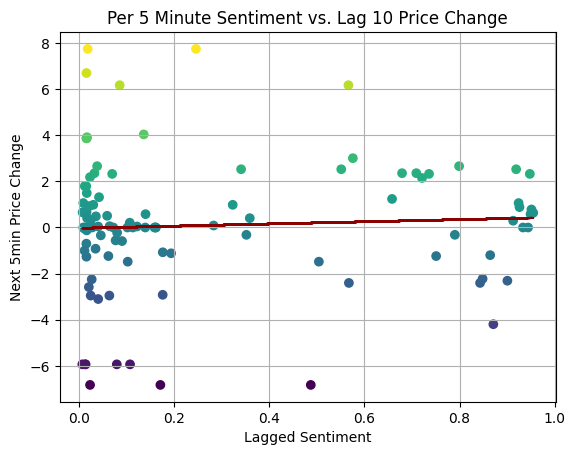

Correlation with 10 5min(s) lag: 0.06
Linear Model R-squared: 0.0
Linear Model RMSE: 2.8

Average Price Change on High Sentiment 5mins: 20 %
Average Price Change on Low Sentiment 5mins: -1 %


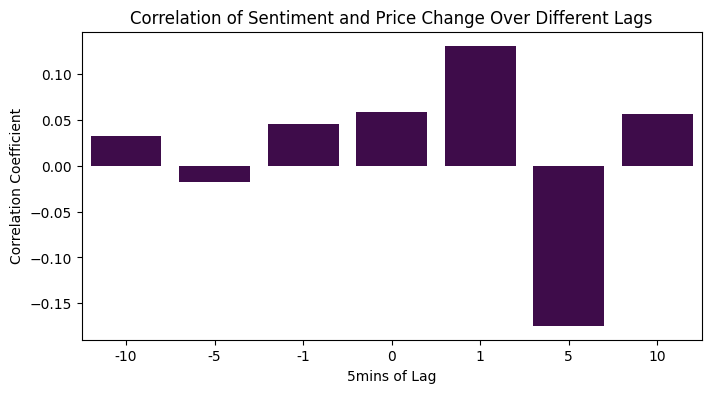

Average Prediction for lag 0: N/A
Average Prediction for lag 1: N/A
Average Prediction for lag 2: 0.08
Average Prediction for lag 3: 0.06
Average Prediction for lag 4: 0.07
Average Prediction for lag 5: N/A
Average Prediction for lag 6: N/A
Overall Average Prediction across all lags: 0.07


c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\visualizations.py:176: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future_sentiment = combined_data['average sentiment'].tail(predict_days).shift(lag).fillna(method='ffill')
c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


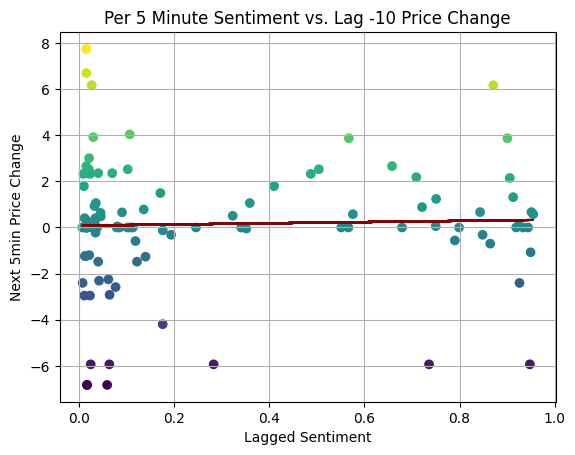

Correlation with -10 5min(s) lag: 0.03
Rf Model R-squared: 0.84
Rf Model RMSE: 1.1

Average Price Change on High Sentiment 5mins: 22 %
Average Price Change on Low Sentiment 5mins: 9 %


c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\visualizations.py:176: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future_sentiment = combined_data['average sentiment'].tail(predict_days).shift(lag).fillna(method='ffill')
c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


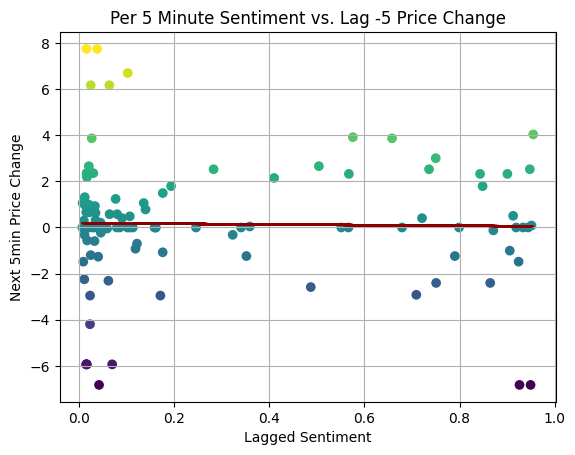

Correlation with -5 5min(s) lag: -0.02
Rf Model R-squared: 0.8
Rf Model RMSE: 1.2

Average Price Change on High Sentiment 5mins: 21 %
Average Price Change on Low Sentiment 5mins: 9 %


c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\visualizations.py:176: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future_sentiment = combined_data['average sentiment'].tail(predict_days).shift(lag).fillna(method='ffill')
c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


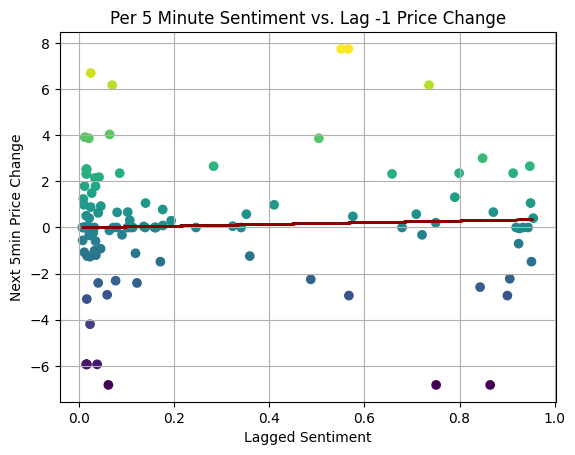

Correlation with -1 5min(s) lag: 0.05
Rf Model R-squared: 0.8
Rf Model RMSE: 1.2

Average Price Change on High Sentiment 5mins: 25 %
Average Price Change on Low Sentiment 5mins: -8 %


c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\visualizations.py:176: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future_sentiment = combined_data['average sentiment'].tail(predict_days).shift(lag).fillna(method='ffill')
c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


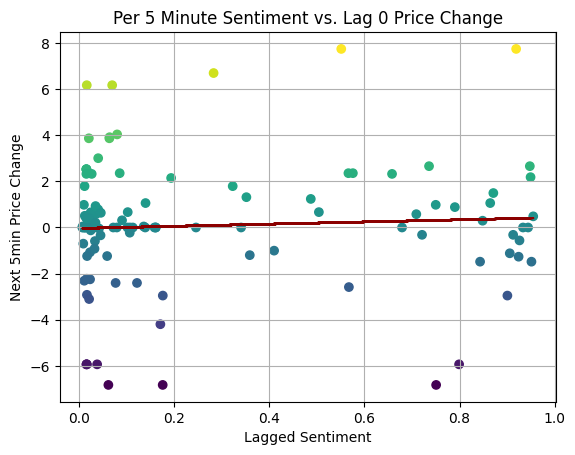

Correlation with 0 5min(s) lag: 0.06
Rf Model R-squared: 0.81
Rf Model RMSE: 1.17

Average Price Change on High Sentiment 5mins: 25 %
Average Price Change on Low Sentiment 5mins: -8 %


c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\visualizations.py:176: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future_sentiment = combined_data['average sentiment'].tail(predict_days).shift(lag).fillna(method='ffill')
c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


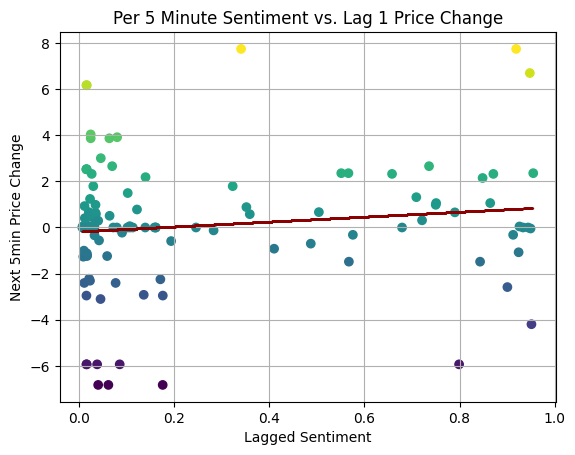

Correlation with 1 5min(s) lag: 0.13
Rf Model R-squared: 0.82
Rf Model RMSE: 1.14

Average Price Change on High Sentiment 5mins: 25 %
Average Price Change on Low Sentiment 5mins: -8 %


c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\visualizations.py:176: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future_sentiment = combined_data['average sentiment'].tail(predict_days).shift(lag).fillna(method='ffill')
c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


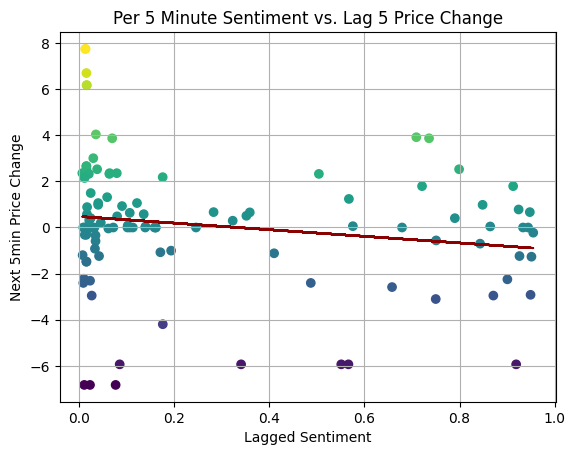

Correlation with 5 5min(s) lag: -0.17
Rf Model R-squared: 0.84
Rf Model RMSE: 1.09

Average Price Change on High Sentiment 5mins: 19 %
Average Price Change on Low Sentiment 5mins: -1 %


c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\visualizations.py:176: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future_sentiment = combined_data['average sentiment'].tail(predict_days).shift(lag).fillna(method='ffill')
c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


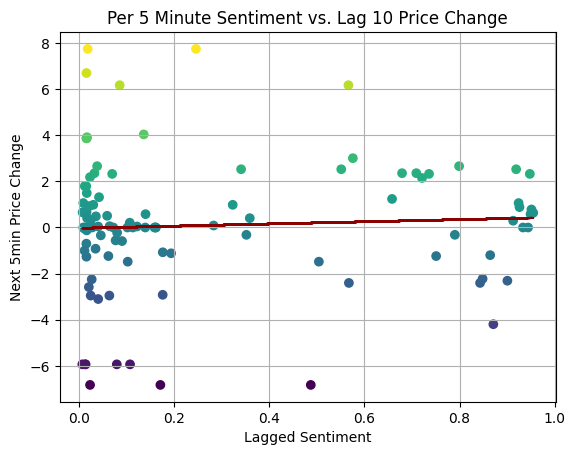

Correlation with 10 5min(s) lag: 0.06
Rf Model R-squared: 0.83
Rf Model RMSE: 1.16

Average Price Change on High Sentiment 5mins: 20 %
Average Price Change on Low Sentiment 5mins: -1 %


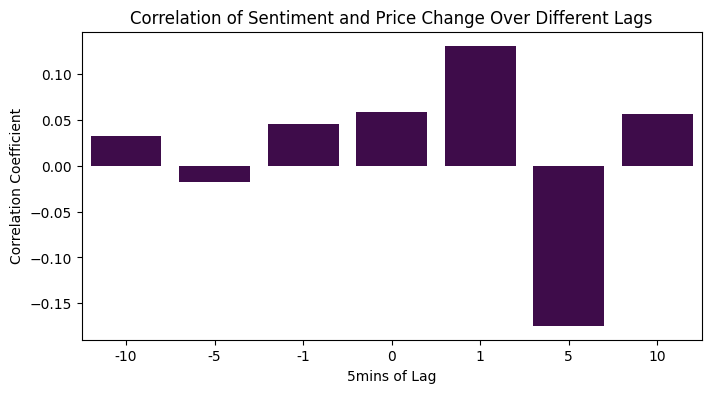

Average Prediction for lag 0: 0.14
Average Prediction for lag 1: 0.16
Average Prediction for lag 2: -1.28
Average Prediction for lag 3: -1.02
Average Prediction for lag 4: -0.61
Average Prediction for lag 5: 0.12
Average Prediction for lag 6: 0.09
Overall Average Prediction across all lags: -0.34


In [26]:
category = 'meme'
time_period = '24h'
fetcher = CryptoDataFetcher(api_key, default_tags=category, default_limit=50, default_time_period=f"{time_period}")
price_data = fetcher.fetch_all_history()

#for testing purposes
if not price_data.empty:
    fetcher.write_to_csv(price_data, f'data/{hd.get_date_str(0)}_{time_period}_{fetcher.default_limit}{category}_history.csv')
else:
    print("No data fetched.")

sentiment_data = pd.read_csv(f"data/2024-05-18_24h_news_with_sentiment.csv")

sentiment_data = vz.average_sentiment_per_time(from_date,sentiment_data)
price_data = vz.normalize_and_aggregate_prices(price_data)
plot = vz.plot_normalized_price_and_sentiment(price_data, sentiment_data)

# Calculate percentage price change directly from normalized prices
price_data['price_change'] = price_data['normalized price'].pct_change() * 100
price_data['price_change'] = price_data['price_change'].replace([np.inf, -np.inf], np.nan).fillna(0)

# Resample price data to 5-minute intervals, forward filling the last known prices and changes
price_data_resampled = price_data.resample('5min').last().ffill()

# Round sentiment data timestamps to the nearest 5 minutes
sentiment_data.index = sentiment_data.index.round('5min')

# Merge using merge_asof to align sentiment data with the nearest price data
combined_data = pd.merge_asof(sentiment_data.sort_index(), price_data_resampled.reset_index(), 
                              left_index=True, right_on='timestamp', direction='forward')

# Since we need the next period's price change, shift the 'price_change' column by -1
combined_data['Next 5min Price Change'] = combined_data['price_change'].shift(-1)

# Rename columns to match function expectations
combined_data.rename(columns={'Average Sentiment': 'Average Sentiment'}, inplace=True)

# Drop the 'timestamp' and original 'price_change' columns if not needed
combined_data.drop(columns=['timestamp', 'price_change'], inplace=True)

# Perform Analysis
model_type = 'linear'  # or 'rf'
future_predictions_by_lag = vz.analysis(combined_data, from_date, model_type=model_type, for_web=False, predict_days=5)

# Collect all predictions from each lag
all_predictions = []

# Analyze every prediction of every lag and collect them
for idx, future_predictions in enumerate(future_predictions_by_lag):
    if not isinstance(future_predictions, (list, np.ndarray)):
        future_predictions = [future_predictions]

    # Filter out NaN values
    future_predictions = [pred for pred in future_predictions if not np.isnan(pred)]
    all_predictions.extend(future_predictions)

    avg_prediction = round(np.mean(future_predictions), 2) if future_predictions else 'N/A'
    print(f"Average Prediction for lag {idx}: {avg_prediction}")

# Filter out NaN values from all_predictions
all_predictions = [pred for pred in all_predictions if not np.isnan(pred)]

# Calculate the overall average prediction
overall_avg_prediction = round(np.mean(all_predictions), 2) if all_predictions else 'N/A'
print(f"Overall Average Prediction across all lags: {overall_avg_prediction}")

# Perform Analysis
model_type = 'rf'  # or 'rf'
future_predictions_by_lag = vz.analysis(combined_data, from_date, model_type=model_type, for_web=False, predict_days=5)

# Collect all predictions from each lag
all_predictions = []

# Analyze every prediction of every lag and collect them
for idx, future_predictions in enumerate(future_predictions_by_lag):
    if not isinstance(future_predictions, (list, np.ndarray)):
        future_predictions = [future_predictions]

    # Filter out NaN values
    future_predictions = [pred for pred in future_predictions if not np.isnan(pred)]
    all_predictions.extend(future_predictions)

    avg_prediction = round(np.mean(future_predictions), 2) if future_predictions else 'N/A'
    print(f"Average Prediction for lag {idx}: {avg_prediction}")

# Filter out NaN values from all_predictions
all_predictions = [pred for pred in all_predictions if not np.isnan(pred)]

# Calculate the overall average prediction
overall_avg_prediction = round(np.mean(all_predictions), 2) if all_predictions else 'N/A'
print(f"Overall Average Prediction across all lags: {overall_avg_prediction}")

## Meme 2024-04-05

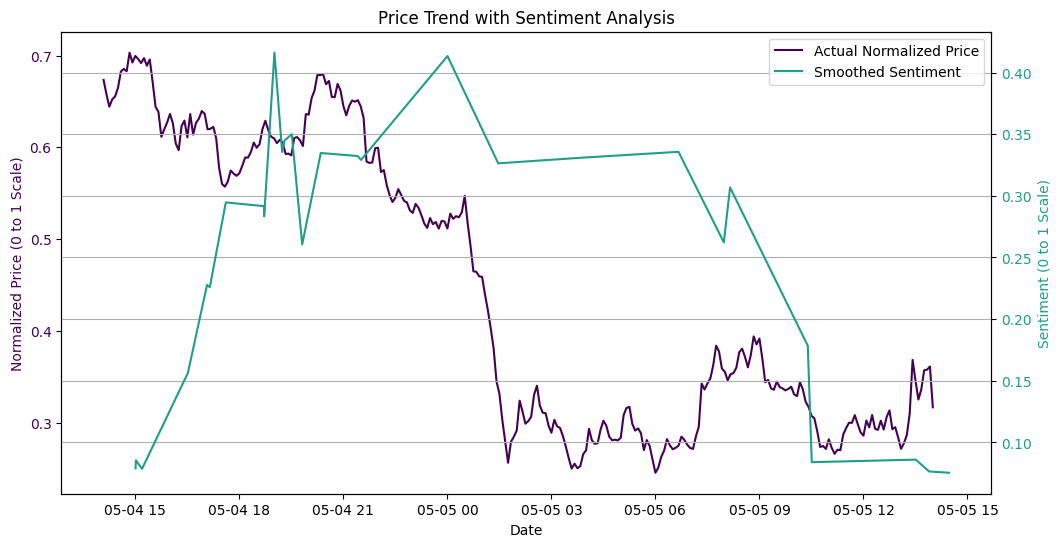

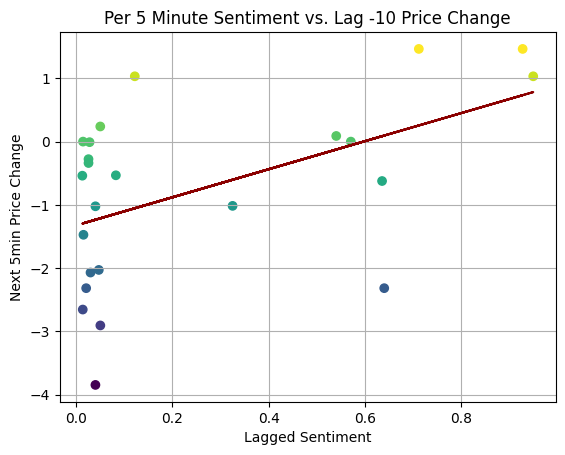

Correlation with -10 5min(s) lag: 0.5
Linear Model R-squared: 0.25
Linear Model RMSE: 1.21

Average Price Change on High Sentiment 5mins: -92 %
Average Price Change on Low Sentiment 5mins: -64 %


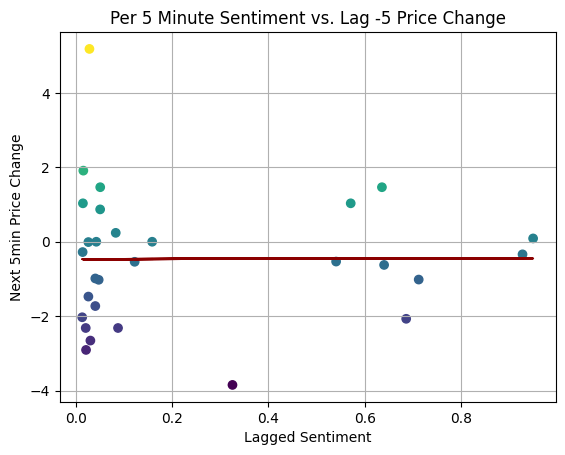

Correlation with -5 5min(s) lag: 0.0
Linear Model R-squared: 0.0
Linear Model RMSE: 1.76

Average Price Change on High Sentiment 5mins: -85 %
Average Price Change on Low Sentiment 5mins: -10 %


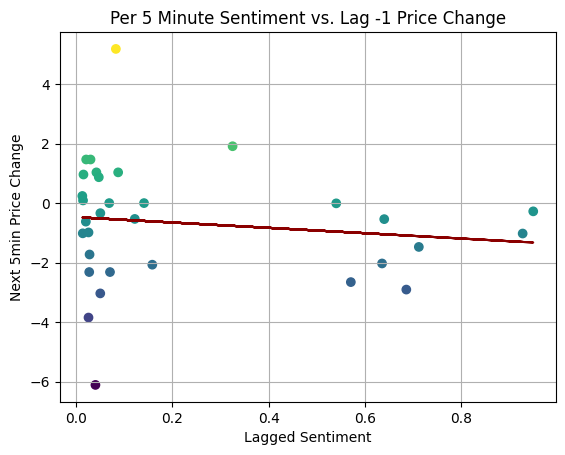

Correlation with -1 5min(s) lag: -0.13
Linear Model R-squared: 0.02
Linear Model RMSE: 1.99

Average Price Change on High Sentiment 5mins: -88 %
Average Price Change on Low Sentiment 5mins: -46 %


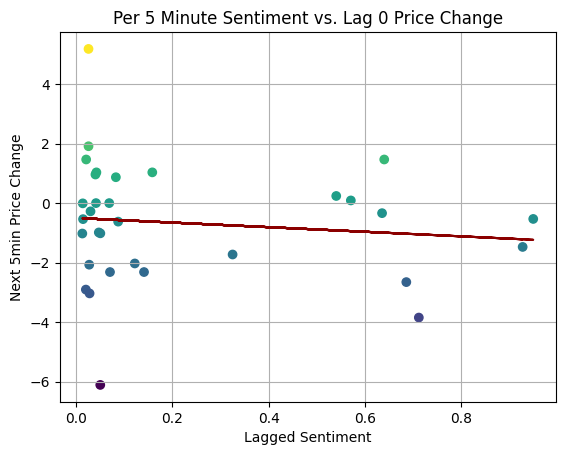

Correlation with 0 5min(s) lag: -0.11
Linear Model R-squared: 0.01
Linear Model RMSE: 2.0

Average Price Change on High Sentiment 5mins: -88 %
Average Price Change on Low Sentiment 5mins: -46 %


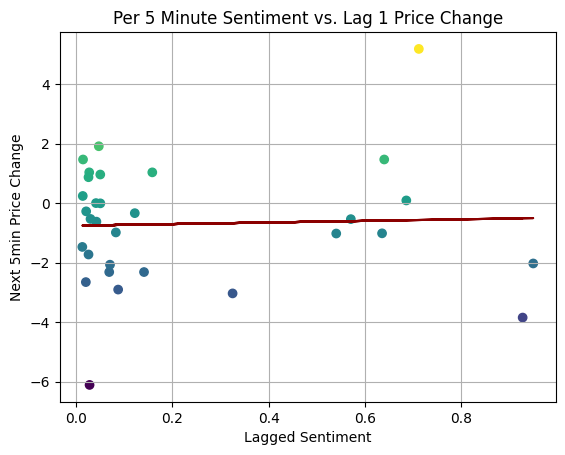

Correlation with 1 5min(s) lag: 0.04
Linear Model R-squared: 0.0
Linear Model RMSE: 2.04

Average Price Change on High Sentiment 5mins: -94 %
Average Price Change on Low Sentiment 5mins: -46 %


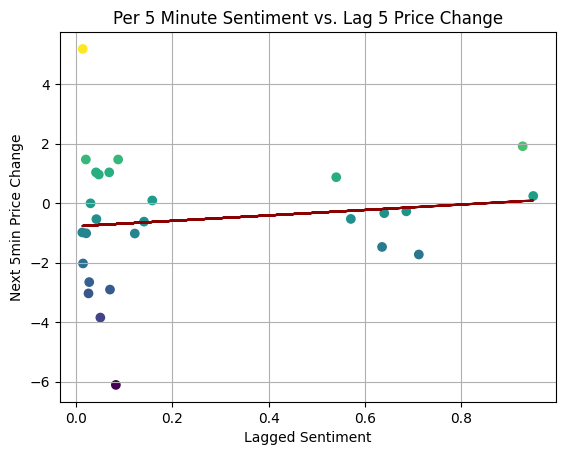

Correlation with 5 5min(s) lag: 0.13
Linear Model R-squared: 0.02
Linear Model RMSE: 2.1

Average Price Change on High Sentiment 5mins: -73 %
Average Price Change on Low Sentiment 5mins: -38 %


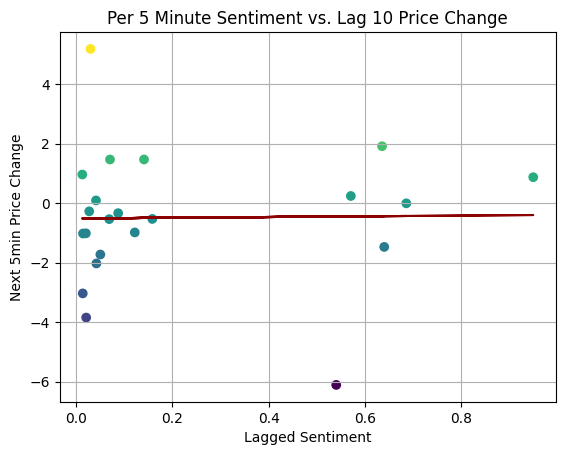

Correlation with 10 5min(s) lag: 0.02
Linear Model R-squared: 0.0
Linear Model RMSE: 2.19

Average Price Change on High Sentiment 5mins: -75 %
Average Price Change on Low Sentiment 5mins: -22 %


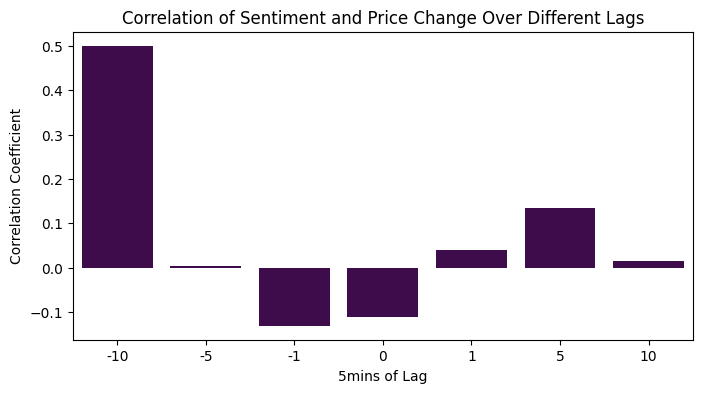

Average Prediction for lag 0: N/A
Average Prediction for lag 1: N/A
Average Prediction for lag 2: -0.51
Average Prediction for lag 3: -0.53
Average Prediction for lag 4: -0.75
Average Prediction for lag 5: N/A
Average Prediction for lag 6: N/A
Overall Average Prediction across all lags: -0.59


c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\visualizations.py:176: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future_sentiment = combined_data['average sentiment'].tail(predict_days).shift(lag).fillna(method='ffill')
c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


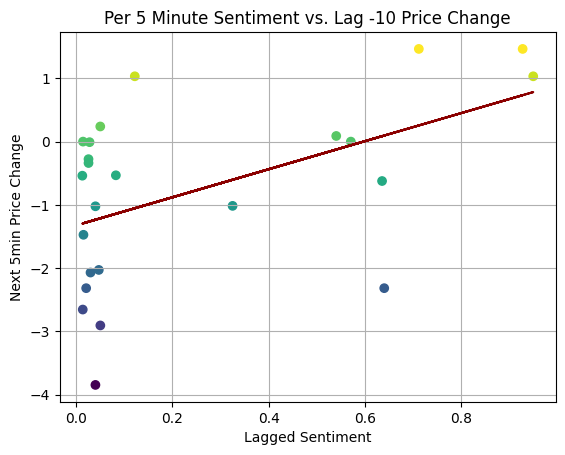

Correlation with -10 5min(s) lag: 0.5
Rf Model R-squared: 0.79
Rf Model RMSE: 0.64

Average Price Change on High Sentiment 5mins: -92 %
Average Price Change on Low Sentiment 5mins: -64 %


c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\visualizations.py:176: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future_sentiment = combined_data['average sentiment'].tail(predict_days).shift(lag).fillna(method='ffill')
c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


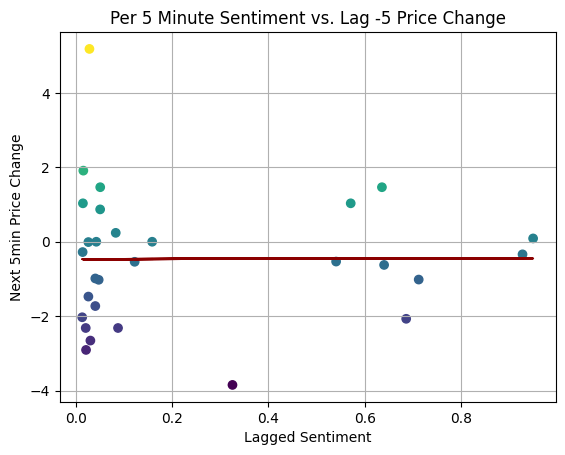

Correlation with -5 5min(s) lag: 0.0
Rf Model R-squared: 0.79
Rf Model RMSE: 0.82

Average Price Change on High Sentiment 5mins: -85 %
Average Price Change on Low Sentiment 5mins: -10 %


c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\visualizations.py:176: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future_sentiment = combined_data['average sentiment'].tail(predict_days).shift(lag).fillna(method='ffill')
c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


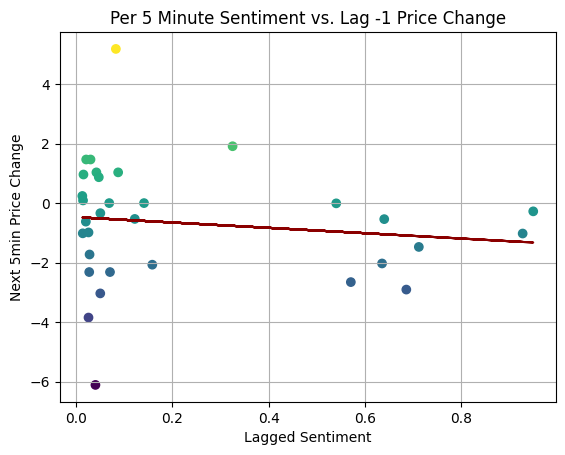

Correlation with -1 5min(s) lag: -0.13
Rf Model R-squared: 0.79
Rf Model RMSE: 0.92

Average Price Change on High Sentiment 5mins: -88 %
Average Price Change on Low Sentiment 5mins: -46 %


c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\visualizations.py:176: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future_sentiment = combined_data['average sentiment'].tail(predict_days).shift(lag).fillna(method='ffill')
c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


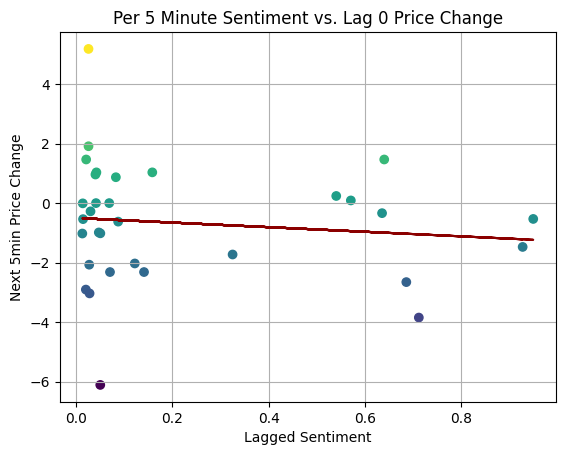

Correlation with 0 5min(s) lag: -0.11
Rf Model R-squared: 0.84
Rf Model RMSE: 0.8

Average Price Change on High Sentiment 5mins: -88 %
Average Price Change on Low Sentiment 5mins: -46 %


c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\visualizations.py:176: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future_sentiment = combined_data['average sentiment'].tail(predict_days).shift(lag).fillna(method='ffill')
c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


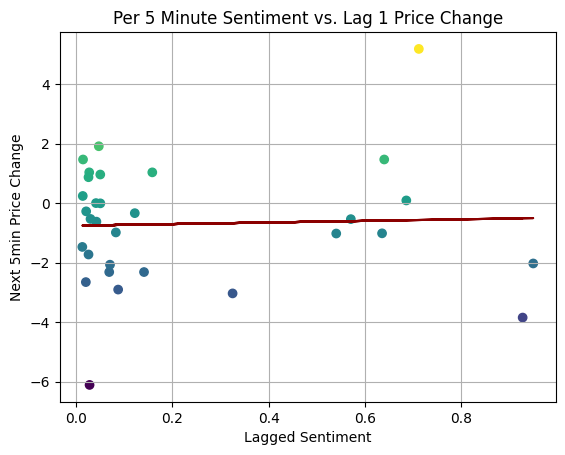

Correlation with 1 5min(s) lag: 0.04
Rf Model R-squared: 0.8
Rf Model RMSE: 0.92

Average Price Change on High Sentiment 5mins: -94 %
Average Price Change on Low Sentiment 5mins: -46 %


c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\visualizations.py:176: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future_sentiment = combined_data['average sentiment'].tail(predict_days).shift(lag).fillna(method='ffill')
c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


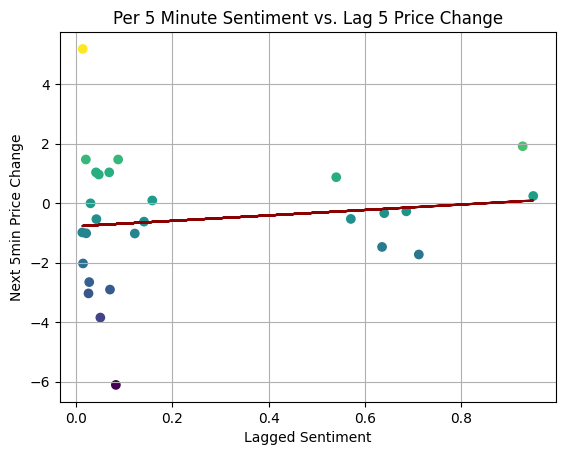

Correlation with 5 5min(s) lag: 0.13
Rf Model R-squared: 0.71
Rf Model RMSE: 1.14

Average Price Change on High Sentiment 5mins: -73 %
Average Price Change on Low Sentiment 5mins: -38 %


c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\visualizations.py:176: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future_sentiment = combined_data['average sentiment'].tail(predict_days).shift(lag).fillna(method='ffill')
c:\Users\UrsHu\Pillars\Learn\Academic\Master\Semestre 2\data analysis\crypto-sentiment-tracker\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


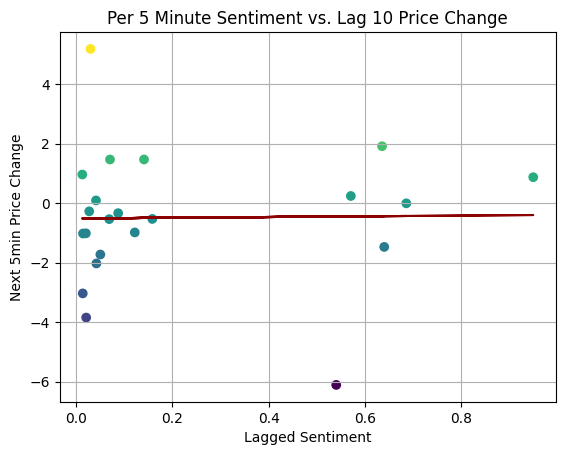

Correlation with 10 5min(s) lag: 0.02
Rf Model R-squared: 0.78
Rf Model RMSE: 1.02

Average Price Change on High Sentiment 5mins: -75 %
Average Price Change on Low Sentiment 5mins: -22 %


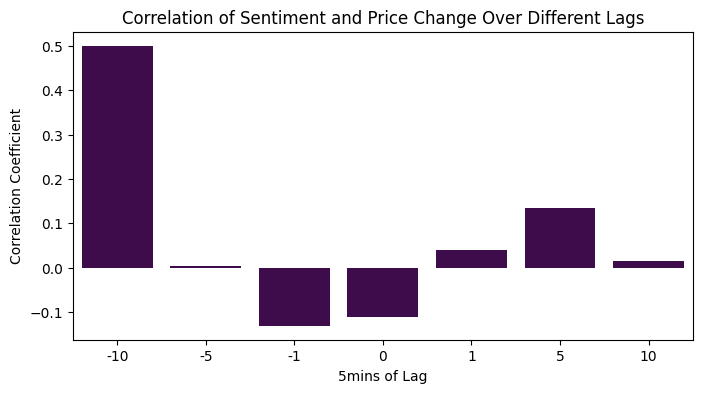

Average Prediction for lag 0: -1.1
Average Prediction for lag 1: -0.37
Average Prediction for lag 2: -2.52
Average Prediction for lag 3: -1.15
Average Prediction for lag 4: -0.58
Average Prediction for lag 5: -0.38
Average Prediction for lag 6: -0.31
Overall Average Prediction across all lags: -0.91


In [3]:
#for testing purposes
sentiment_data = pd.read_csv(f"data/2024-04-05_24h_news_with_sentiment.csv")
price_data = pd.read_csv('data/2024-04-05_24h_50meme_history.csv')


sentiment_data = vz.average_sentiment_per_time(from_date,sentiment_data)
price_data = vz.normalize_and_aggregate_prices(price_data)
plot = vz.plot_normalized_price_and_sentiment(price_data, sentiment_data)

# Calculate percentage price change directly from normalized prices
price_data['price_change'] = price_data['normalized price'].pct_change() * 100
price_data['price_change'] = price_data['price_change'].replace([np.inf, -np.inf], np.nan).fillna(0)

# Resample price data to 5-minute intervals, forward filling the last known prices and changes
price_data_resampled = price_data.resample('5min').last().ffill()

# Round sentiment data timestamps to the nearest 5 minutes
sentiment_data.index = sentiment_data.index.round('5min')

# Merge using merge_asof to align sentiment data with the nearest price data
combined_data = pd.merge_asof(sentiment_data.sort_index(), price_data_resampled.reset_index(), 
                              left_index=True, right_on='timestamp', direction='forward')

# Since we need the next period's price change, shift the 'price_change' column by -1
combined_data['Next 5min Price Change'] = combined_data['price_change'].shift(-1)

# Rename columns to match function expectations
combined_data.rename(columns={'Average Sentiment': 'Average Sentiment'}, inplace=True)

# Drop the 'timestamp' and original 'price_change' columns if not needed
combined_data.drop(columns=['timestamp', 'price_change'], inplace=True)

# Perform Analysis
model_type = 'linear'  # or 'rf'
future_predictions_by_lag = vz.analysis(combined_data, from_date, model_type=model_type, for_web=False, predict_days=5)

# Collect all predictions from each lag
all_predictions = []

# Analyze every prediction of every lag and collect them
for idx, future_predictions in enumerate(future_predictions_by_lag):
    if not isinstance(future_predictions, (list, np.ndarray)):
        future_predictions = [future_predictions]

    # Filter out NaN values
    future_predictions = [pred for pred in future_predictions if not np.isnan(pred)]
    all_predictions.extend(future_predictions)

    avg_prediction = round(np.mean(future_predictions), 2) if future_predictions else 'N/A'
    print(f"Average Prediction for lag {idx}: {avg_prediction}")

# Filter out NaN values from all_predictions
all_predictions = [pred for pred in all_predictions if not np.isnan(pred)]

# Calculate the overall average prediction
overall_avg_prediction = round(np.mean(all_predictions), 2) if all_predictions else 'N/A'
print(f"Overall Average Prediction across all lags: {overall_avg_prediction}")

# Perform Analysis
model_type = 'rf'  # or 'rf'
future_predictions_by_lag = vz.analysis(combined_data, from_date, model_type=model_type, for_web=False, predict_days=5)

# Collect all predictions from each lag
all_predictions = []

# Analyze every prediction of every lag and collect them
for idx, future_predictions in enumerate(future_predictions_by_lag):
    if not isinstance(future_predictions, (list, np.ndarray)):
        future_predictions = [future_predictions]

    # Filter out NaN values
    future_predictions = [pred for pred in future_predictions if not np.isnan(pred)]
    all_predictions.extend(future_predictions)

    avg_prediction = round(np.mean(future_predictions), 2) if future_predictions else 'N/A'
    print(f"Average Prediction for lag {idx}: {avg_prediction}")

# Filter out NaN values from all_predictions
all_predictions = [pred for pred in all_predictions if not np.isnan(pred)]

# Calculate the overall average prediction
overall_avg_prediction = round(np.mean(all_predictions), 2) if all_predictions else 'N/A'
print(f"Overall Average Prediction across all lags: {overall_avg_prediction}")

# Enhancement
1. Volatility and Outliers: If either the price data or the sentiment data is more volatile or has outliers, it can skew the correlation. For example, a few large jumps or drops in price might not be directly linked to sentiment but could still heavily influence the correlation calculation.
3. Noise in Data: The sentiment scores might contain noise due to the inherent subjectivity and complexity of natural language processing. This noise can dilute real correlations with price movements.
4. Non-linear Relationships: The relationship between sentiment and prices might be non-linear, meaning that while they do move together, the relationship might not be directly proportional or consistent across the whole range of data.
5. Averaging and Smoothing: Both the averaging of sentiment over time and the smoothing could be masking more nuanced interactions between individual spikes in sentiment and corresponding price changes.